# Module 3: Machine Learning
## Sprint 2: Gradient Boosted Trees & Feature Engineering
## Part 5: Stroke Prediction Dataset


## About this Part

Congrats!
You have reached the last Part of this Sprint.
In this Part, you will put what you learned during this and the previous Sprints into practice.
As the final assignment of this Sprint, you will train and deploy a machine learning models on the Stroke Prediction Dataset.
You will have to apply all that you have learned about training and deploying machine learning models to complete this task.
Our expectation is that you'll use your own judgement how to perform the analysis and how to select the most important avenues of modeling, statistical testing, and exploration.
You'll have to iteratively try to find patterns in the data, raise hypotheses and use your data analysis skills to get answers.

## Context

Imagine that you are a data analyst working for the The Johns Hopkins Hospital.
Your team is asked to create a machine learning model, which could predict if the patient is likely to get a stroke - being able to determine, which patients have high stroke risk will allow your doctors to advice them and their families how to act in case of an emergency.
As you are about to start working on your project your team's manager approaches you with a request.
She has read an article that AI can predict all sorts of things that required dedicated sensors before - [Tesla doesn't use a rain sensor for its automatic wiper system](https://electrek.co/2019/10/14/tesla-deep-rain-neural-net-automatic-wipers/).
Following the example of Elon Musk she proposes her brilliant idea to save money - to replace all blood pressure monitors, glucose monitor, and scales with AI.
She argues that this would save the hospital millions of dollars every year.
She wants you to create three additional machine learning models to predict the hypertension, average glucose level, and BMI of the patient.
You are not 100% convinced of this idea and try to explain why it won't work, but she is insistent and you promise to try anyway - this will give you a great opportunity to practice your new machine learning skills and have metrics about how accurate predictions for these variables can be using state-of-the-art machine learning models.

## Objectives for this Part

- Practice working with CSV files.
- Practice performing EDA.
- Practice applying statistical inference procedures.
- Practice using various types of machine learning models.
- Practice building ensembles of machine learning models.
- Practice deploying machine learning models.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries and filtering data.

## Requirements

- Download the data from [Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
- Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, conducting z or t-tests for these hypotheses.
- Apply various machine learning models to predict the stroke column using the all other features. This should include hyperparameter tuning, model ensembling, the analysis of model selection, and other methods.
- In addition use machine learning to predict the hypertension, avg_glucose_level, and bmi columns. You should create a model predicting each of these variables, then a model for each pair of variables and finally a model predicting all three of these variables - all in all 7 models. You can use all remaining variables as features, except for stroke. This should include hyperparameter tuning, the analysis of model selection, and other methods.
- Deploy all of these machine learning models. You are free to choose any deployment option that you like - you can deploy your models in a container (on your computer or on a server), do a serverless deployment on the cloud or even deploy serve it on the browser as a web app. These deployments don't have to be separate, as long as each model has its own endpoint.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface or did you explored the dataset in depth?
- Model's performance. How well did your model perform the predictions?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structure? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?

## Sample Correction Questions

During a correction, you may get asked questions that test your understanding of covered topics.

- What is wrong with preprocessing data before we run a hyperparameter search algorithm (e.g. randomized search) with cross validation?
- What are the typical model deployment patterns? What are their advantages and disadvantages?
- How hidden feedback loops affect machine learning models? Can you give an example of a hidden feedback loop?


***

# Patient data - EDA

## Intro

The dataset used in this notebook contains patient data with the primary goal to analyze risk factors of **stroke** and predict whether a patient is likely to suffer a stroke. According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

The dataset consists of 10 metrics for a total of 5110 patients. These metrics include patients’ demographic data (gender, age, marital status, type of work and residence type) and health records (hypertension, heart disease, average glucose level, Body Mass Index (BMI), smoking status and experience of stroke).

Additionally, this dataset is used to explore and predict **hypertension, average glucose level and BMI**. After conducting basic online resource analysis, it was discovered that: 
- hypertension has several of the same risk factors as a stroke but there are many more factors (such as, race, alcohol consumption, stress level, genetics, medicines, etc.) that could cause high blood pressure but are not mentioned in this dataset
- even though some features in this dataset could be related with abnormal glucose level and BMI, usually abnormalities in glucose level or BMI are caused by other risk factors than those mentioned in this dataset (for example, genetics, lifestyle choces, other health conditions, medicines, etc.). It is worth mentioning that in many resources glucose level and BMI are related metrics and could affect each other.

### Approach

- There is one main ML target - stroke, and three additional targets: hypertension, average glucose level and BMI.
- During analysis phase the main focus is put on investigating and validating each feature impact on stroke target but other targets are also analyzed to understand feature importance and data relationships.
- ML goal is to develop and analyze prediction algorithms for each target and explore model-based feature importance.
- Final step is to combine EDA and ML findings in order to choose and deploy best performing ML models as per project requirements

**Note:** In order to minimize the scope of this notebook, ML is performed in a separate notebook.


#### Reference
Causes for stroke: https://www.nhs.uk/conditions/stroke/causes/   
Causes for hypertension: https://www.nhs.uk/conditions/high-blood-pressure-hypertension/causes/

## Data cleaning and exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

%matplotlib inline

from sklearn.impute import KNNImputer

from functions import *

plt.rcParams["figure.dpi"] = 200
custom_palette = ["#124984", "#5fa5cd", "#a7d0e4", "#d25849", "#ae172a", "#8a0b25"]
sns.set_palette(custom_palette)

In [2]:
patient_data = pd.read_csv("stroke_data.csv")

In [3]:
patient_data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
patient_data = patient_data.drop(columns="id")
patient_data.columns = [x.lower().strip() for x in patient_data.columns]
patient_data = patient_data.apply(
    lambda x: x.str.lower() if (x.dtype == "object") else x
)

In [5]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
patient_data[patient_data.duplicated()].count()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
patient_data.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [8]:
patient_info = patient_data.copy()
patient_info = map_values(patient_data, ["hypertension", "heart_disease", "stroke"])

In [9]:
patient_info.to_csv("patient_info.csv", index=False)

**Insights**

- No duplicates detected in the dataset.
- 'bmi' column is missing some values.
- The 'id' column is a unique identifier. As it does not provide valuable information, this column was removed.

- Categorical columns:
    - gender: gender of the patient.
    - hypertension: whether the patient suffers from hypertension (1) or not (0). Hypertension - abnormally high blood pressure.
    - heart_disease: whether the patient suffers from heart disease (1) or not (0).
    - ever_married: marital status of the patient if married (Yes) else (No).
    - work_type: the type of occupation of the patient.
    - resident_type: the type of residence of the patient.
    - smoking_status: how often does the patient smoke (if ever).
    - stroke: whether the patient had a stroke (1) or not (0).  

- Numerical columns:
    - age: age of the patient
    - avg_glucose_level: average glucose level (sugar level in blood) of the patient.
    - bmi: body mass index of the patient.

### Handling missing values

In [10]:
imputer = KNNImputer(n_neighbors=5)

In [11]:
patient_num_data = patient_data.copy()
cols_to_factorize = patient_num_data.select_dtypes(object).columns
patient_num_data[cols_to_factorize] = patient_num_data[cols_to_factorize].apply(
    lambda x: pd.factorize(x)[0]
)

In [12]:
imputed_bmi = imputer.fit_transform(patient_num_data)

In [13]:
patient_num_data = pd.DataFrame(imputed_bmi, columns=patient_num_data.columns)
patient_num_data = patient_num_data.rename(columns={"bmi": "bmi_imputed"})

In [14]:
patient_info = (
    pd.concat([patient_info, patient_num_data["bmi_imputed"]], axis=1)
    .drop(columns="bmi")
    .rename(columns={"bmi_imputed": "bmi"})
)

In [15]:
patient_info.head()

gender   age hypertension heart_disease ever_married      work_type  \
0    male  67.0           no           yes          yes        private   
1  female  61.0           no            no          yes  self-employed   
2    male  80.0           no           yes          yes        private   
3  female  49.0           no            no          yes        private   
4  female  79.0          yes            no          yes  self-employed   

  residence_type  avg_glucose_level   smoking_status stroke   bmi  
0          urban             228.69  formerly smoked    yes  36.6  
1          rural             202.21     never smoked    yes  34.0  
2          rural             105.92     never smoked    yes  32.5  
3          urban             171.23           smokes    yes  34.4  
4          rural             174.12     never smoked    yes  24.0

**Insight**

BMI depends on age, gender, glucose level and other factors therefore missing values are imputed using KNN imputation method.

### Descriptive statistics

In [16]:
pd.options.display.float_format = "{:,.2f}".format
patient_info.describe()

age  avg_glucose_level      bmi
count 5,110.00           5,110.00 5,110.00
mean     43.23             106.15    28.94
std      22.61              45.28     7.77
min       0.08              55.12    10.30
25%      25.00              77.25    23.70
50%      45.00              91.88    28.18
75%      61.00             114.09    33.10
max      82.00             271.74    97.60

**Insights**

- Average patient age is 43 y/o. The minimum age indicates that some patients (toddlers up to 2 y/o, to be specific) have their age recorded monthly.
- Average glucose level is a bit over 106 which is in the normal range for non-diabetic person. Median is less than mean indicating right skewed distribution, with maximum avg glucose level over 270 which is only possible for diabetic person.
- Avg BMI is almost 29. For most adults, an ideal BMI is in the 18.5 to 24.9 range.

In [17]:
patient_info.describe(include="object")

gender hypertension heart_disease ever_married work_type  \
count     5110         5110          5110         5110      5110   
unique       3            2             2            2         5   
top     female           no            no          yes   private   
freq      2994         4612          4834         3353      2925   

       residence_type smoking_status stroke  
count            5110           5110   5110  
unique              2              4      2  
top             urban   never smoked     no  
freq             2596           1892   4861

In [18]:
patient_info["gender"].value_counts()

female    2994
male      2115
other        1
Name: gender, dtype: int64

In [19]:
patient_info = patient_info.drop(
    labels=patient_info[patient_info["gender"] == "other"].index
)

**Insights**

- Women form the majority of patients in this dataset. One patient has no specific gender assigned and was dropped from the dataset as it does not provide sufficient information for further analysis.
- Majority of patients don't have hypertension or heart disease.
- Majority of patients are or have been married.
- A bit more than half of patiens work in private sector.
- Almost half of patients live in urban area.
- The largest proportion out of all patients reported that they never smoked.
- Majority of patients didn't suffer a stroke.

### Outliers

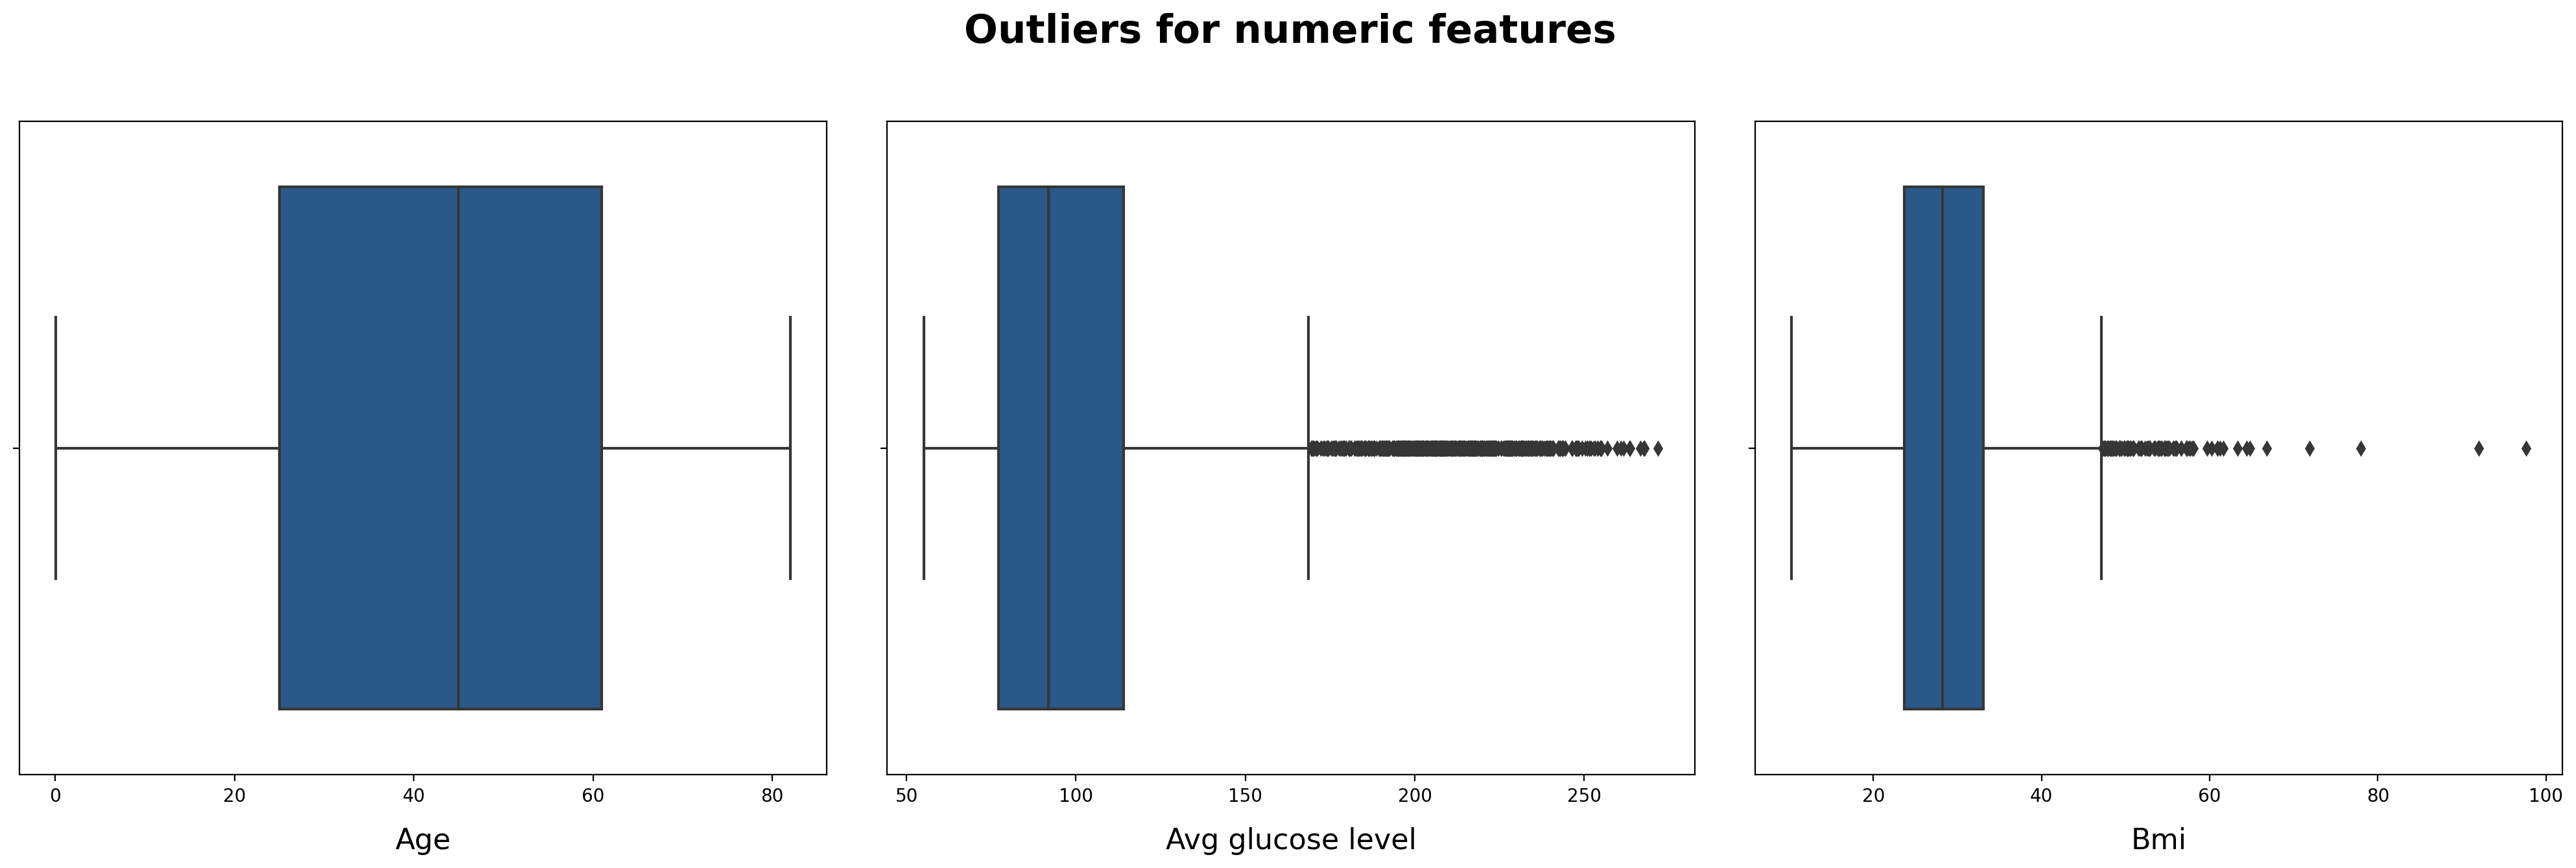

In [20]:
fig = plt.figure(figsize=(20, 24))

numeric_cols = patient_info.select_dtypes("float64").columns

fig.suptitle(
    "Outliers for numeric features",
    fontsize=22,
    fontweight="semibold",
    y=1.01,
)

for i, column in enumerate(numeric_cols, 1):
    ax = plt.subplot(4, 3, i)
    sns.boxplot(x=patient_info[column], color="#1a5899")
    ax.set_xlabel(
        str(column).replace("_", " ").capitalize(),
        fontdict={"fontsize": 16},
        labelpad=12,
    )

plt.tight_layout(h_pad=3, w_pad=3)
plt.show()

**Insight**

Some outliers are identified for columns: 'avg_glucose_level' and 'bmi'. However these extremes are important part of the analysis and are not removed or changed. 

## Exploratory Data Analysis

### Stroke

In [21]:
plt.rc("axes.spines", top=False, right=False)

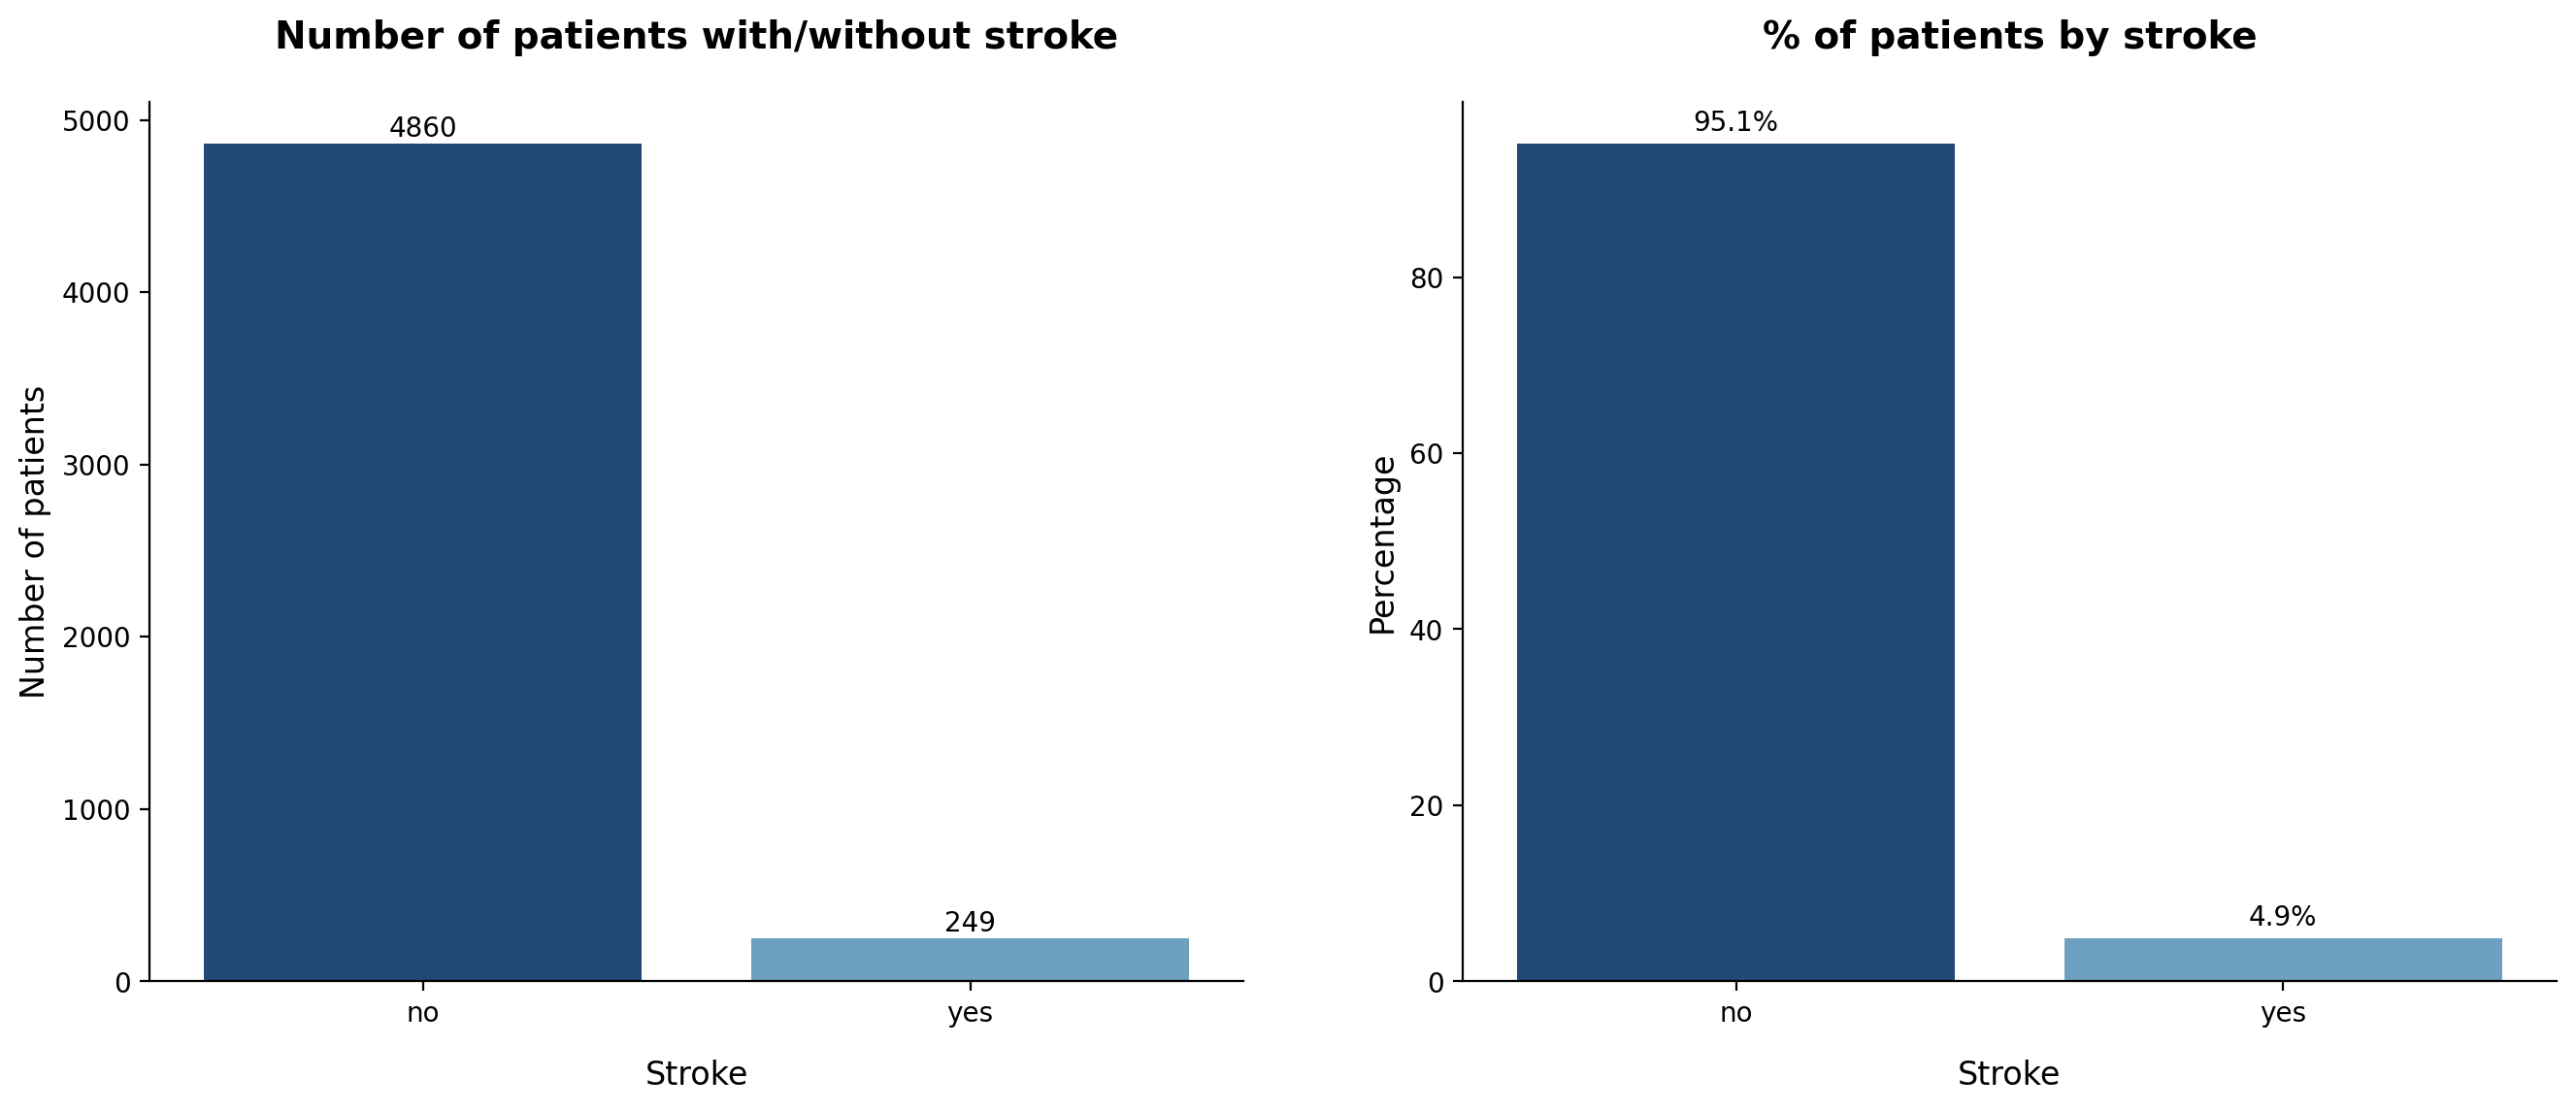

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(
    x=patient_info["stroke"],
    ax=ax[0],
    order=patient_info["stroke"].value_counts().index,
)
set_bar_values(ax[0], 10, y_location=10)
set_labels(
    ax[0],
    "Number of patients with/without stroke",
    "stroke",
    "number of patients",
)

plot_norm_value_counts("stroke", ax[1], patient_info, y_location=0.8)

plt.show()

**Insights**

- Stroke is the main target variable as per requirements (additional target variables: hypertension, average glucose level and bmi).
- Less than 5% out of 5110 patients had a stroke. It is important to note that label distribution is imbalanced and adjustments might be needed for ML part.

***

### Gender

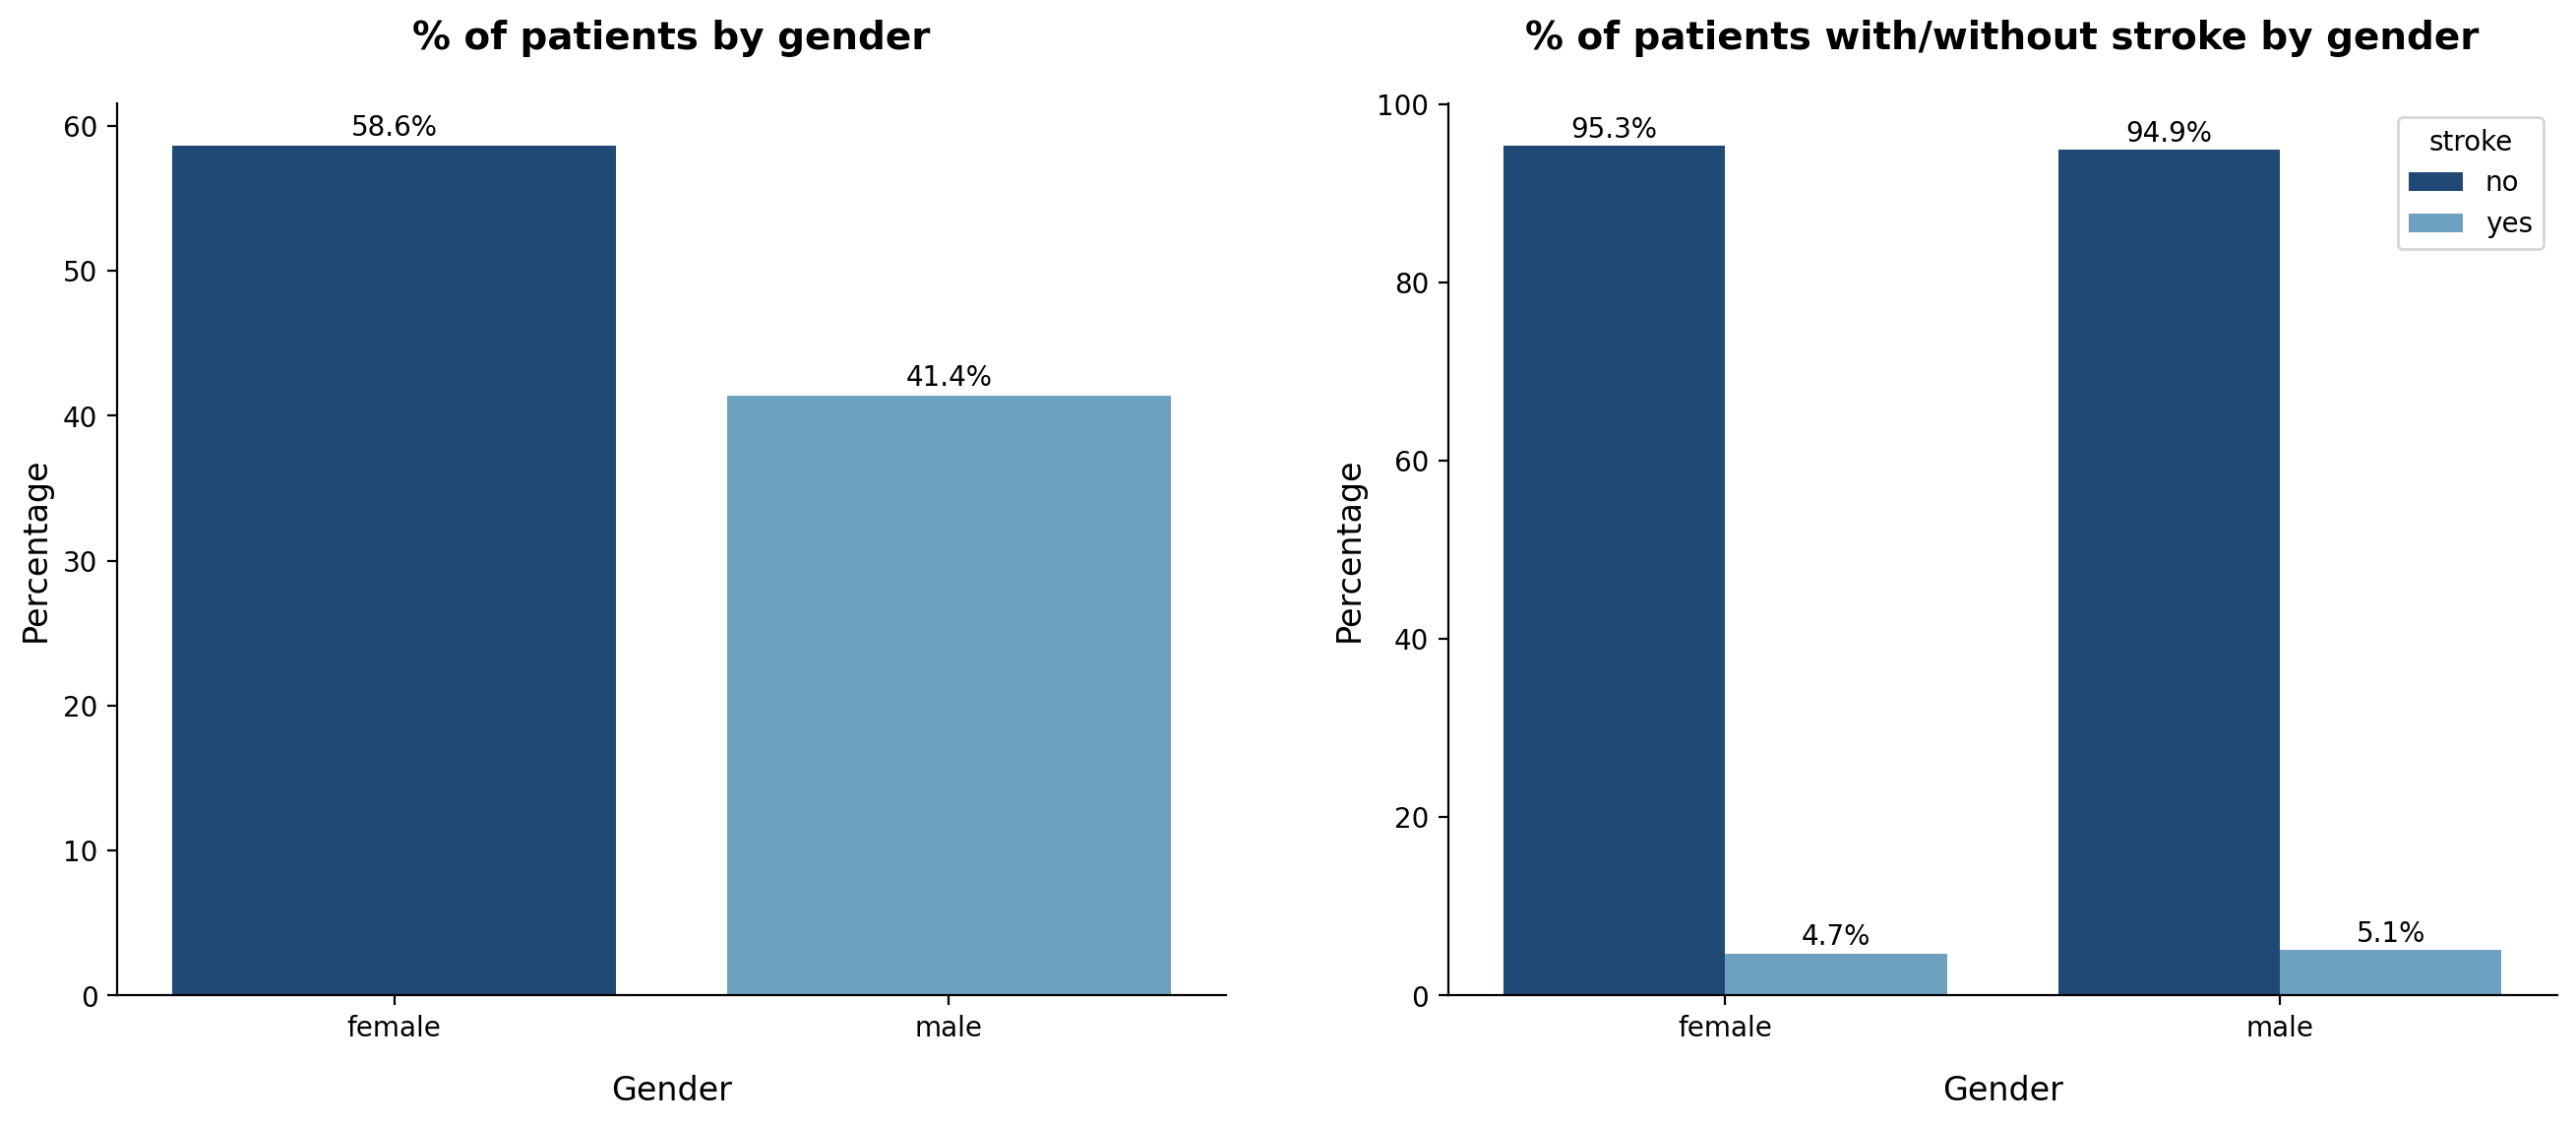

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

plot_norm_value_counts("gender", ax[0], patient_info)

stroke_percent_by_gender = find_percent_by_group("gender", "stroke", patient_info)
sns.barplot(
    x="gender",
    y="percentage",
    hue="stroke",
    data=stroke_percent_by_gender,
    ci=None,
    ax=ax[1],
)
set_bar_values(ax[1], 10, sign="%", y_location=0.3)
set_labels(
    ax[1],
    "% of patients with/without stroke by gender",
    "gender",
    "percentage",
)

plt.show()

**Insights**

- More than  58% of patients are females. 
- Yet the proportion of patients who suffered stroke is very similar between females and males. Hypothesis testing is performed to prove/ disprove the significance in difference of proportions.

#### Hypothesis testing and Confidence intervals

**Research statistic - difference in population proportions**

Considering patient data, is there a significant difference between population proportions of females and males who have suffered a stroke?

**Population**: female and male patients who have suffered a stroke  
**Parameter of Interest**: difference in population proportions ($p_1 - p_2$)  
**Null Hypothesis:** there is no difference between population proportions of females and males who have suffered a stroke ($p_1 = p_2$)  
**Alternative Hypthosis:** there is a significant difference between population proportions of females and males who have suffered a stroke. ($p_1 \neq p_2$)

**Significance level (alfa):** 0.05

In [24]:
stroke_by_gender = create_cont_table("gender", "stroke", patient_info)

stroke_by_gender

stroke  yes  total
gender            
female  141   2994
male    108   2115

In [25]:
compare_proportions_ztest(stroke_by_gender)

p-value  z-statistic  CI lower  CI upper  \
difference in proportions     0.52        -0.65     -0.02      0.01   

                                  significance  
difference in proportions  Not enough evidence

**Insights**

- Hypothesis testing indicates the lack of evidence to reject null hypothesis, meaning that there is no statistically significant difference between population proportions of males and females who had a stroke.
- Suprisingly, gender as a feature seems to have low predictive power for stroke.

***

### Age

In [26]:
patient_info["age_group"] = patient_info["age"].apply(create_age_bins)

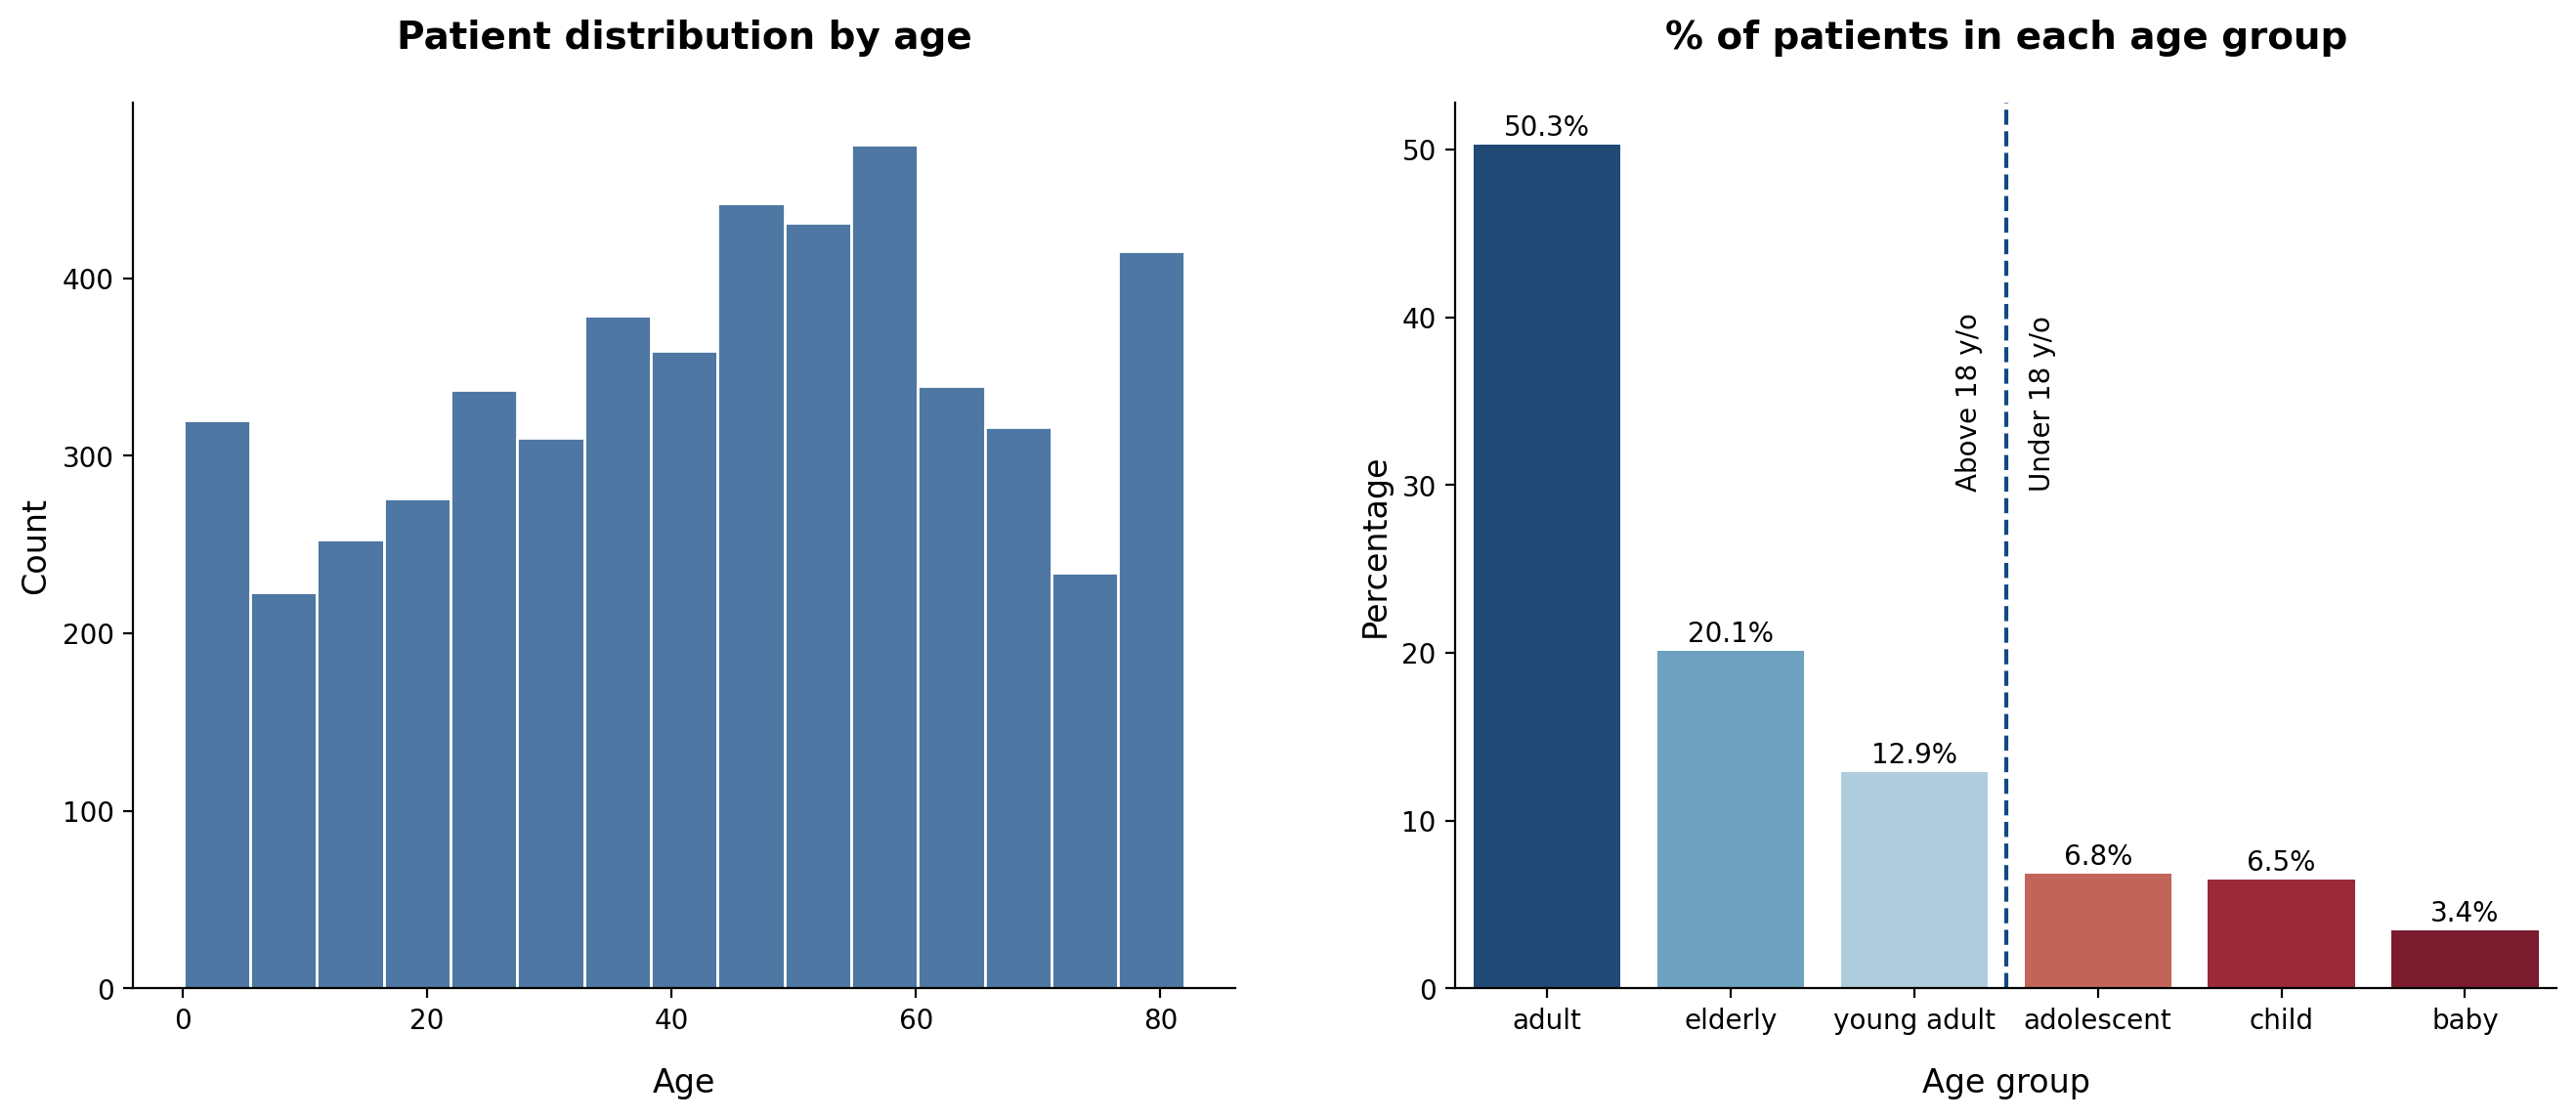

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(x="age", data=patient_info, bins=15, edgecolor="white", ax=ax[0])
set_labels(
    ax[0],
    "patient distribution by age",
    "age",
    "count",
)

age_group_percent = patient_info["age_group"].value_counts(normalize=True) * 100
sns.barplot(
    x=age_group_percent.index, y=age_group_percent, ax=ax[1], palette=custom_palette
)
set_bar_values(ax[1], 10, sign="%", y_location=0.2)
set_labels(
    ax[1],
    "% of patients in each age group",
    "age group",
    "percentage",
)

insert_axvline(2.5, 0, 7, 2.7, 2.3, "Under 18 y/o", "Above 18 y/o")

plt.show()

**Insights**

- Patient distribution by age is a bit left skewed with the highest peak around 60 y/o.
- Adults between 30 and 65 y/o is the largest group of patients
- Even though majority of patients are above 18 y/o, around 16.7% are under 18 y/o. It is important fact to be taken into consideration as ranges for average glucose level and bmi are totally different for children and adults.

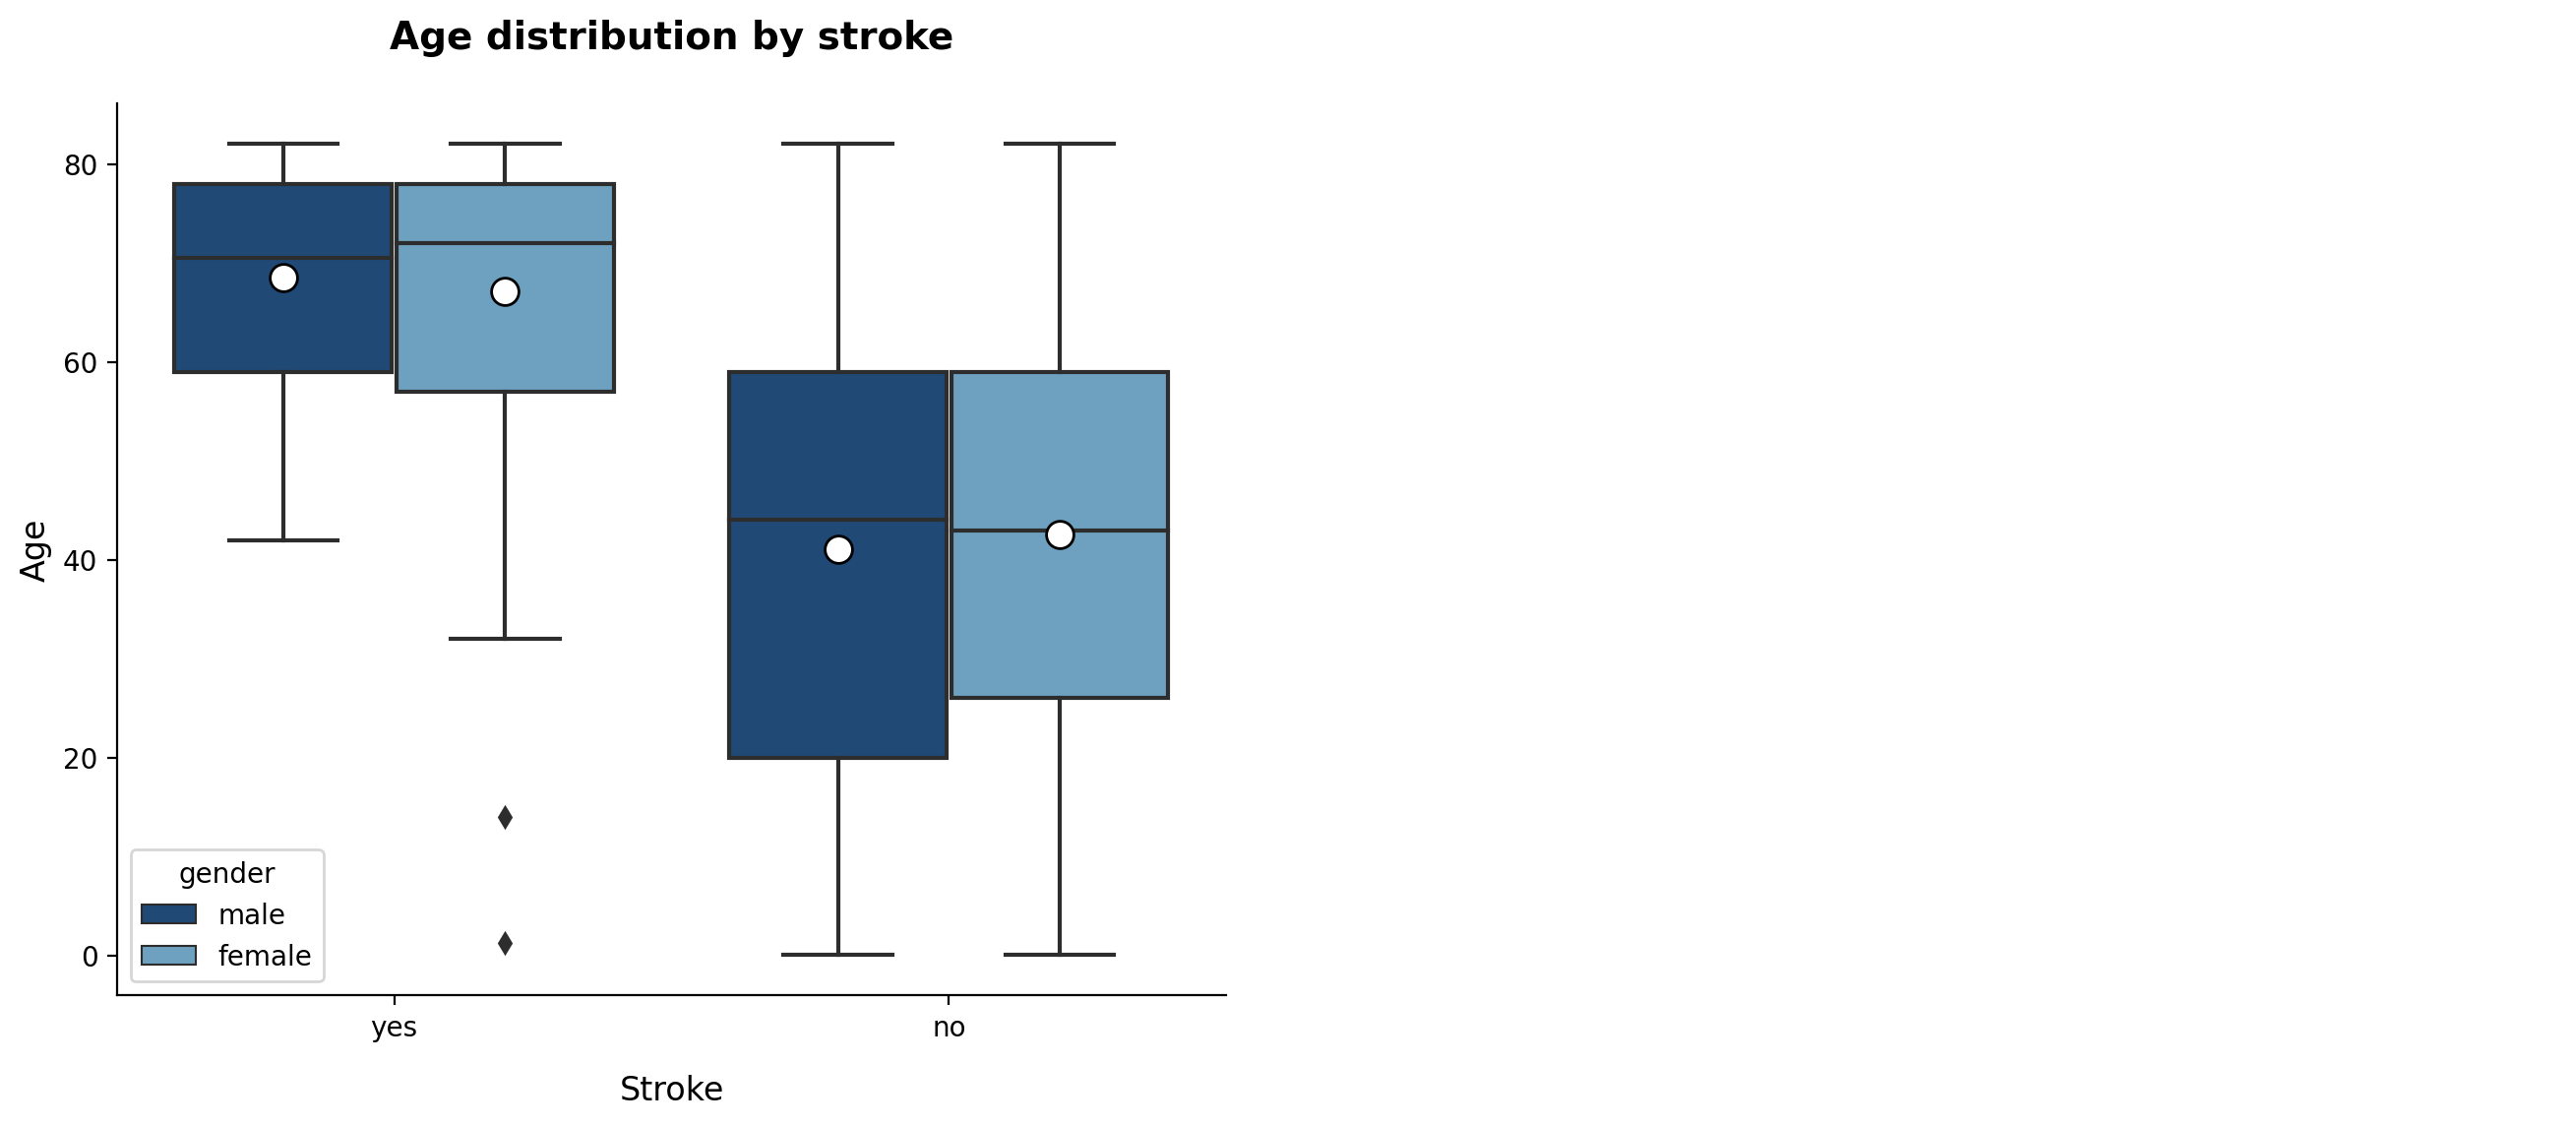

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

plot_boxplot(ax[0], 'age', "stroke", patient_info)

ax[1].axis("off")
plt.show()

In [29]:
stroke_by_age_group = patient_info.groupby(["age_group"]).agg(
    stroke_count=("stroke", "value_counts")
)

stroke_by_age_group.iloc[
    stroke_by_age_group.index.get_level_values("stroke") == "yes"
].sort_values(by="stroke_count")

stroke_count
age_group  stroke              
adolescent yes                1
baby       yes                1
adult      yes               88
elderly    yes              159

In [30]:
patient_info.groupby(["stroke", "gender"]).agg(
    avg_age=("age", "mean"), age_median=("age", "median")
)

avg_age  age_median
stroke gender                     
no     female    42.60       43.00
       male      41.08       44.00
yes    female    67.14       72.00
       male      68.50       70.50

**Insights**

- Stroke distribution by age reveals that elderly patients is more likely to suffer a stroke than younger patients. Majority of patients who suffered a stroke are in an age range of 60-80 y/o while those who didn't have stroke - 20-60 y/o. 
- It is clear that the risk of experiencing a stroke is increasing as patient gets older which makes sense as arteries naturally become narrower as person ages and blood clots typically form in areas where the arteries have been narrowed blocking the flow of blood and oxygen to the brain. Therefore age as a feature has a high predictive power for stroke.
- 2 patients under 18 y/o suffered a stroke in comparison with the patients above 18 y/o
- Age difference between females and males who experienced the stroke seems to be very similar. Hypothesis testing is performed to prove/disprove the difference in mean age between females and males who had a stroke.

#### Hypothesis testing and Confidence intervals

**Research statistic - difference in two population means**

Considering patient data, do females who suffered a stroke have statistically significant mean age than males who had a stroke?

**Population**: females who suffered a stroke and males who had a stroke   
**Parameter of Interest**: difference in means ($\mu_1 - \mu_2$)  
**Null Hypothesis:** there is no satistically significant difference in mean age between females and males who suffered a stroke ($\mu_1 = \mu_2$)  
**Alternative Hypthosis:** there is a significant difference in mean age between females and males who had a stroke ($\mu_1 \neq \mu_2$)

**Significance level (alfa):** 0.05

In [31]:
patient_info[patient_info["stroke"] == "yes"].groupby("gender").agg(
    avg_age=("age", "mean"), sample_size=("age", "size")
)

avg_age  sample_size
gender                      
female    67.14          141
male      68.50          108

In [32]:
compare_means_ztest(
    patient_info[
        (patient_info["stroke"] == "yes") & (patient_info["gender"] == "female")
    ]["age"],
    patient_info[
        (patient_info["stroke"] == "yes") & (patient_info["gender"] == "male")
    ]["age"],
)

p-value  z-statistic  CI lower  CI upper  \
difference in means     0.38        -0.87     -4.45      1.72   

                            significance  
difference in means  Not enough evidence

**Insights**
 
- Hypothesis testing proved that there is no statistically significant difference in mean age between females and males who had a stroke.

***

### Hypertension

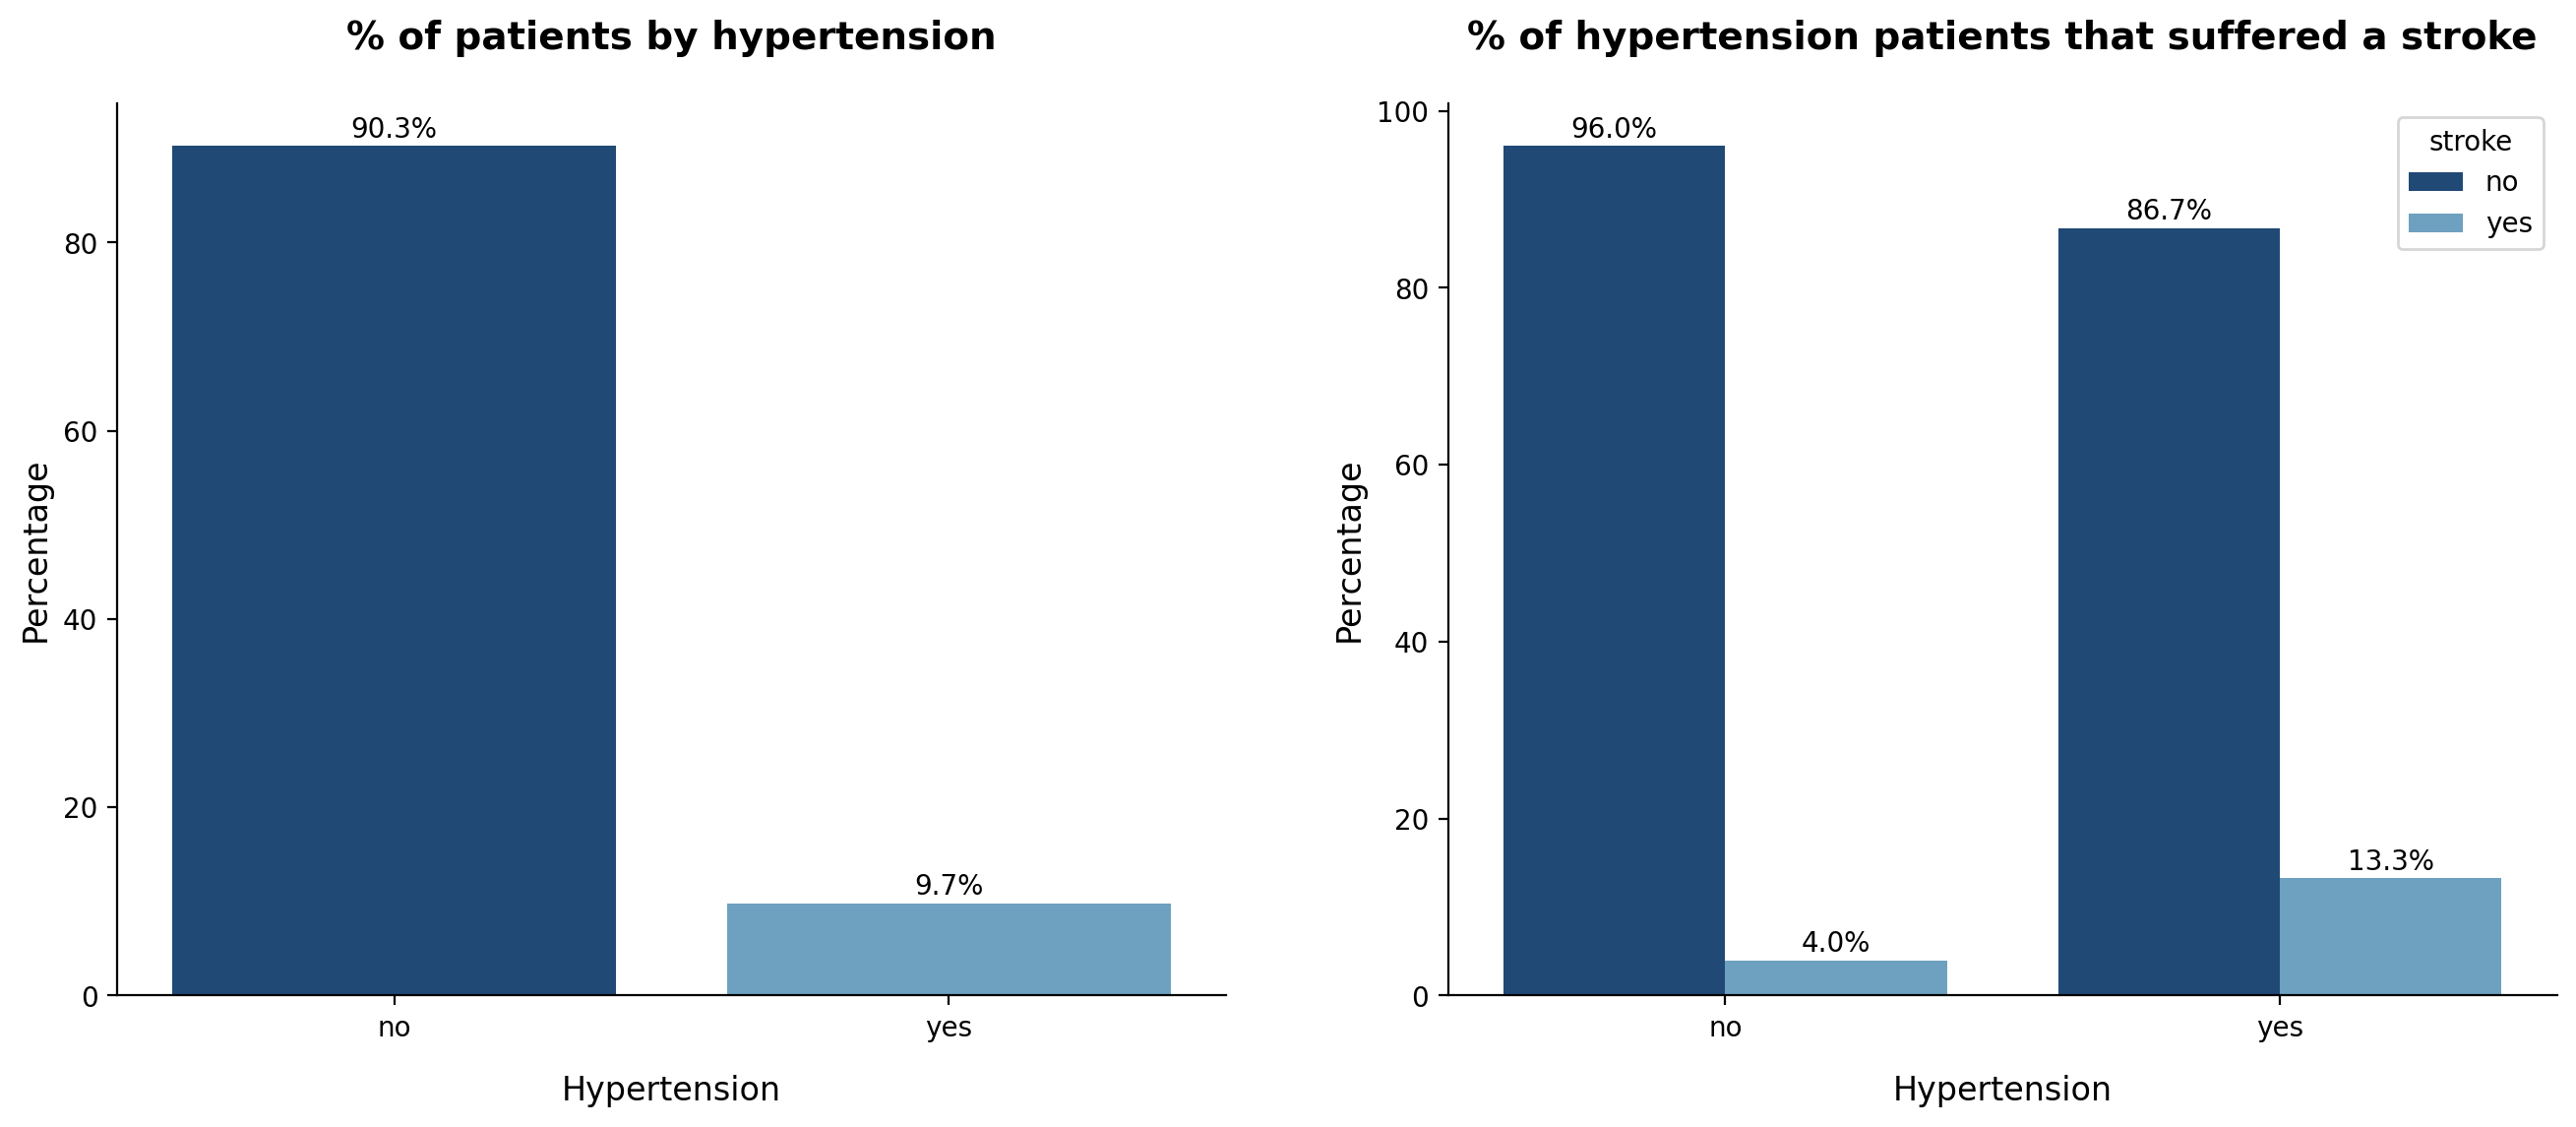

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

plot_norm_value_counts("hypertension", ax[0], patient_info)

stroke_percent_by_hypertension = find_percent_by_group(
    "hypertension", "stroke", patient_info
)
sns.barplot(
    x="hypertension",
    y="percentage",
    hue="stroke",
    data=stroke_percent_by_hypertension,
    ci=None,
    ax=ax[1],
)
set_bar_values(ax[1], 10, sign="%", y_location=0.3)
set_labels(
    ax[1],
    "% of hypertension patients that suffered a stroke",
    "hypertension",
    "percentage",
)

**Insights**

- Hypertension is one of the additional target variables for predictions.
- A bit less than 10% of all patients have hypertension - abnormally high blood pressure.
- The proportion of patients who suffered stroke is higher for those who have hypertension in comparison with those who don't have hypertension. Hypothesis testing was performed to prove or disprove the difference in proportions.

#### Hypothesis testing and Confidence intervals

**Research statistic - difference in population proportions**

Considering patient data, is there a significant difference between population proportions of patients who have hypertension and experienced a stroke and those who don't have hypertension but still suffered a stroke?

**Population**: patients with and without hypertension who have suffered a stroke  
**Parameter of Interest**: difference in population proportions ($p_1 - p_2$)  
**Null Hypothesis:** there is no difference between population proportions of of patients who have hypertension and experienced a stroke and those who don't have hypertension and have suffered a stroke. ($p_1 = p_2$)  
**Alternative Hypthosis:** there is a significant difference between population proportions of patients who have hypertension and experienced a stroke and those who don't have hypertension and have suffered a stroke. ($p_1 \neq p_2$)

**Significance level (alfa):** 0.05

In [34]:
stroke_by_hypertension = create_cont_table("hypertension", "stroke", patient_info)

stroke_by_hypertension

stroke        yes  total
hypertension            
no            183   4611
yes            66    498

In [35]:
compare_proportions_ztest(stroke_by_hypertension)

p-value  z-statistic  CI lower  CI upper  \
difference in proportions     0.00        -9.14     -0.13     -0.07   

                                           significance  
difference in proportions  Stat. significant difference

**Insights**

- Hypothesis testing proves that there is a statistically significant difference between in population proportions of patients who have hypertension and suffered a stroke and those who don't have hypertension but still experienced the stroke.
- Blood vessels damaged by high blood pressure can narrow, rupture or leak. High blood pressure can also cause blood clots to form in the arteries leading to the brain, blocking blood flow and potentially causing a stroke. As a result hypertension increases the risk for stroke.

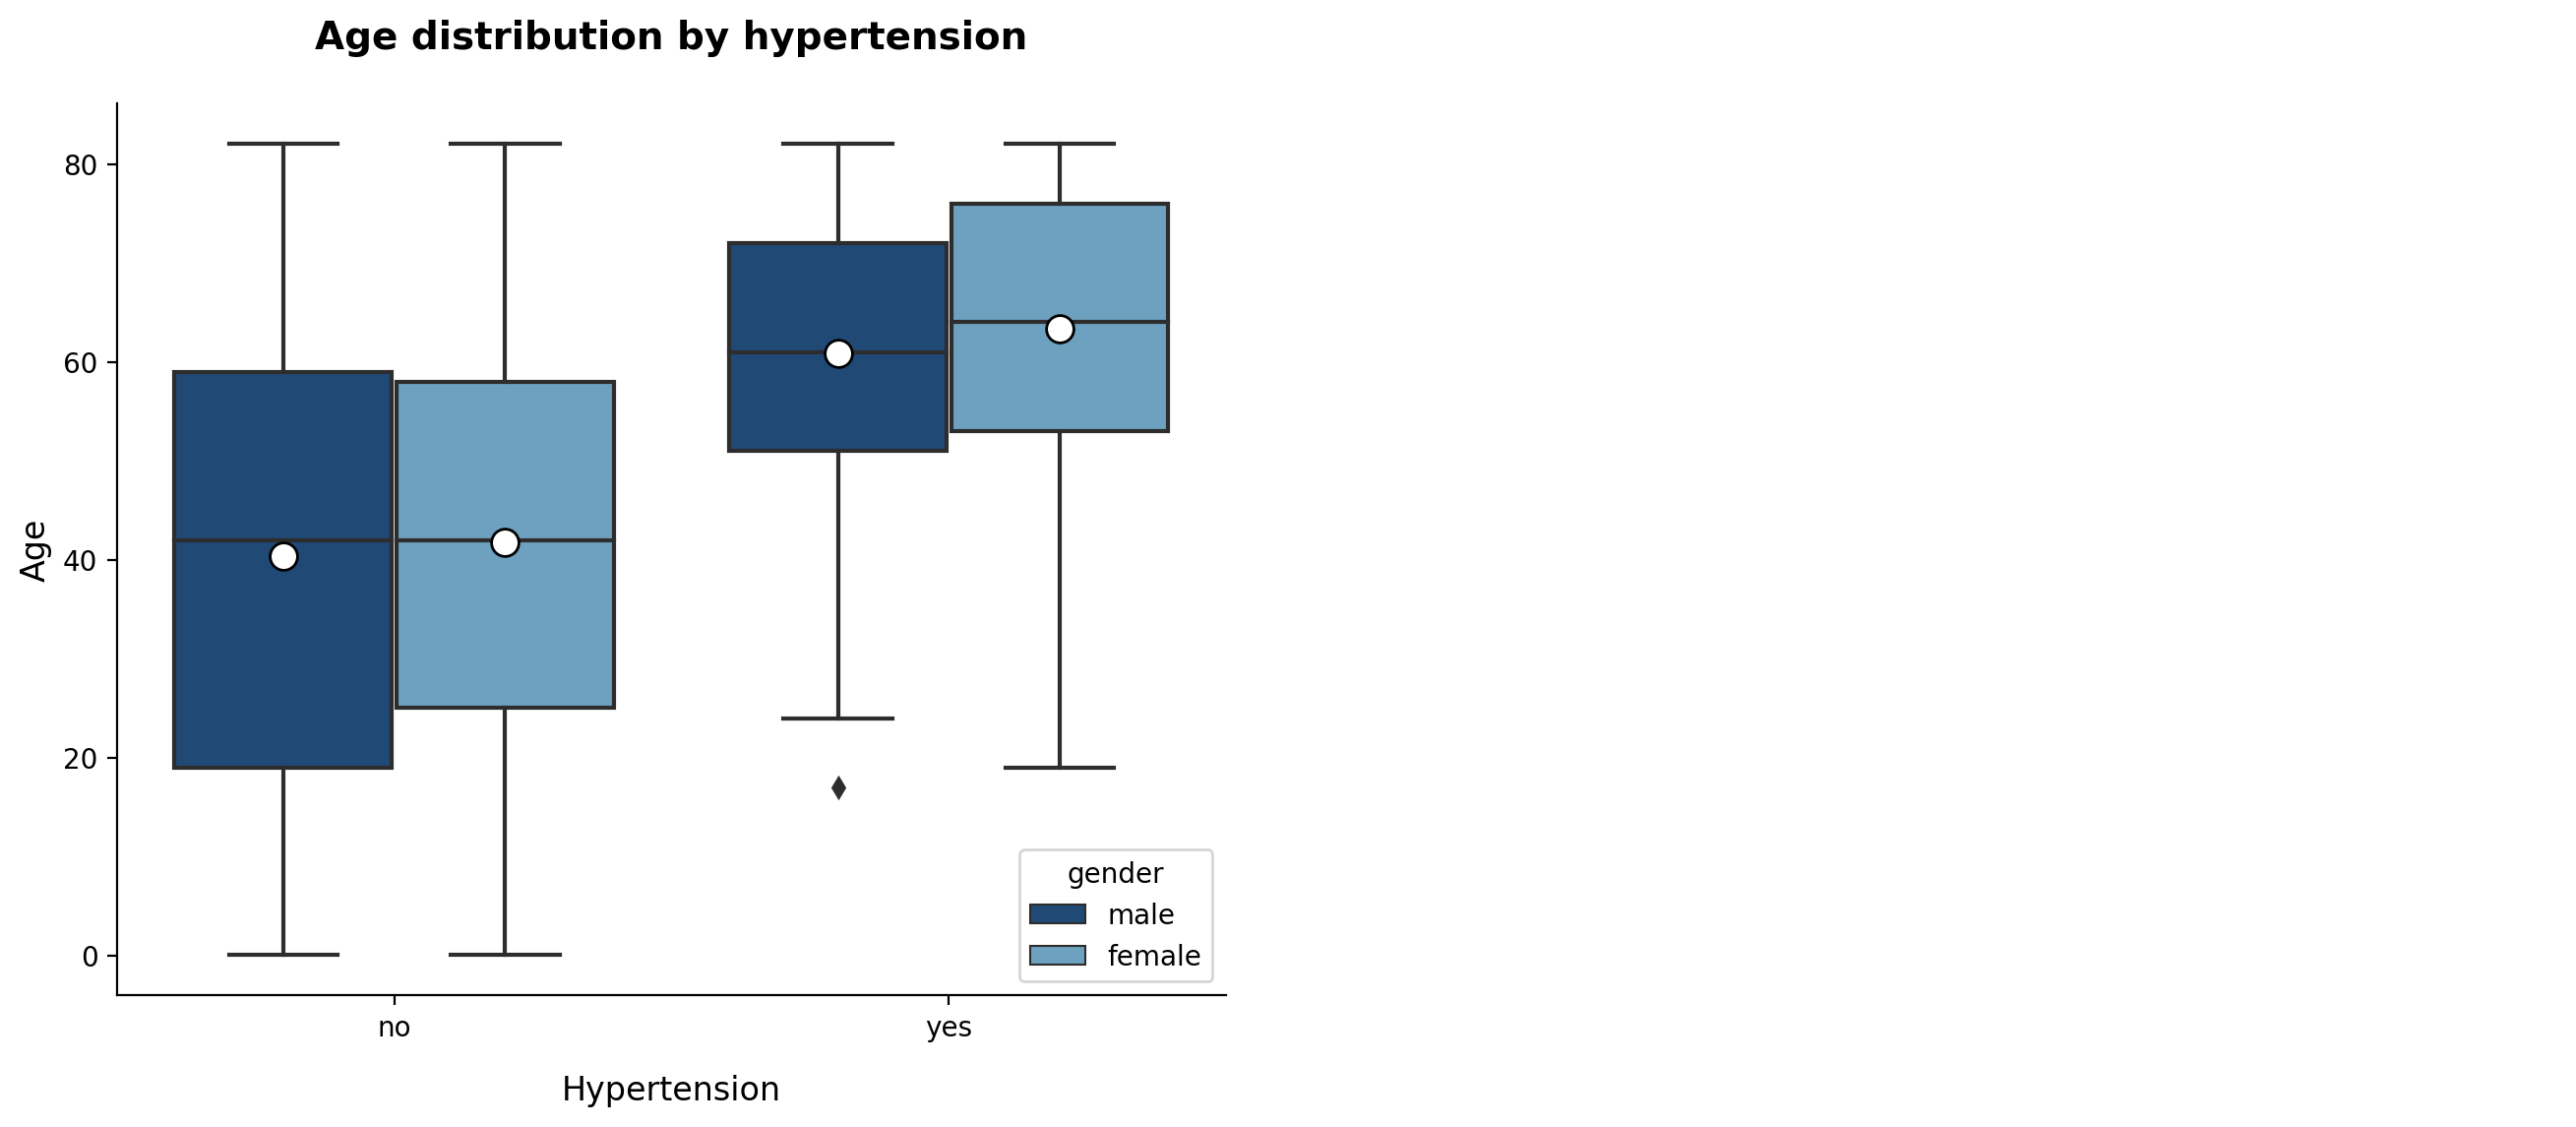

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

plot_boxplot(ax[0], "age", "hypertension", patient_info)

ax[1].axis("off")
plt.show()

**Insight**

- Hypertension distribution by age shows that elderly patients are more likely to have hypertension - this highlights data relationship with stroke.

***

### Heart disease

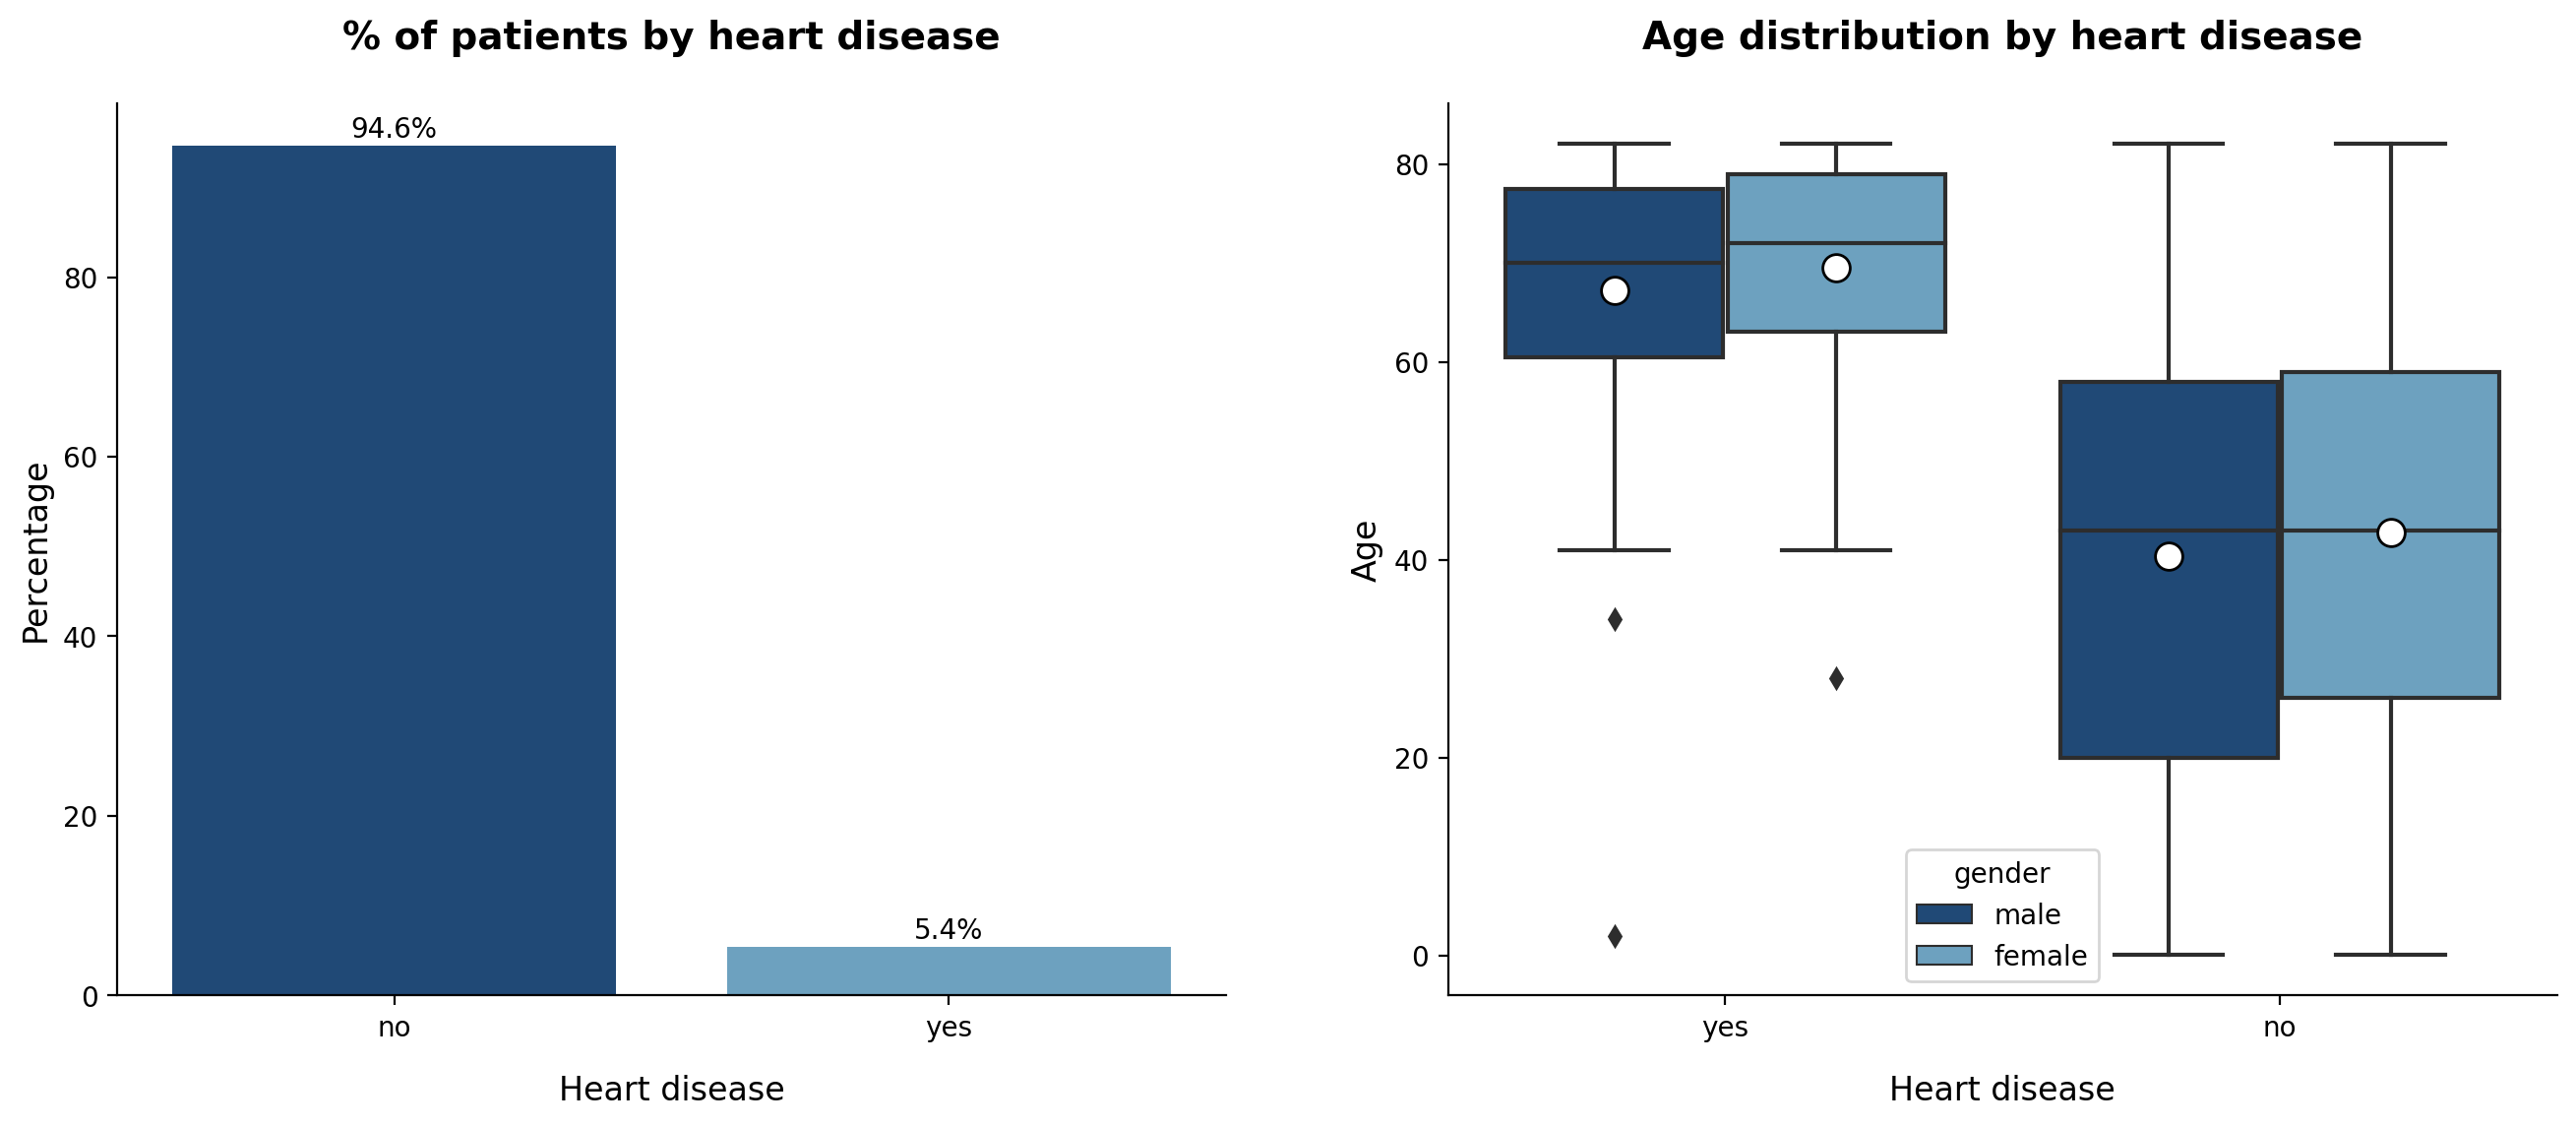

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

plot_norm_value_counts("heart_disease", ax[0], patient_info)

plot_boxplot(ax[1], "age", "heart_disease", patient_info)

plt.show()

**Insights**

- About 5.4% of patients have heart disease.
- Same as for stroke and hypertension, elderly patients (between 60-80 y/o) are more likely to have heart disease. Accordingly, expectation is that proportion for patients that suffered a stroke or have hypertension is higher for those who have a heart disease.

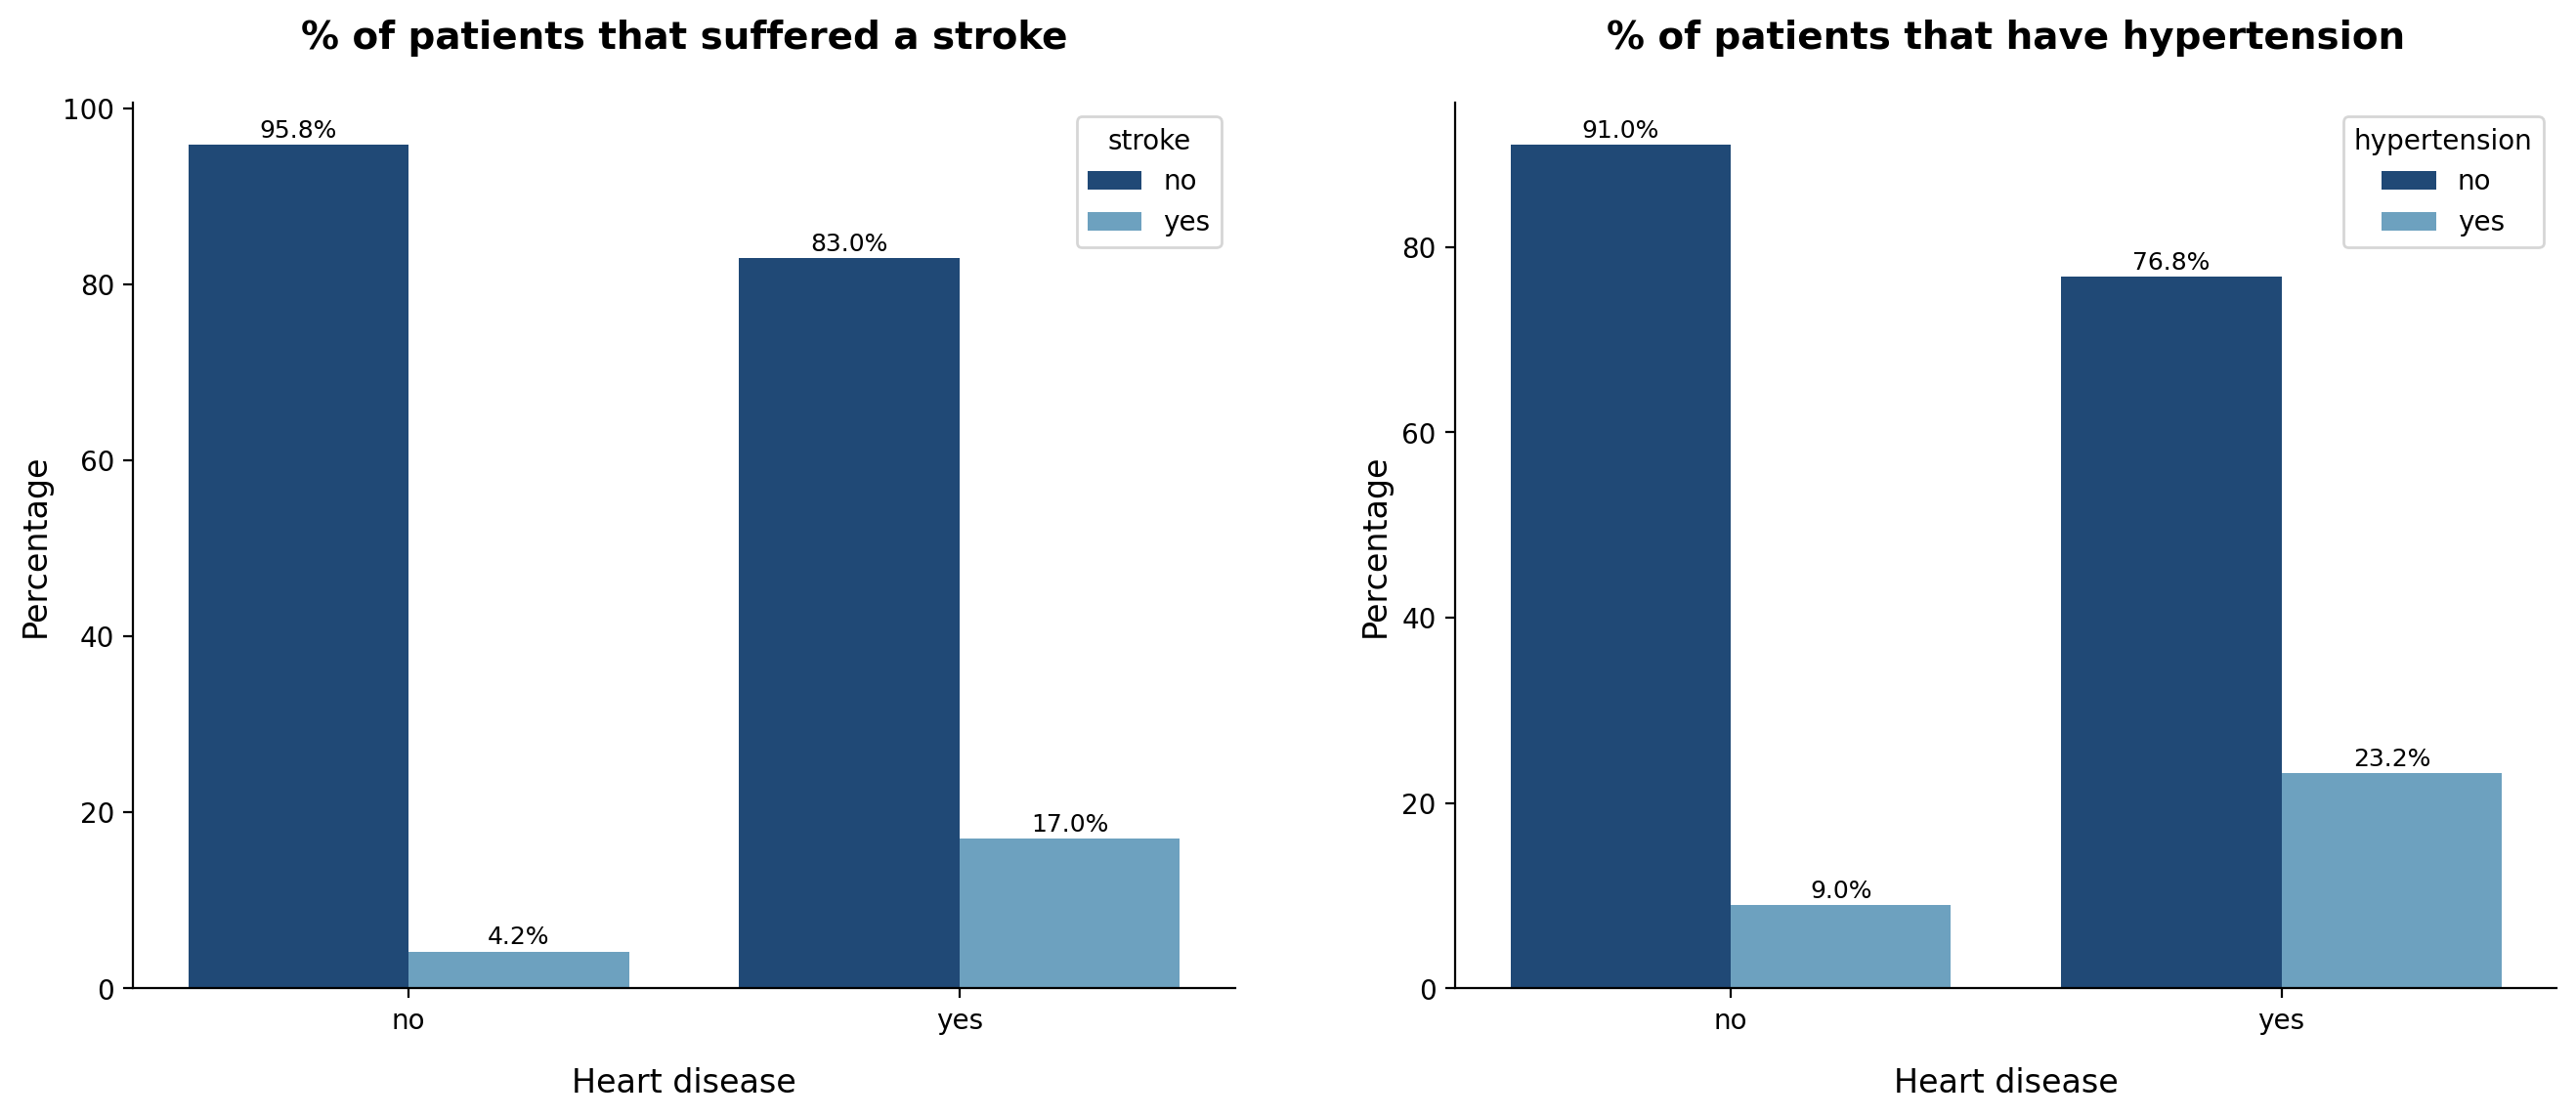

In [38]:
plot_stroke_hyper_percent("heart_disease", "stroke", "hypertension", patient_info)

#### Hypothesis testing and Confidence intervals

**Research statistic - difference in two population proportions**

1. Considering patient data, is there a significant difference between population proportions of patients who suffered a stroke and have a heart disease and those who don't have a heart disease?
2. Considering patient data, is there a significant difference between population proportions of patients who have a hypertension and also have a heart disease and those who don't have a heart disease but have a hypertension?

**Population**: patients who had a stroke/ have hypertension and patients who didn't suffer a stroke/ don't have hypertension   
**Parameter of Interest**: difference in population proportions ($p_1 - p_2$)    
**Null Hypothesis:** there is no difference between population proportions of patients with stroke/ hypertension who have a heart disease and those who don't have a heart disease ($p_1 = p_2$)   
**Alternative Hypthosis:** there is a significant difference between population proportions of patients with stroke/ hypertension who have a heart disease and those who don't have a heart disease ($p_1 \neq p_2$)


**Significance level (alfa):** 0.05


In [39]:
stroke_by_heart_disease = create_cont_table("heart_disease", "stroke", patient_info)

stroke_by_heart_disease

stroke         yes  total
heart_disease            
no             202   4833
yes             47    276

In [40]:
hypertension_by_heart_disease = create_cont_table(
    "heart_disease", "hypertension", patient_info
)

hypertension_by_heart_disease

hypertension   yes  total
heart_disease            
no             434   4833
yes             64    276

In [41]:
append_diff_in_props(
    stroke_by_heart_disease,
    hypertension_by_heart_disease,
)

p-value  z-statistic  CI lower  CI upper  \
stroke           0.00        -9.64     -0.18     -0.09   
hypertension     0.00        -7.74     -0.20     -0.10   

                              significance  
stroke        Stat. significant difference  
hypertension  Stat. significant difference

**Insights**

- Hypothesis testing proves that there is a statistically significant difference between in population proportions of patients who have a heart disease and suffered a stroke and those who don't have a heart disease but still had the stroke. Same for hypertension.
- Heart disease as a feature seems to have a predictive power.

***

### Ever married

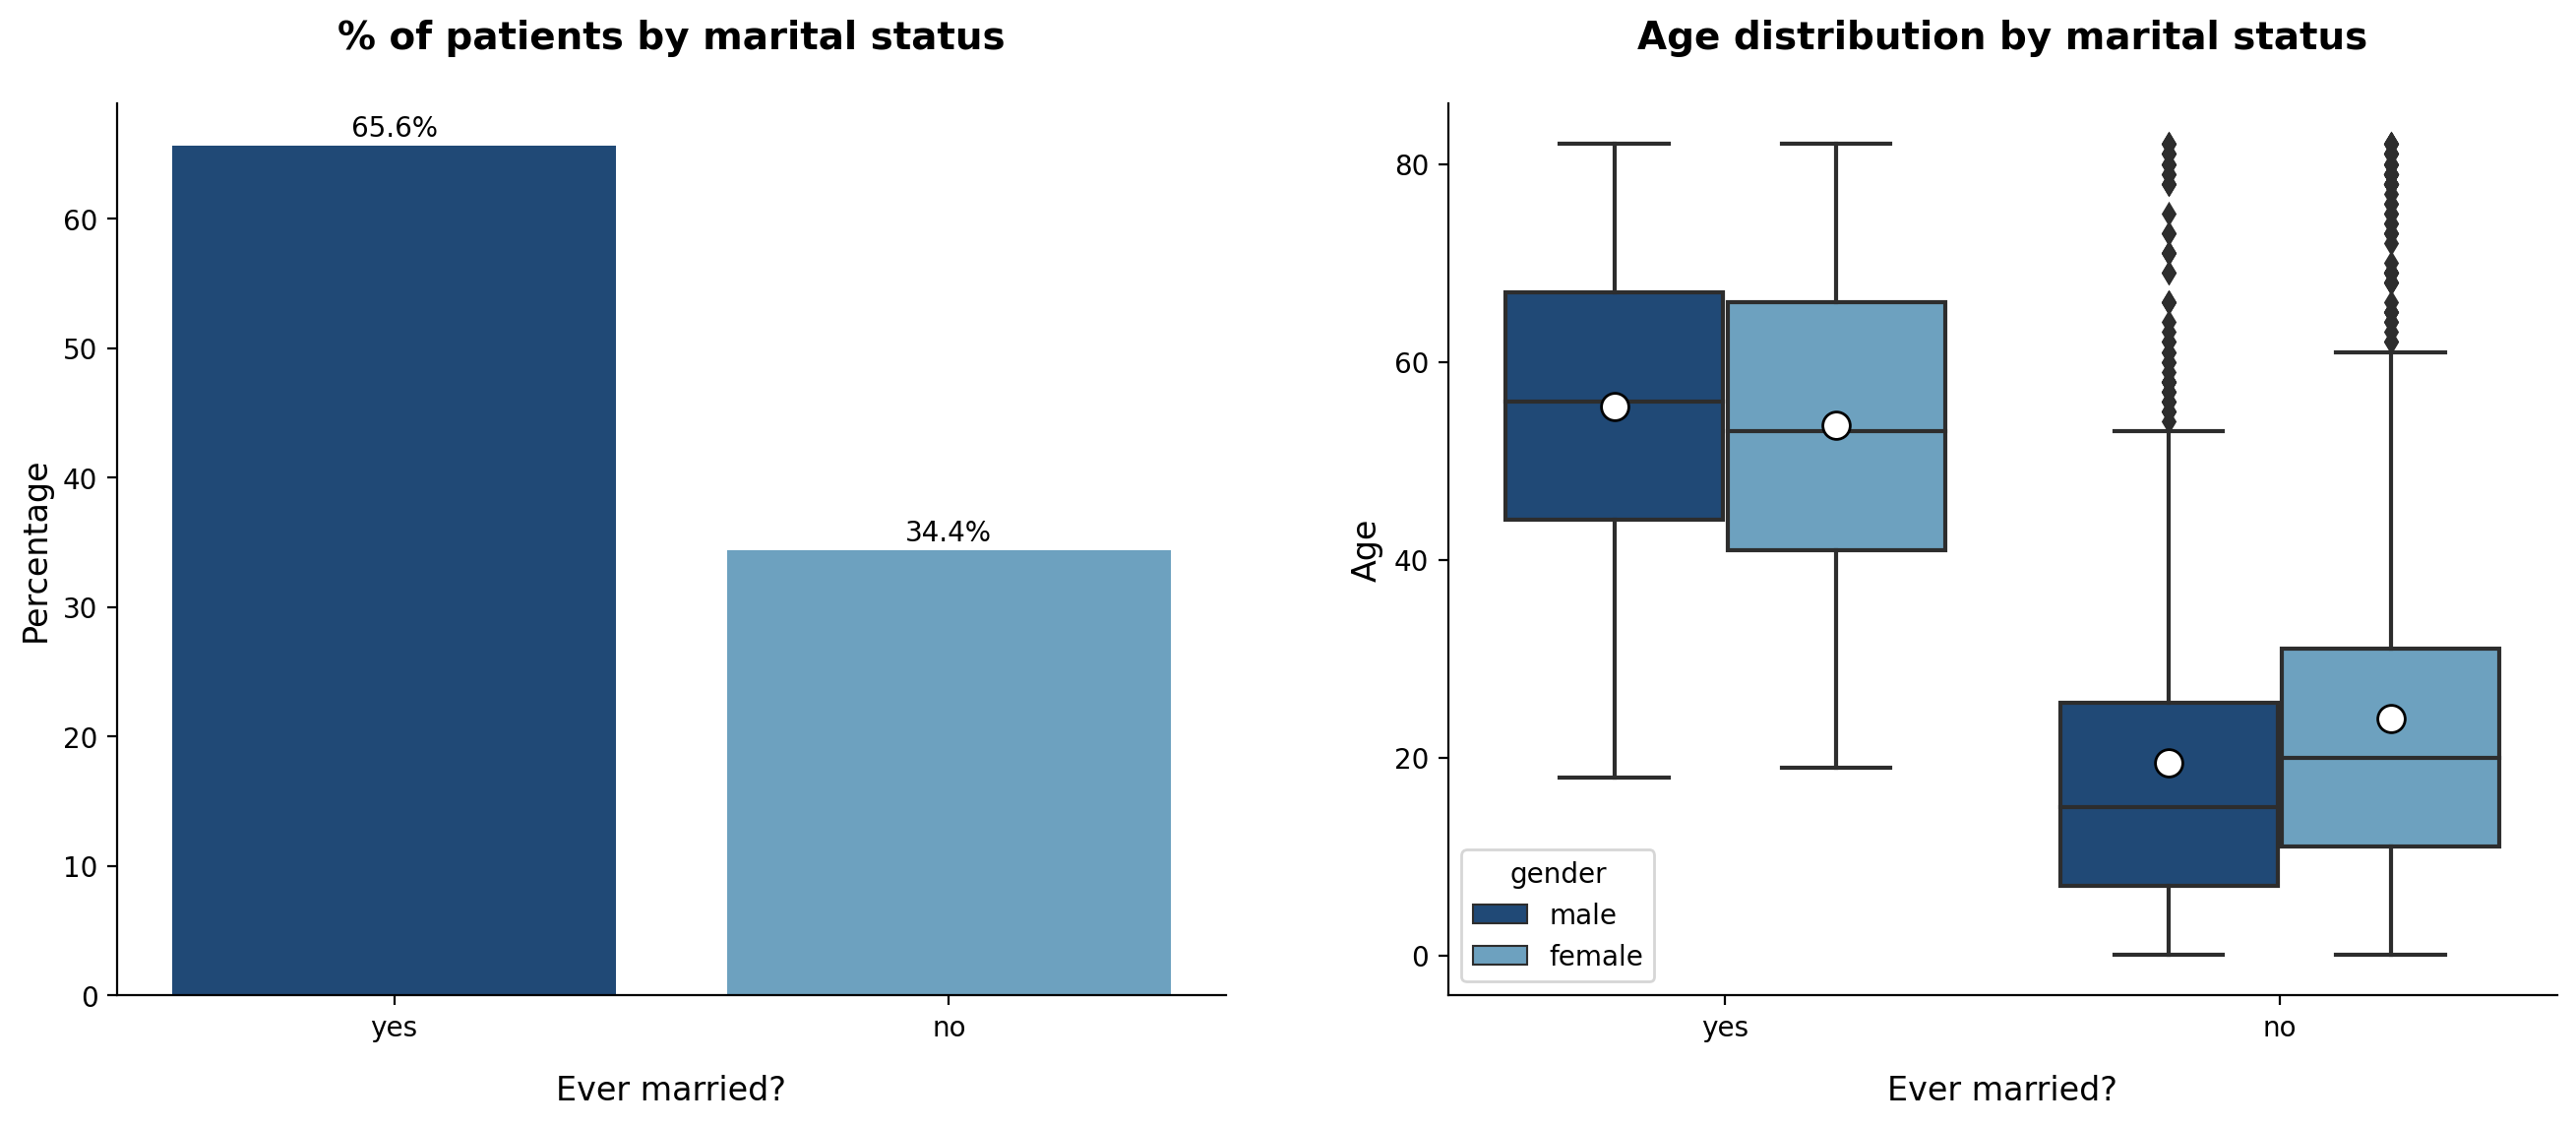

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

plot_norm_value_counts("ever_married", ax[0], patient_info)
set_labels(
        ax[0],
        "% of patients by marital status",
        'ever married?',
        "percentage",
    )

plot_boxplot(ax[1], "age", "ever_married", patient_info)
set_labels(
        ax[1],
        "Age distribution by marital status",
        'ever married?',
        "Age",
    )

plt.show()

**Insights**

- More than 65% of patients are (or have been) married.
- Majority of married patients are in an age range of 30-80 y/o while those who are not married - 0-30 y/o. Because of the age dependency, expectation is that married patients have a higher risk for stroke and hypertension.
- Gender wise: there is a slight difference in mean age between males and females. But it was not investigated deeper as it does not provide any essential info for target variables.

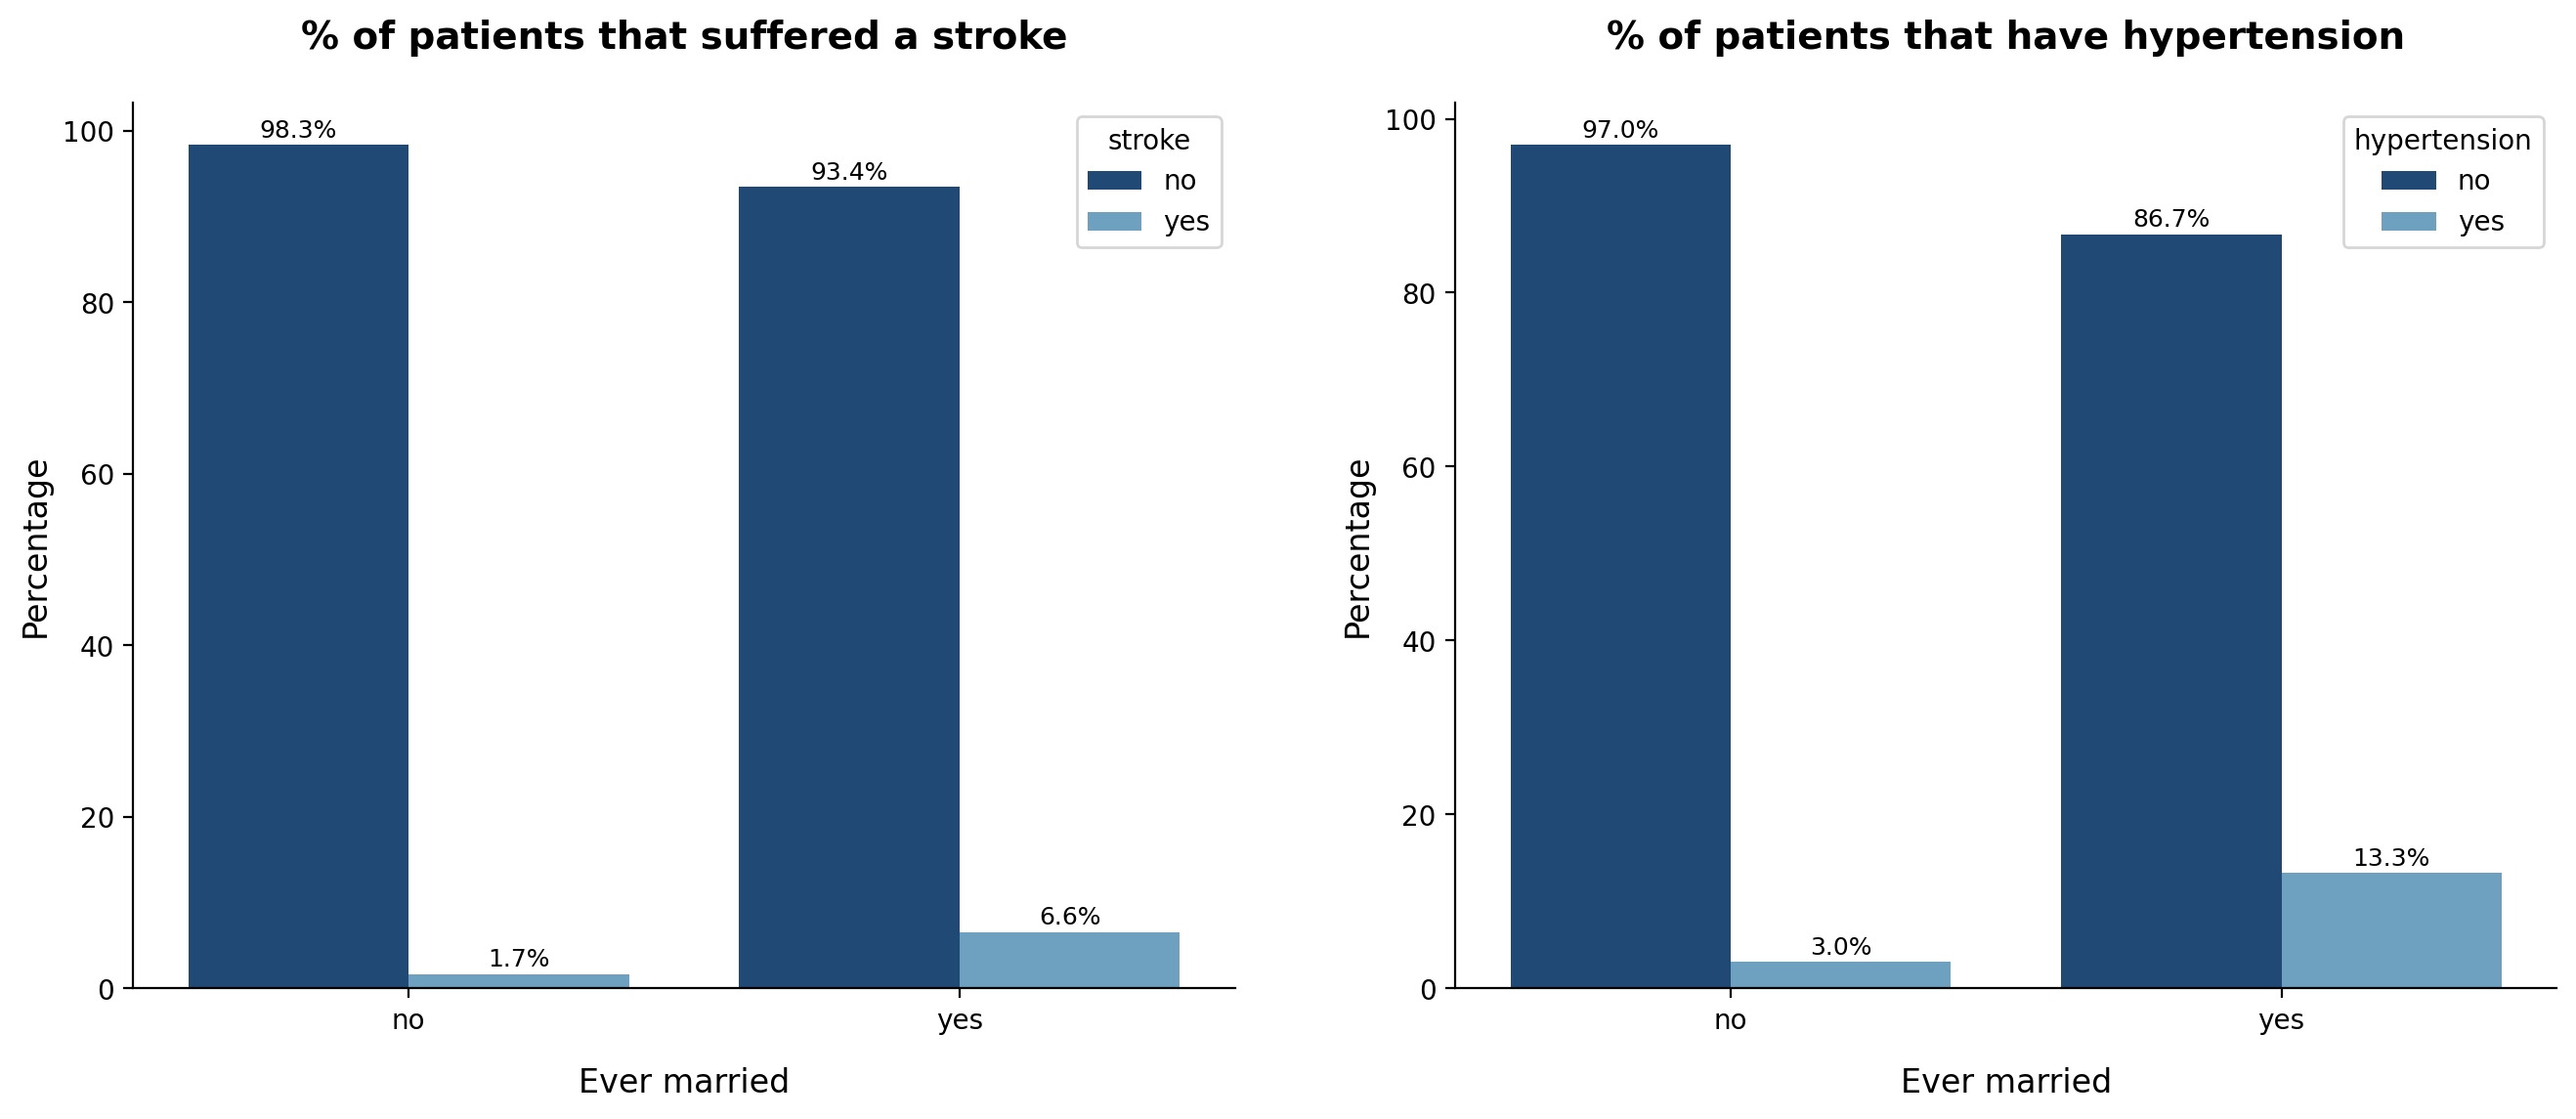

In [43]:
plot_stroke_hyper_percent("ever_married", "stroke", "hypertension", patient_info)

#### Hypothesis testing and Confidence intervals

**Research statistic - difference in two population proportions**

1. Considering patient data, is there a significant difference between population proportions of married and single patients who suffered a stroke?
2. Considering patient data, is there a significant difference between population proportions of married and single patients who have a hypertension?

**Population**: patients who had a stroke/ have hypertension and patients who didn't suffer a stroke/ don't have hypertension   
**Parameter of Interest**: difference in population proportions ($p_1 - p_2$)    
**Null Hypothesis:** there is no statistically significant difference between population proportions of married and single patients who sufferes a stroke/ have hypertension($p_1 = p_2$)   
**Alternative Hypthosis:** there is statistically significan difference between population proportions of married and single patients who suffered a stroke/ have hypertension ($p_1 \neq p_2$)

**Significance level (alfa):** 0.05


In [44]:
stroke_by_marital_status = create_cont_table("ever_married", "stroke", patient_info)

stroke_by_marital_status

stroke        yes  total
ever_married            
no             29   1756
yes           220   3353

In [45]:
hypertension_by_marital_status = create_cont_table(
    "ever_married", "hypertension", patient_info
)

hypertension_by_marital_status

hypertension  yes  total
ever_married            
no             53   1756
yes           445   3353

In [46]:
append_diff_in_props(
    stroke_by_marital_status,
    hypertension_by_marital_status,
)

p-value  z-statistic  CI lower  CI upper  \
stroke           0.00        -7.74     -0.06     -0.04   
hypertension     0.00       -11.74     -0.12     -0.09   

                              significance  
stroke        Stat. significant difference  
hypertension  Stat. significant difference

**Insights**

- Hypothesis testing proves that there is a statistically significant difference in population proportions between married and not-married patients who suffered a stroke. Same for hypertension.

***

### Work type

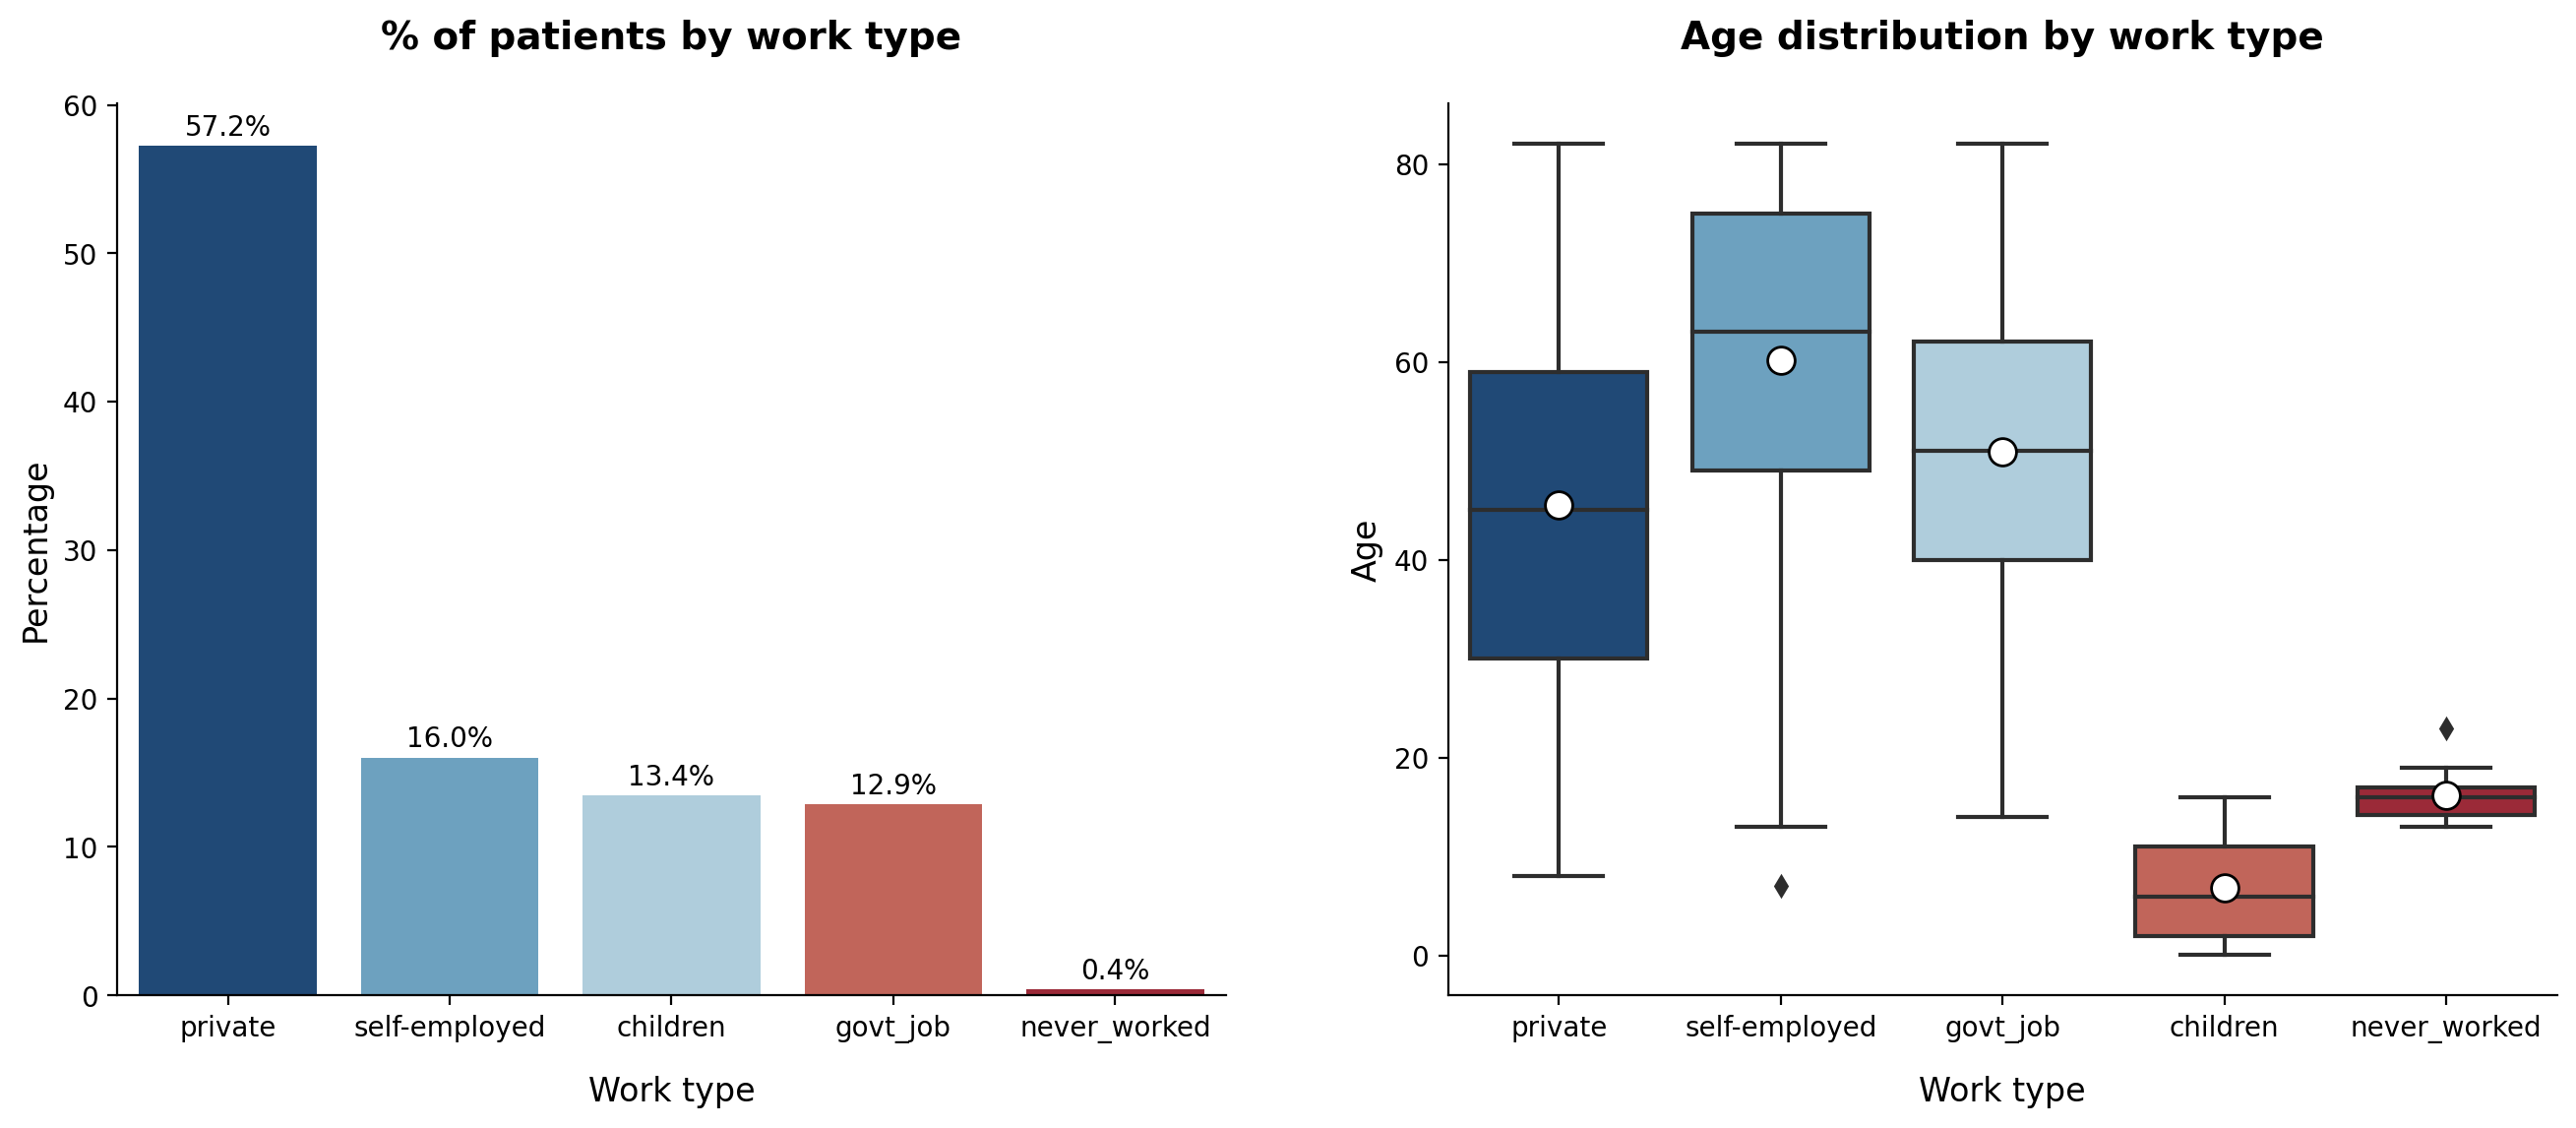

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

plot_norm_value_counts("work_type", ax[0], patient_info)

plot_boxplot(ax[1], "age", "work_type", patient_info, hue=None)

plt.show()

**Insights**

- Majority of patients (more than 57%) works in private sector.
- Work type distribution by age indicates that:
    - patients working in private sector are in an age range of 30-60 y/o
    - patients working in goverment sector are in an age range of 40-60 y/o
    - self-employed patients are in an age range of 50-60 y/o
    - patients who never worked are in an age range of 18-20 y/o 
- Based on stroke and hypertension dependency on age, the hihgest proportion of patients who suffered a stroke/ have hypertension should fall under self-employed group.

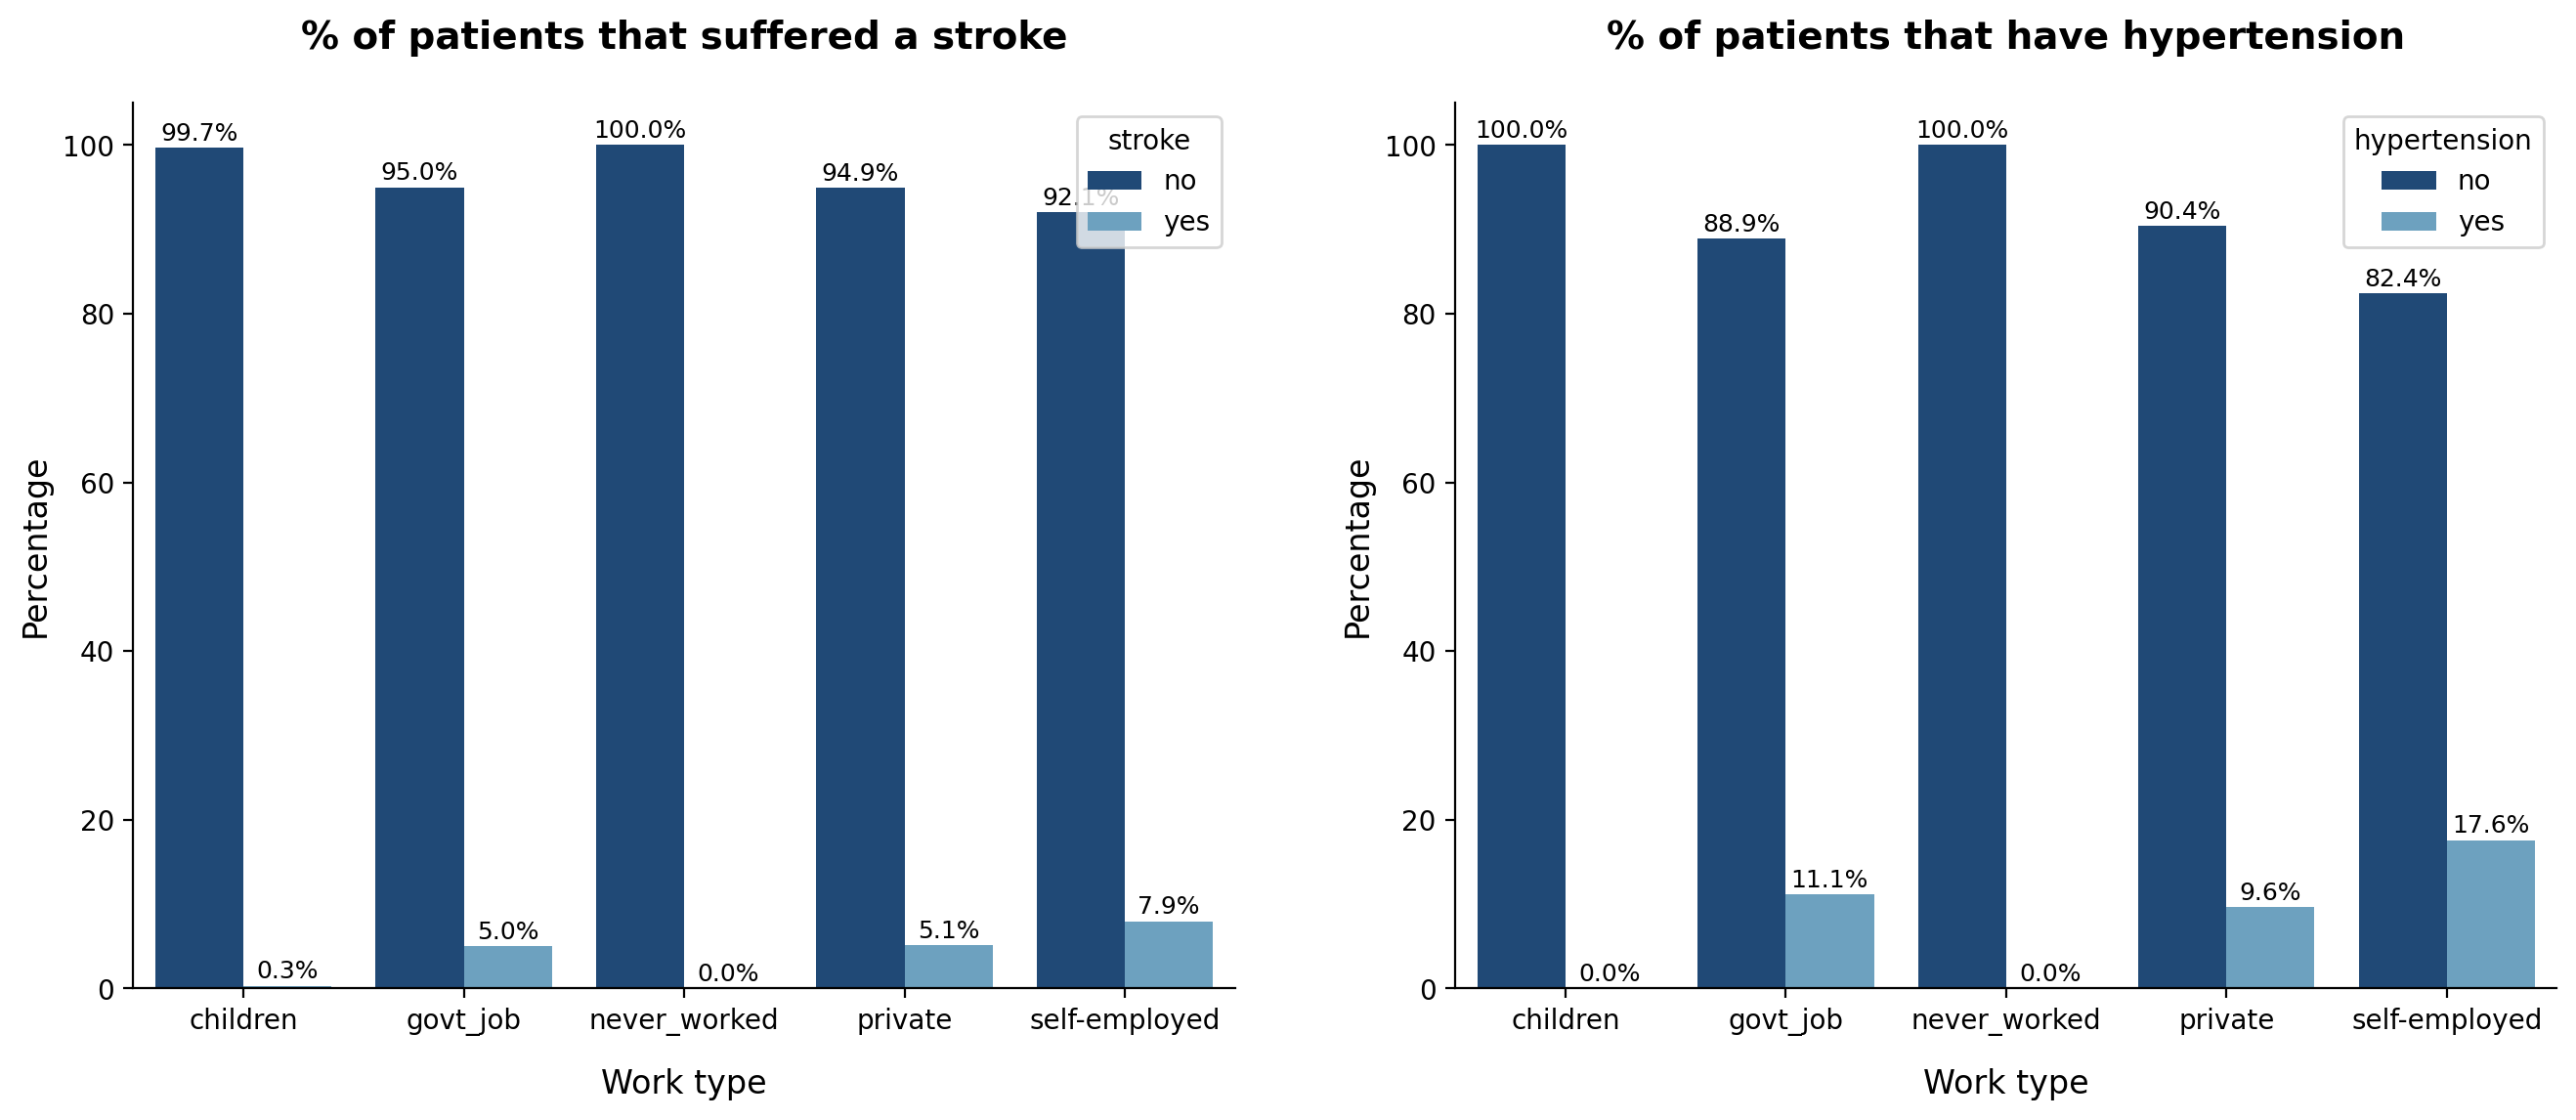

In [48]:
plot_stroke_hyper_percent("work_type", "stroke", "hypertension", patient_info)

#### Hypothesis testing and Confidence intervals

**Research statistic - difference in two population proportions**

1. Considering patient data, is there a significant difference between population proportions of patients who suffered a stroke and are working in government sector and those who are working in private sector?
2. Considering patient data, is there a significant difference between population proportions of patients who have a hypertension and are working in government sector and those who are working in private sector?

**Population**: patients who had a stroke/ have hypertension and patients who didn't suffer a stroke/ don't have hypertension   
**Parameter of Interest**: difference in population proportions ($p_1 - p_2$)    
**Null Hypothesis:** there is no difference between population proportions of patients with stroke/ hypertension working in goverment sector and those working in private sector ($p_1 = p_2$)   
**Alternative Hypthosis:** there is a significant difference between population proportions of patients with stroke/ hypertension working in goverment sector and those working in private sector ($p_1 \neq p_2$)


**Significance level (alfa):** 0.05


In [49]:
stroke_by_work_type = create_cont_table("work_type", "stroke", patient_info)

stroke_by_work_type.loc[
    [
        "govt_job",
        "private",
    ]
]

stroke     yes  total
work_type            
govt_job    33    657
private    149   2924

In [50]:
hypertension_by_work_type = create_cont_table("work_type", "hypertension", patient_info)

hypertension_by_work_type.loc[["govt_job", "private"]]

hypertension  yes  total
work_type               
govt_job       73    657
private       281   2924

In [51]:
append_diff_in_props(
    stroke_by_work_type.loc[["govt_job", "private"]],
    hypertension_by_work_type.loc[["govt_job", "private"]],
)

p-value  z-statistic  CI lower  CI upper         significance
stroke           0.94        -0.08     -0.02      0.02  Not enough evidence
hypertension     0.24         1.16     -0.01      0.04  Not enough evidence

**Insights**

- Hypothesis testing proves that there is not enough evidence to reject null hypothesis meaning that there is no statistically significant difference between population proportions of patients with stroke who are working in goverment sector and those working in private sector. Same applies for hypertension.
- However, as observed, there is statistically significant difference between population proportions of stroke patients who are working in government sector and those who are self employed. Same applies for hypertension. Hypothesis testing could be found in Annex at the end of the notebook.

***

### Residence type

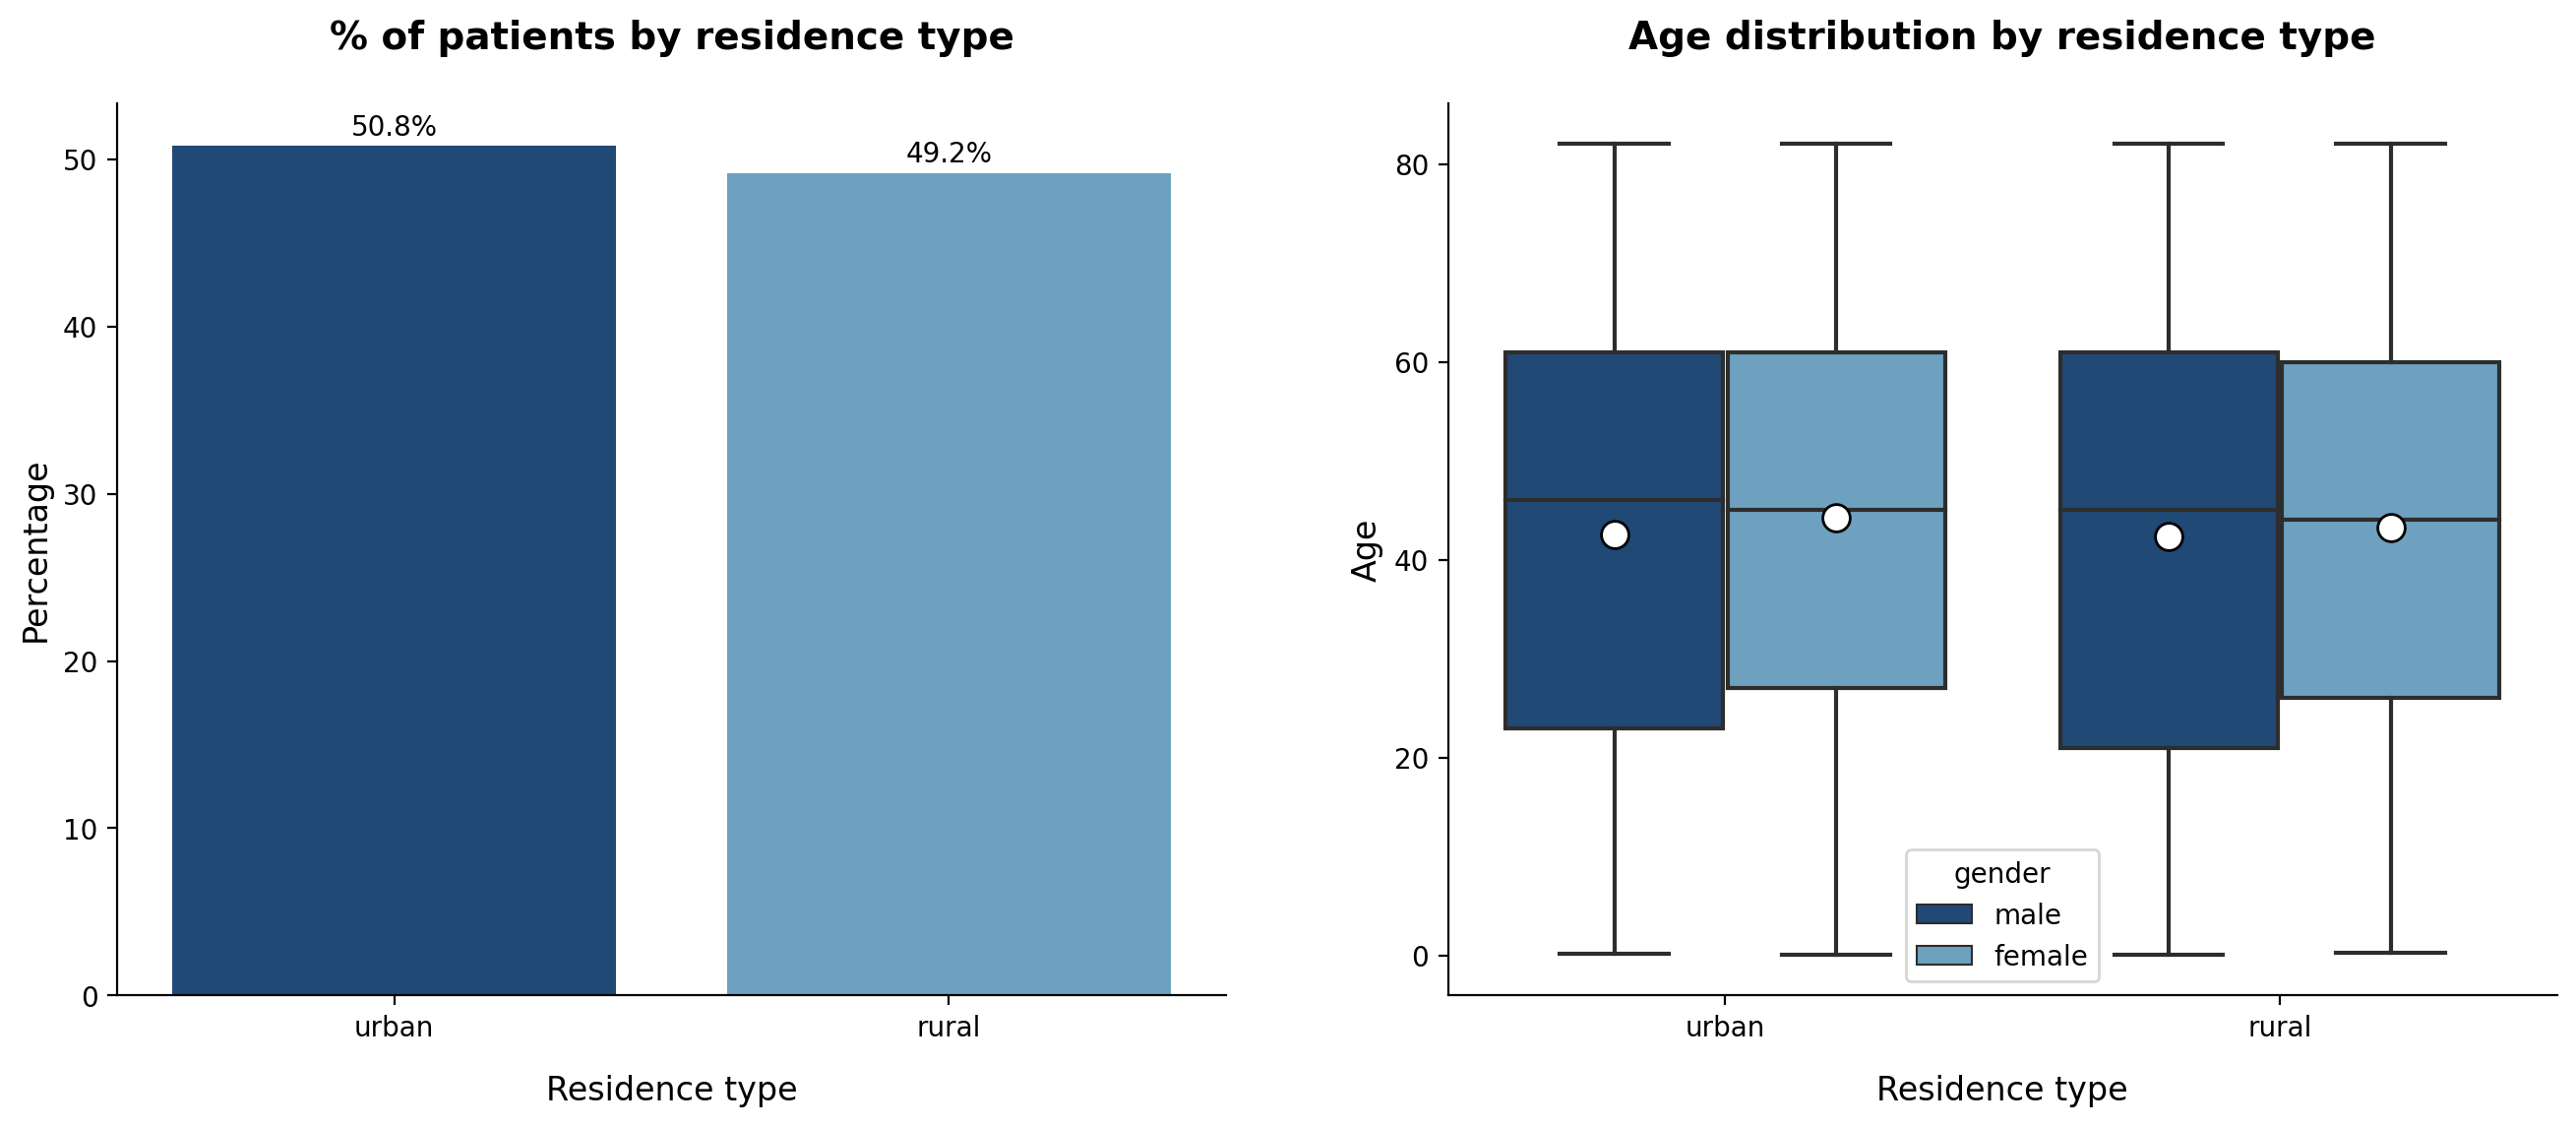

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

plot_norm_value_counts("residence_type", ax[0], patient_info)

plot_boxplot(ax[1], "age", "residence_type", patient_info)

plt.show()

**Insights**

- Percentage of patients living in urban area is almost the same as patients living in rural area. 
- Avg age is also very similar between patients who reported living in urban area and rural area - about 43 y/o.

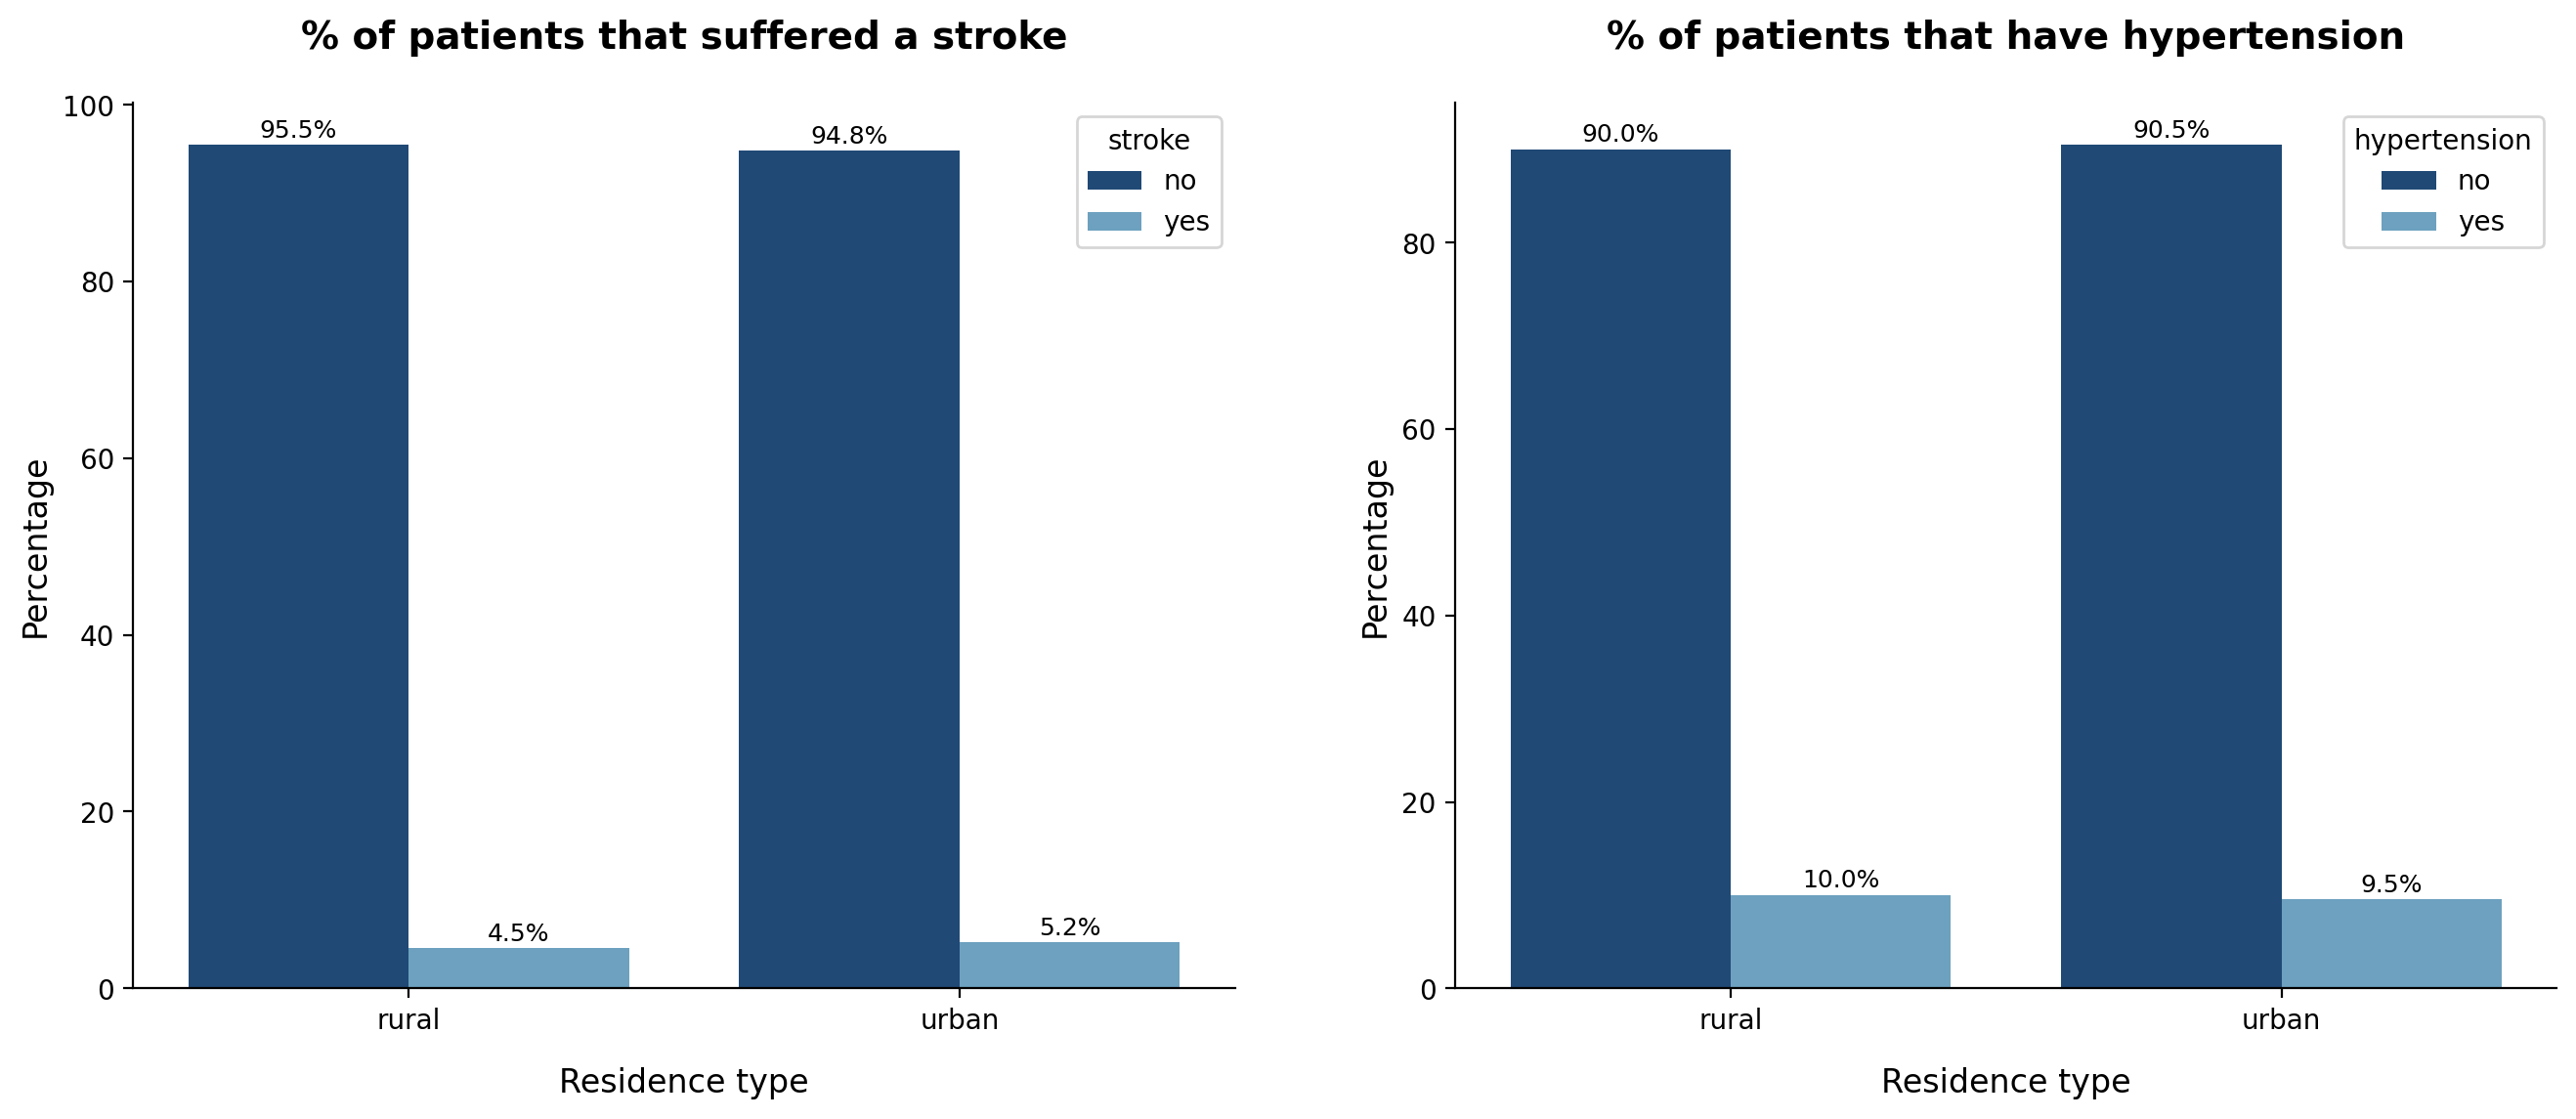

In [53]:
plot_stroke_hyper_percent("residence_type", "stroke", "hypertension", patient_info)

#### Hypothesis testing and Confidence intervals

**Research statistic - difference in two population proportions**

1. Considering patient data, is there a significant difference between population proportions of rural residents and urban residents who suffered a stroke?
2. Considering patient data, is there a significant difference between population proportions of rural residents and urban residents who have a hypertension?

**Population**: patients who had a stroke/ have hypertension and patients who didn't suffer a stroke/ don't have hypertension   
**Parameter of Interest**: difference in population proportions ($p_1 - p_2$)    
**Null Hypothesis:** there is no statistically significant difference between population proportions of rural residents and urban residents who suffered a stroke/ have hypertension($p_1 = p_2$)   
**Alternative Hypthosis:** there is statistically significant difference between population proportions of rural residents and urban residents who suffered a stroke/ have hypertension ($p_1 \neq p_2$)

**Significance level (alfa):** 0.05


In [54]:
stroke_by_residence = create_cont_table("residence_type", "stroke", patient_info)

stroke_by_residence

stroke          yes  total
residence_type            
rural           114   2513
urban           135   2596

In [55]:
hypertension_by_residence = create_cont_table(
    "residence_type", "hypertension", patient_info
)

hypertension_by_residence

hypertension    yes  total
residence_type            
rural           251   2513
urban           247   2596

In [56]:
append_diff_in_props(
    stroke_by_residence,
    hypertension_by_residence,
)

p-value  z-statistic  CI lower  CI upper         significance
stroke           0.27        -1.10     -0.02      0.01  Not enough evidence
hypertension     0.57         0.57     -0.01      0.02  Not enough evidence

**Insights**

- Hypothesis testing proves that there is not enough evidence to reject null hypothesis leading to the conclusion that there is no statistically significant difference between the population proportions of patients living in rural area and patients living in urban area who suffered a stroke. Same outcome is found for hypertension.
- Seems that residence type as a feature has a low importance for stroke or hypertension prediction.

***

### Average glucose level

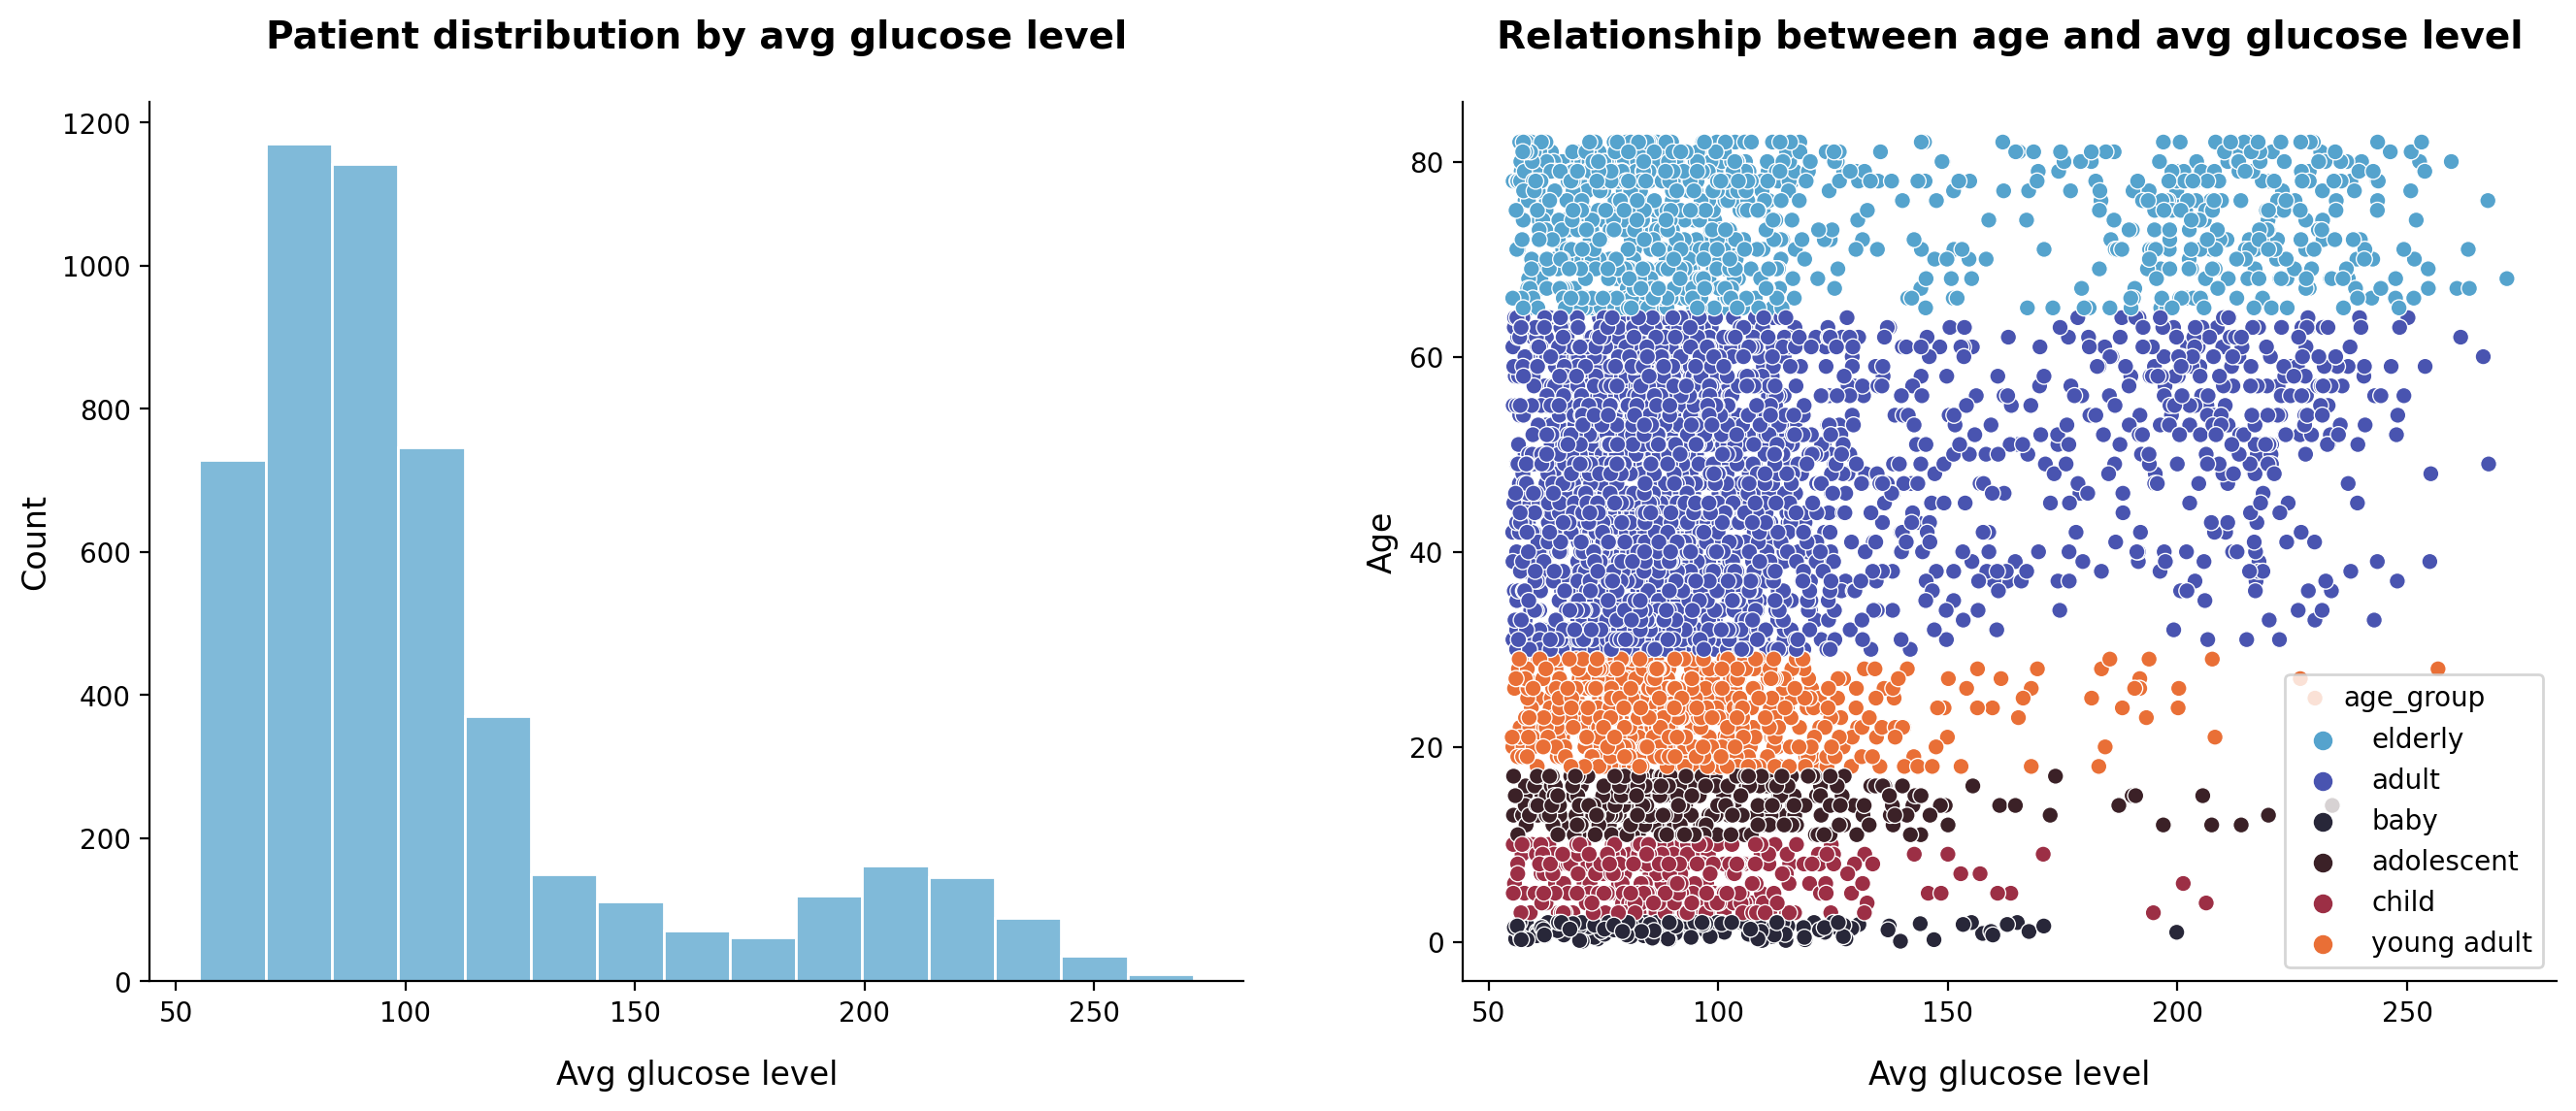

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(
    x="avg_glucose_level",
    data=patient_info,
    bins=15,
    edgecolor="white",
    ax=ax[0],
    color="#55a3cd",
)
set_labels(
    ax[0],
    "patient distribution by avg glucose level",
    "avg glucose level",
    "count",
)

sns.scatterplot(
    x="avg_glucose_level",
    y="age",
    data=patient_info,
    hue="age_group",
    ax=ax[1],
    palette="icefire",
)
set_labels(
    ax[1],
    "relationship between age and avg glucose level",
    "avg glucose level",
    "age",
)

plt.show()

**Insights**

- Distribution of avg glucose level is highly right skewed with the majority of patients clustered between 80-100 milligrams (mg) per decilitre (dl). (A decilitre measures fluid volume that is 1/10 litre). Another smaller cluster is around 200ml/dl.
- For the majority of healthy individuals (non-diabetic), normal blood sugar levels are as follows:
    - 0–5 y/o: 100–180mg/dl
    - 6-9 y/o: 80–140mg/dl
    - 10 y/o and over: 70–140mg/dl
- In general, higher glucose levels are expected for young children but it should decrease with age. However avg glucose level distribution by age reveals the opposite trend for this dataset - avg glucose level is increasing as patient gets older. 

Reference: https://www.medicalnewstoday.com/articles/317536#blood-sugar-charts

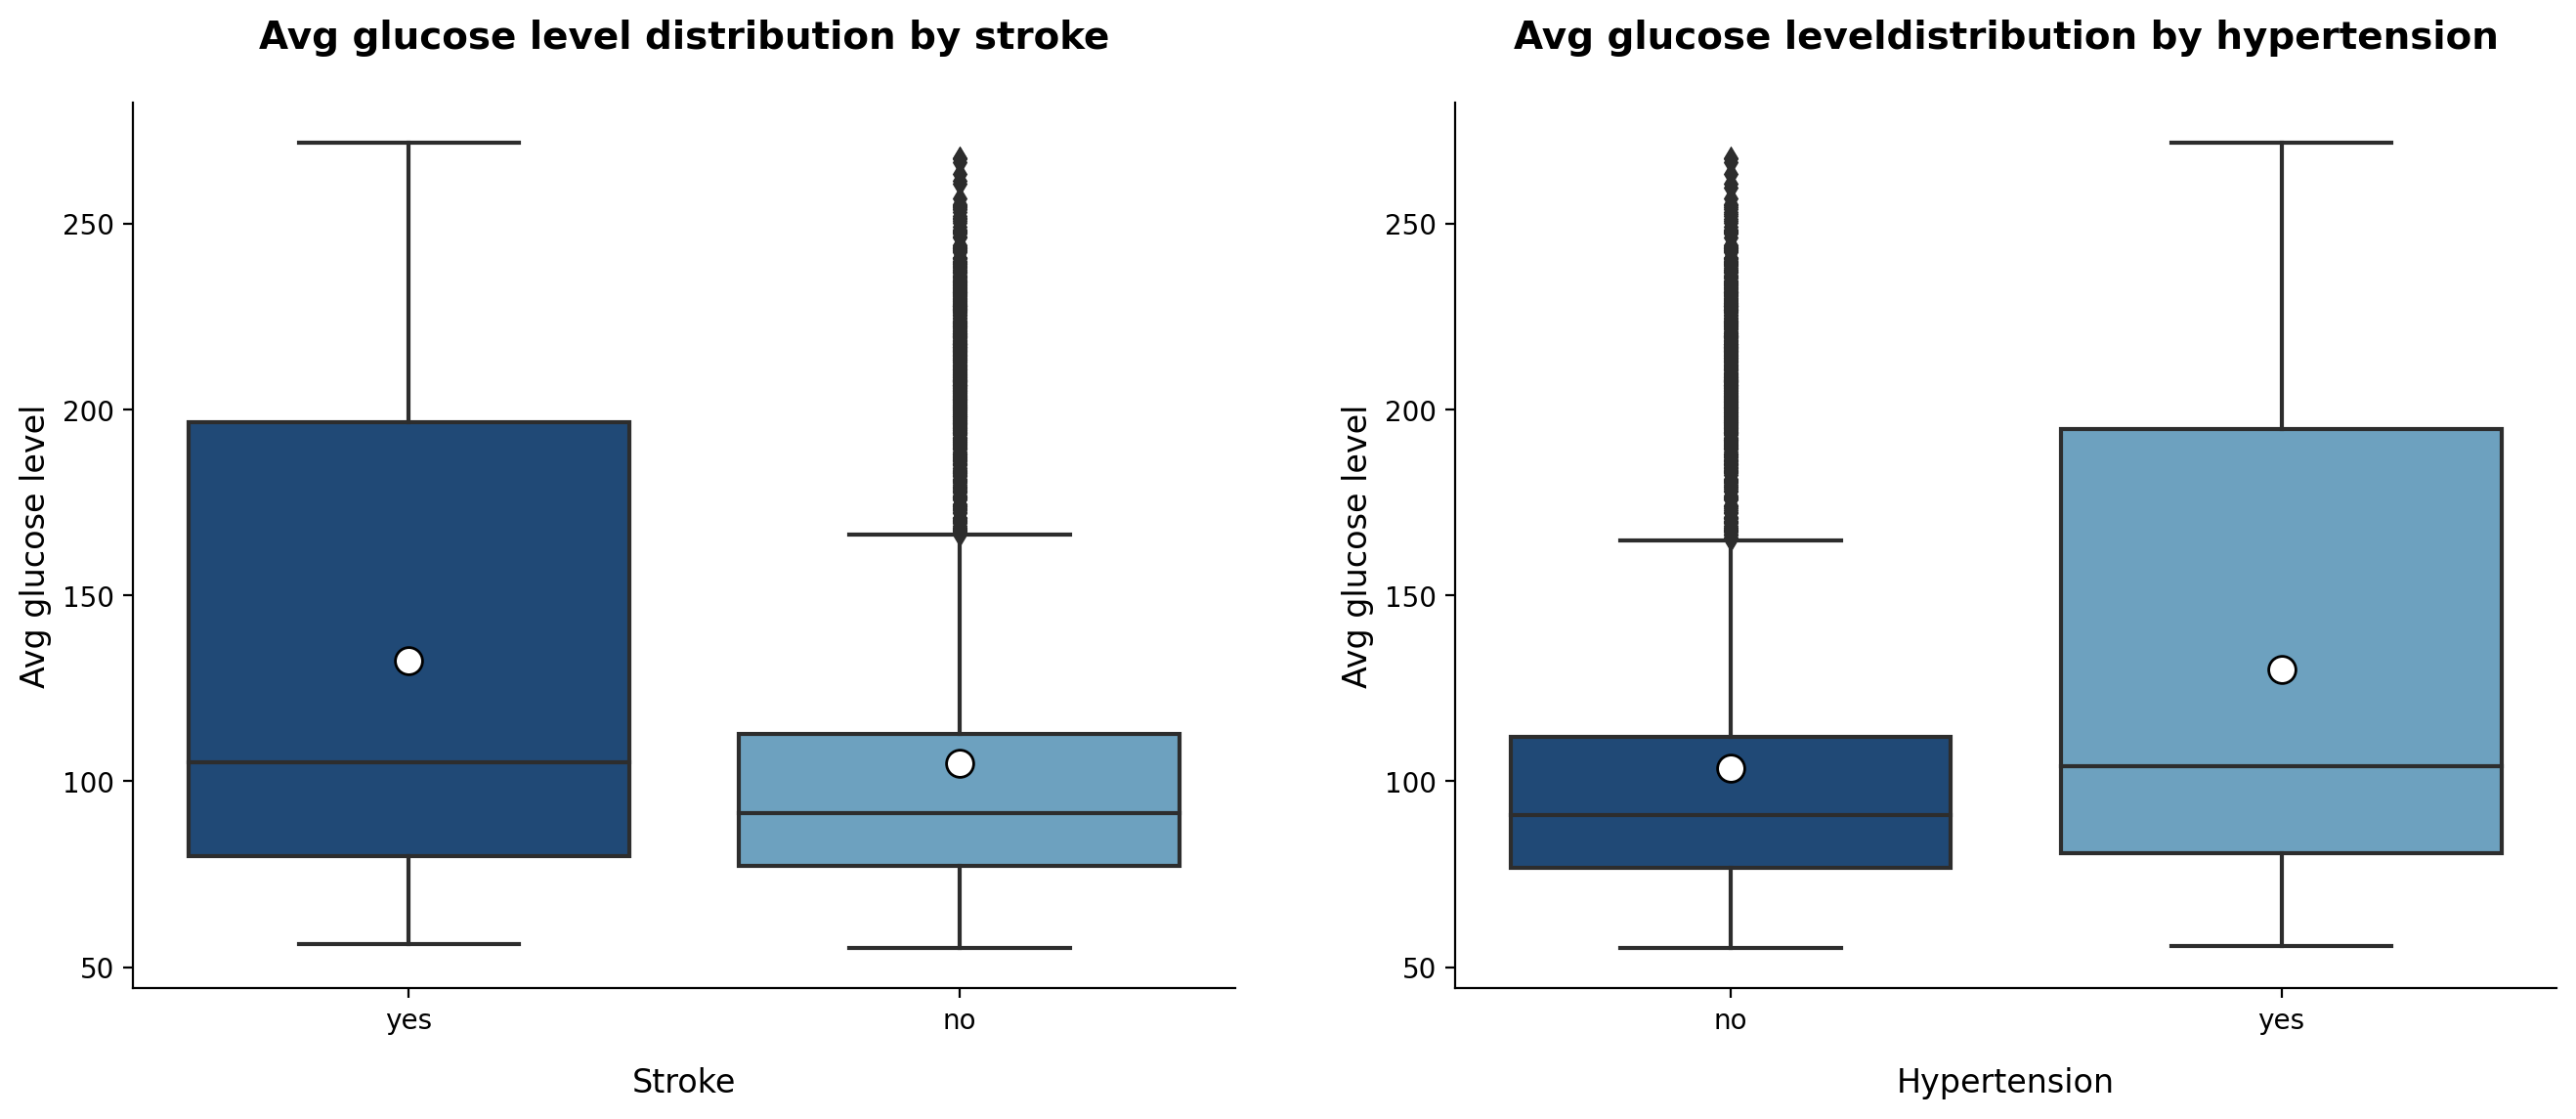

In [58]:
plot_stroke_hyper_mean("avg_glucose_level", "stroke", "hypertension", patient_info)

#### Hypothesis testing and Confidence intervals

**Research statistic - difference in two population means**

1. Considering patient data, do patients that suffered a stroke have significantly different mean glucose level than patients that didn't suffer a stroke?
2. Considering patient data, do patients that have hypertension have significantly different mean glucose level than patients that don't have hypertension?

**Population**: patients who had a stroke/ have hypertension and patients who didn't suffer a stroke/ don't have hypertension   
**Parameter of Interest**: difference in means ($\mu_1 - \mu_2$)   
**Null Hypothesis:** there is no satistically significant difference in mean glucose level ($\mu_1 = \mu_2$)    
**Alternative Hypthosis:** there is a significant difference in mean glucose level ($\mu_1 \neq \mu_2$)

**Significance level (alfa):** 0.05

In [59]:
patient_info.groupby("stroke").agg(
    avg_glucose_level=("avg_glucose_level", "mean"),
    sample_size=("avg_glucose_level", "size"),
)

avg_glucose_level  sample_size
stroke                                
no                 104.79         4860
yes                132.54          249

In [60]:
patient_info.groupby("hypertension").agg(
    avg_glucose_level=("avg_glucose_level", "mean"),
    sample_size=("avg_glucose_level", "size"),
)

avg_glucose_level  sample_size
hypertension                                
no                       103.54         4611
yes                      130.19          498

In [61]:
append_diff_in_means("avg_glucose_level", patient_info)

p-value  z-statistic  CI lower  CI upper  \
stroke           0.00        -6.98    -35.58    -19.93   
hypertension     0.00        -9.61    -32.10    -21.20   

                              significance  
stroke        Stat. significant difference  
hypertension  Stat. significant difference

**Insights**

- Avg glucose level for patients who suffered a stroke is higher than patients who didn't have the stroke. Same relationship is observed for hypertension.
- Above statement was proved by hypothesis testing - there is a statsitically significant difference in mean glucose level for patients who suffered a stroke and stroke-free patients. Same applies for hypertension

#### Glucose range

In [62]:
patient_info["glucose_range"] = patient_info.apply(
    lambda x: find_glucose_range(x["age"], x["avg_glucose_level"]), axis=1
)

In [63]:
patient_info["glucose_range"].value_counts(normalize="True")

in range   0.66
too low    0.18
too high   0.16
Name: glucose_range, dtype: float64

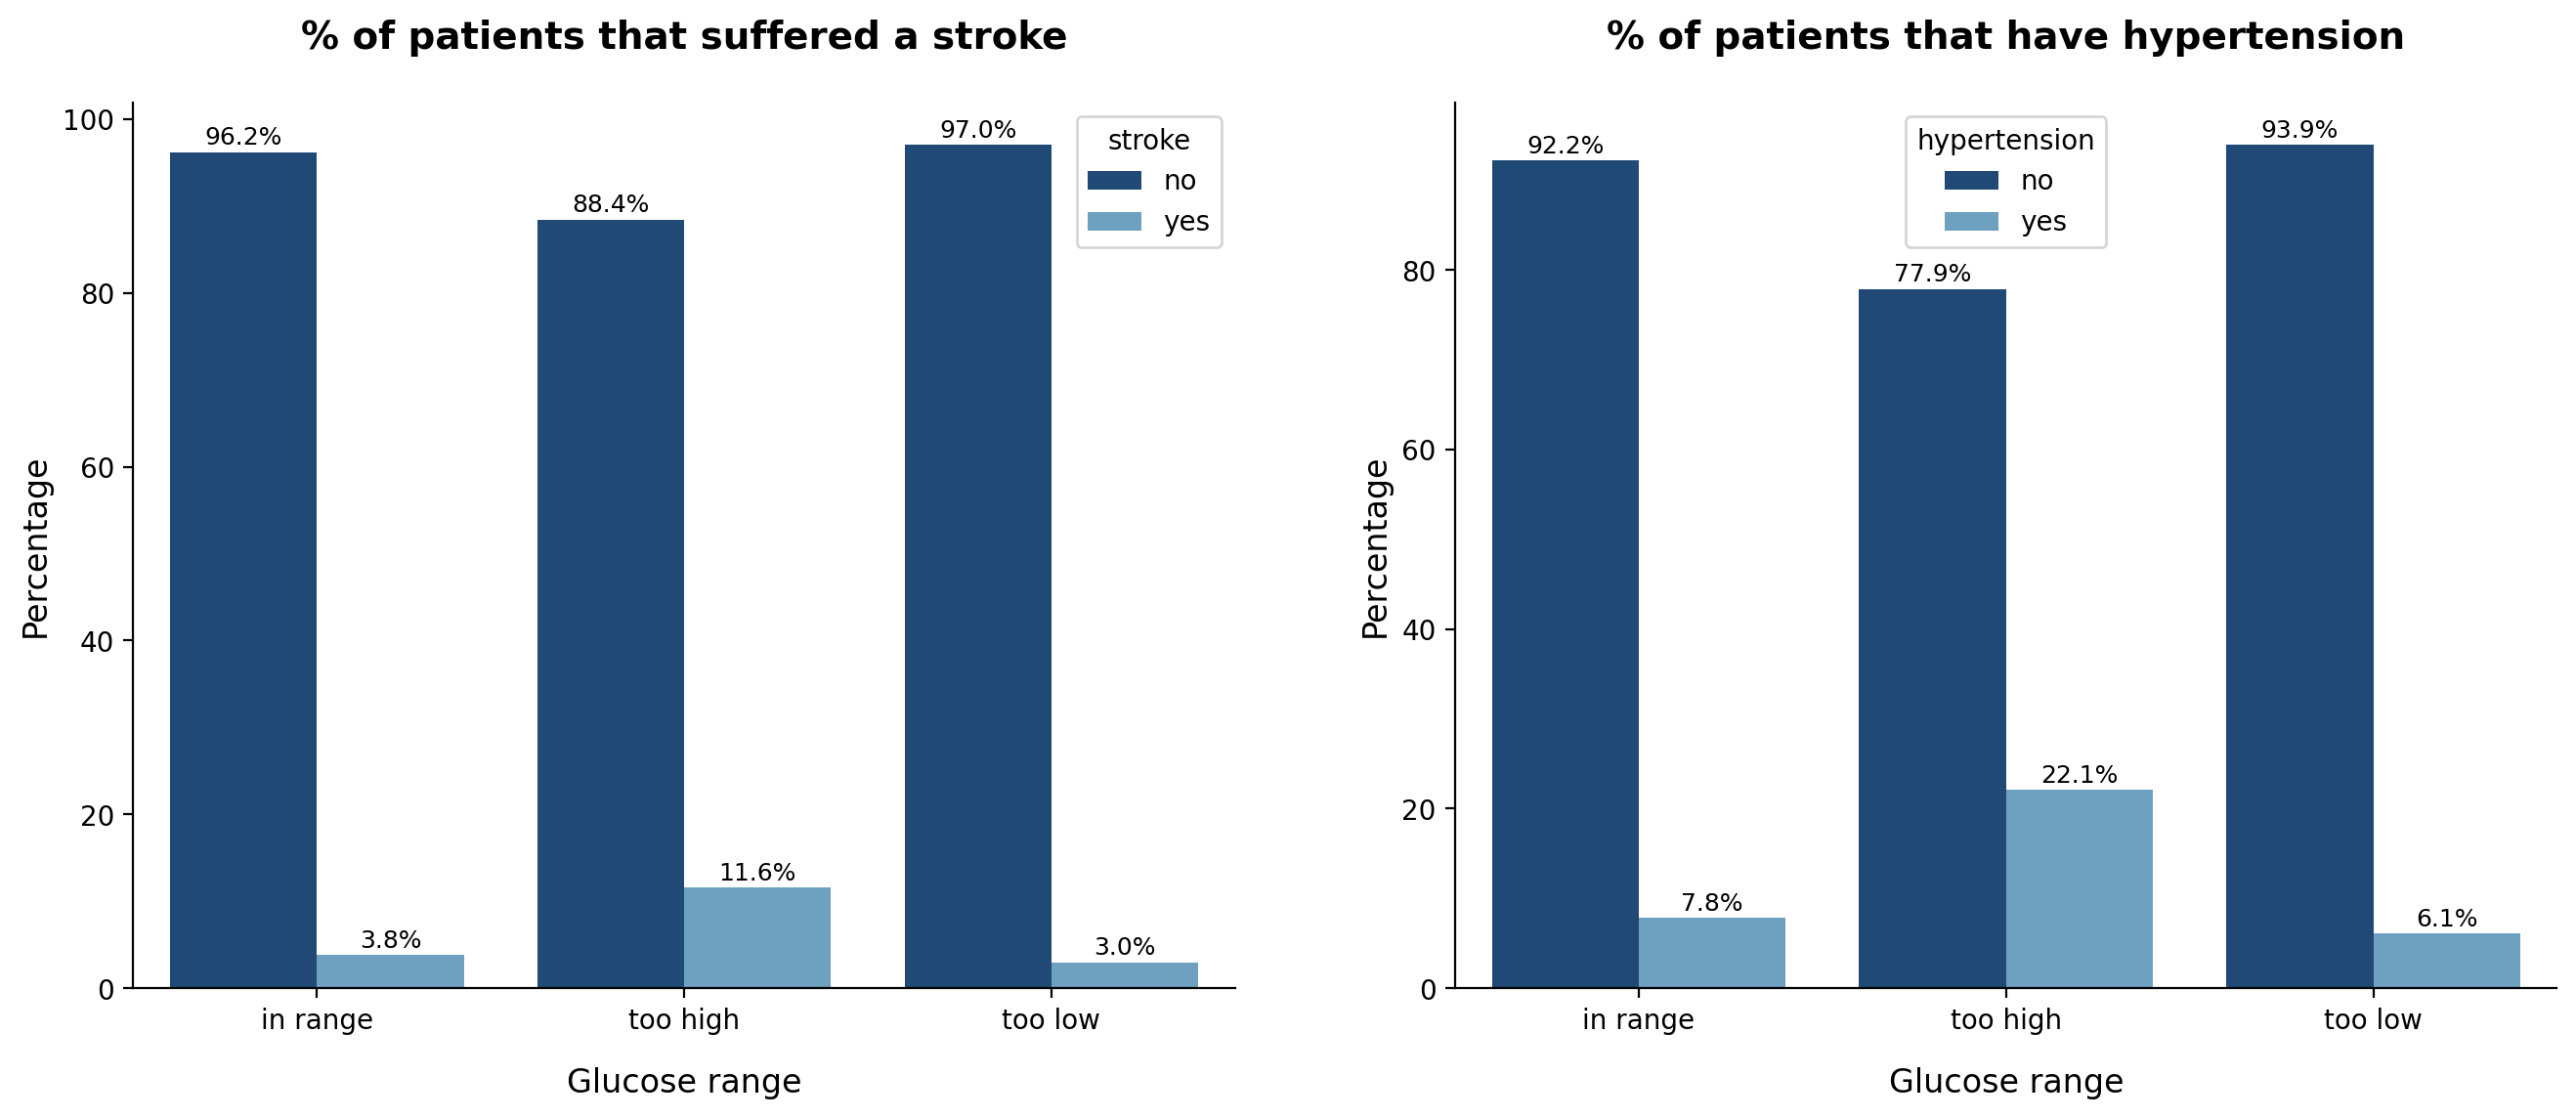

In [64]:
plot_stroke_hyper_percent("glucose_range", "stroke", "hypertension", patient_info)

**Insights**

- Based on general guidelines for normal blood sugar levels for different age groups, patients were divided into three groups:
    - those that have avg glucose level in normal range
    - those that have too high avg sugar level
    - those that have too low avg sugar level
- Proportion of patients that experienced a stroke is the highest for those who have too high avg glucose level. Same applies for hypertension.
- Clustering of patients based on avg glucose levels might not be accurate as there is no information when data was gathered (glucose level varies quite a lot throughout a day) and whether a person is diabetic or not (different ranges should be applied).

References: 
 - https://www.mymed.com/health-wellness/interesting-health-info/blood-sugar-levels/what-is-considered-a-normal-blood-sugar-level 
 - https://www.medicalnewstoday.com/articles/317536#blood-sugar-charts

***

### BMI

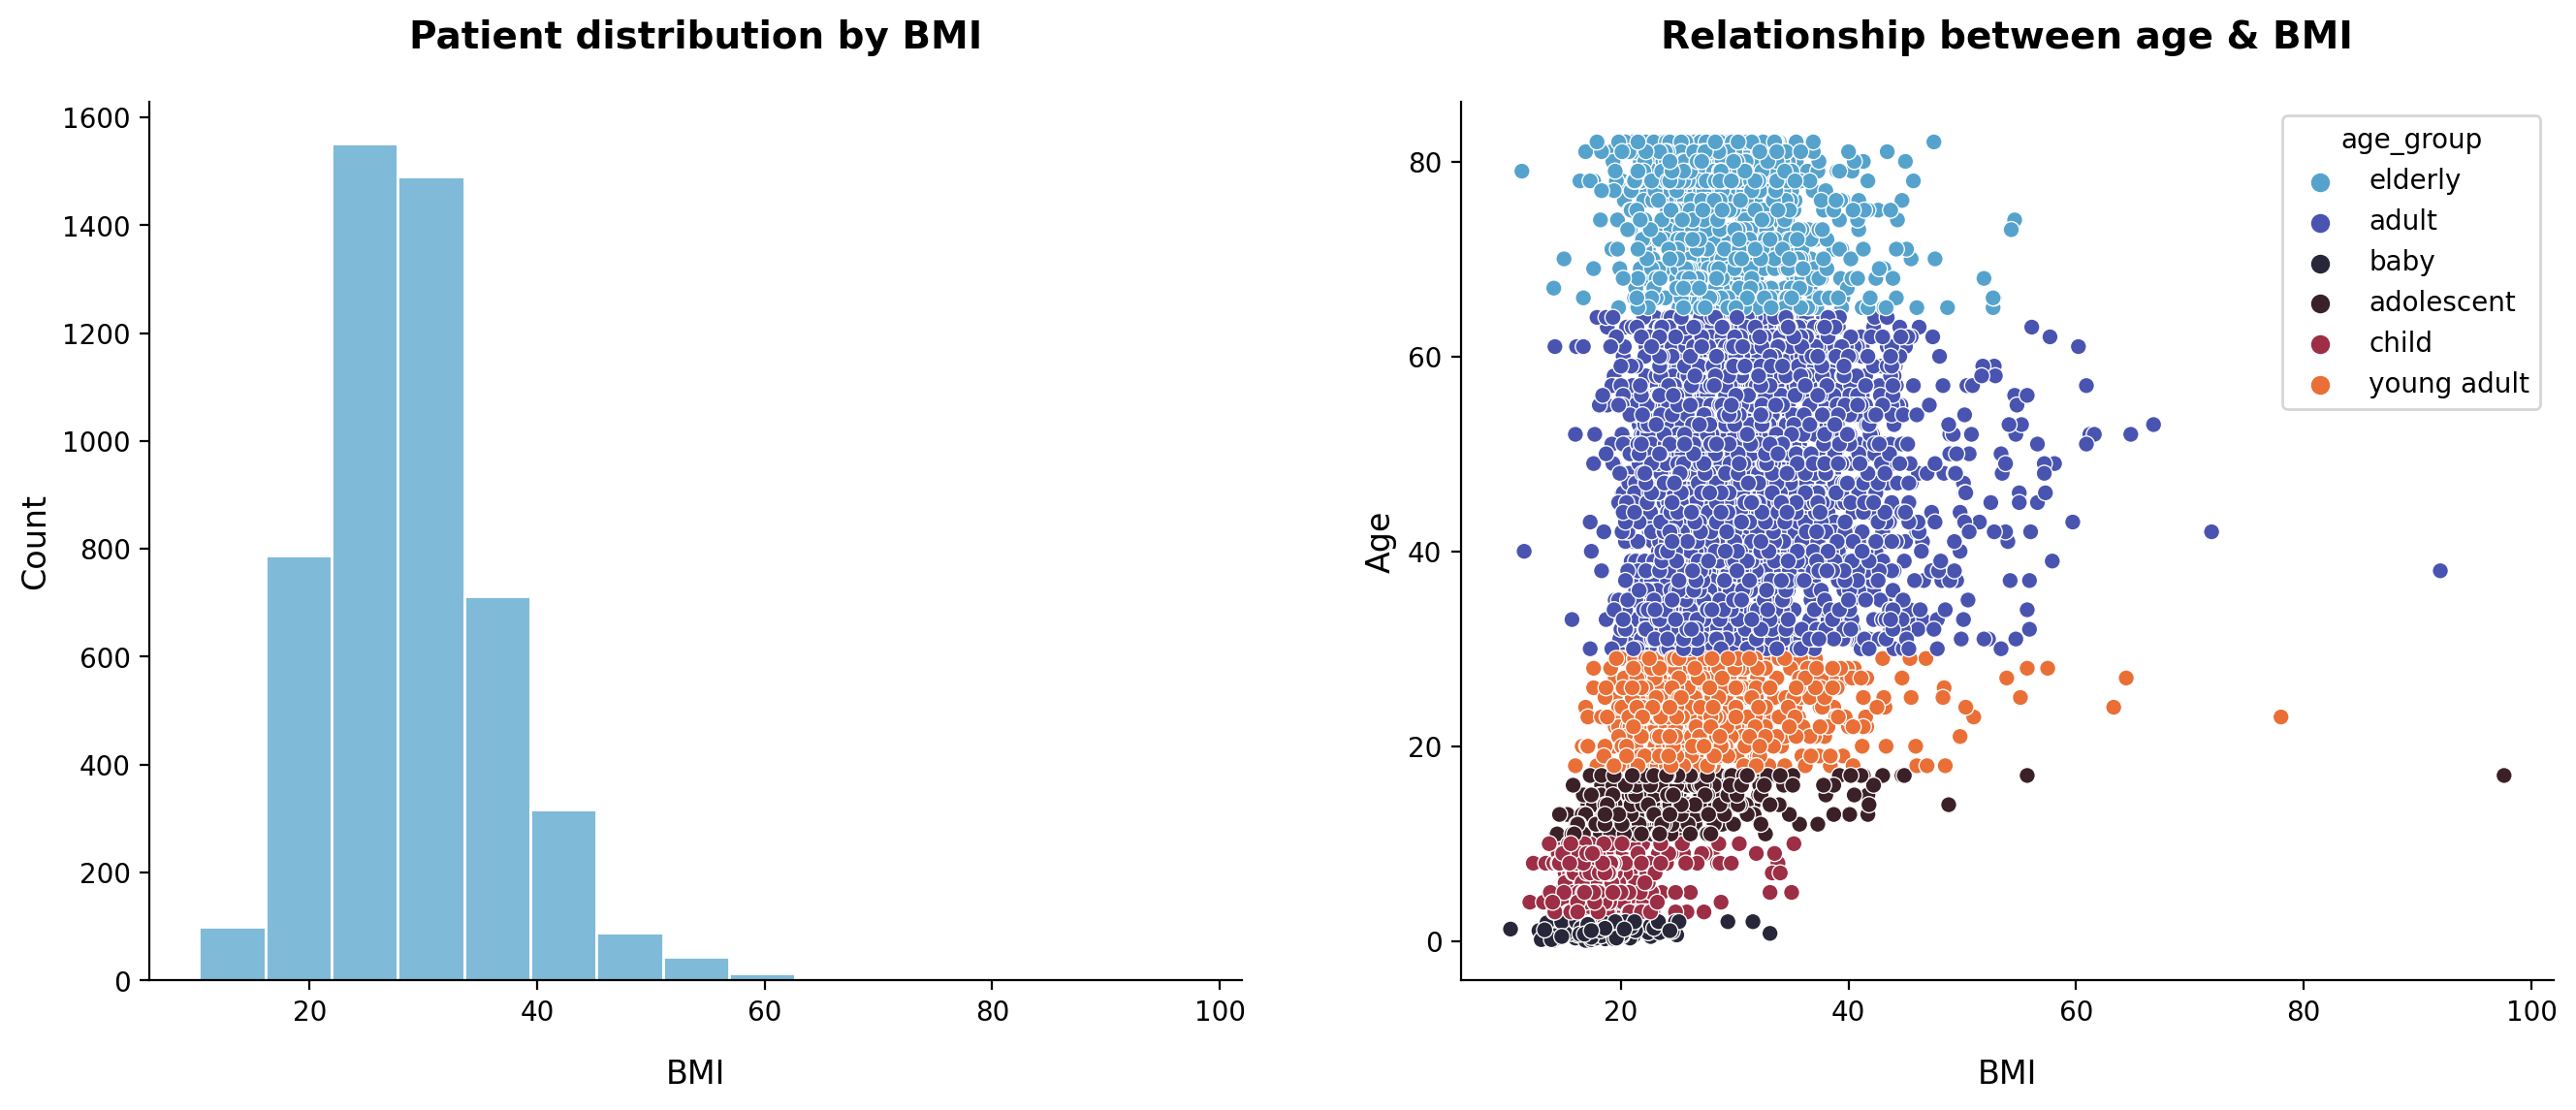

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(
    x="bmi", data=patient_info, bins=15, edgecolor="white", ax=ax[0], color="#55a3cd"
)
set_labels(
    ax[0],
    "patient distribution by bmi",
    "bmi",
    "count",
)

sns.scatterplot(
    x="bmi", y="age", data=patient_info, ax=ax[1], hue="age_group", palette="icefire"
)
set_labels(
    ax[1],
    "relationship between age & bmi",
    "bmi",
    "age",
)

plt.show()

In [66]:
patient_info[patient_info["bmi"] >= 25]["bmi"].count()

3503

**Insights**

- BMI distribution is right skewed with the most of patients roughly between 25-30 and some outliers on the higher end. 
- Standard weight categories for adults based on BMI are:
    - underweight if BMI < 18.5
    - normal weight if 18.5 <= BMI < 25
    - overweight if 25 <= BMI < 30
    - obesity if BMI >= 30
- BMI for children is interpreted in a different way but the general rule for both adults and children is that anyone who has BMI over 25 is considered as having overweight. More than half of patients in this dataset are overweight with the majority in the adult age group (30-65 y/o)

    Reference: https://www150.statcan.gc.ca/n1/pub/82-620-m/2005001/article/child-enfant/4144161-eng.htm
    
- BMI distribution by age looks a bit like parabola: BMI increases from 0 y/o to ~30 y/o and starts dropping after that but doesn't come back to the lowest point. So the general trend is that BMI increases as patients get older but for elderly group BMI tends to drop a bit comparing with adult group. This is an important point for choosing the method to handle missing values as it is obvious that simply imputing the mean or median wouldn't be sufficient enough.

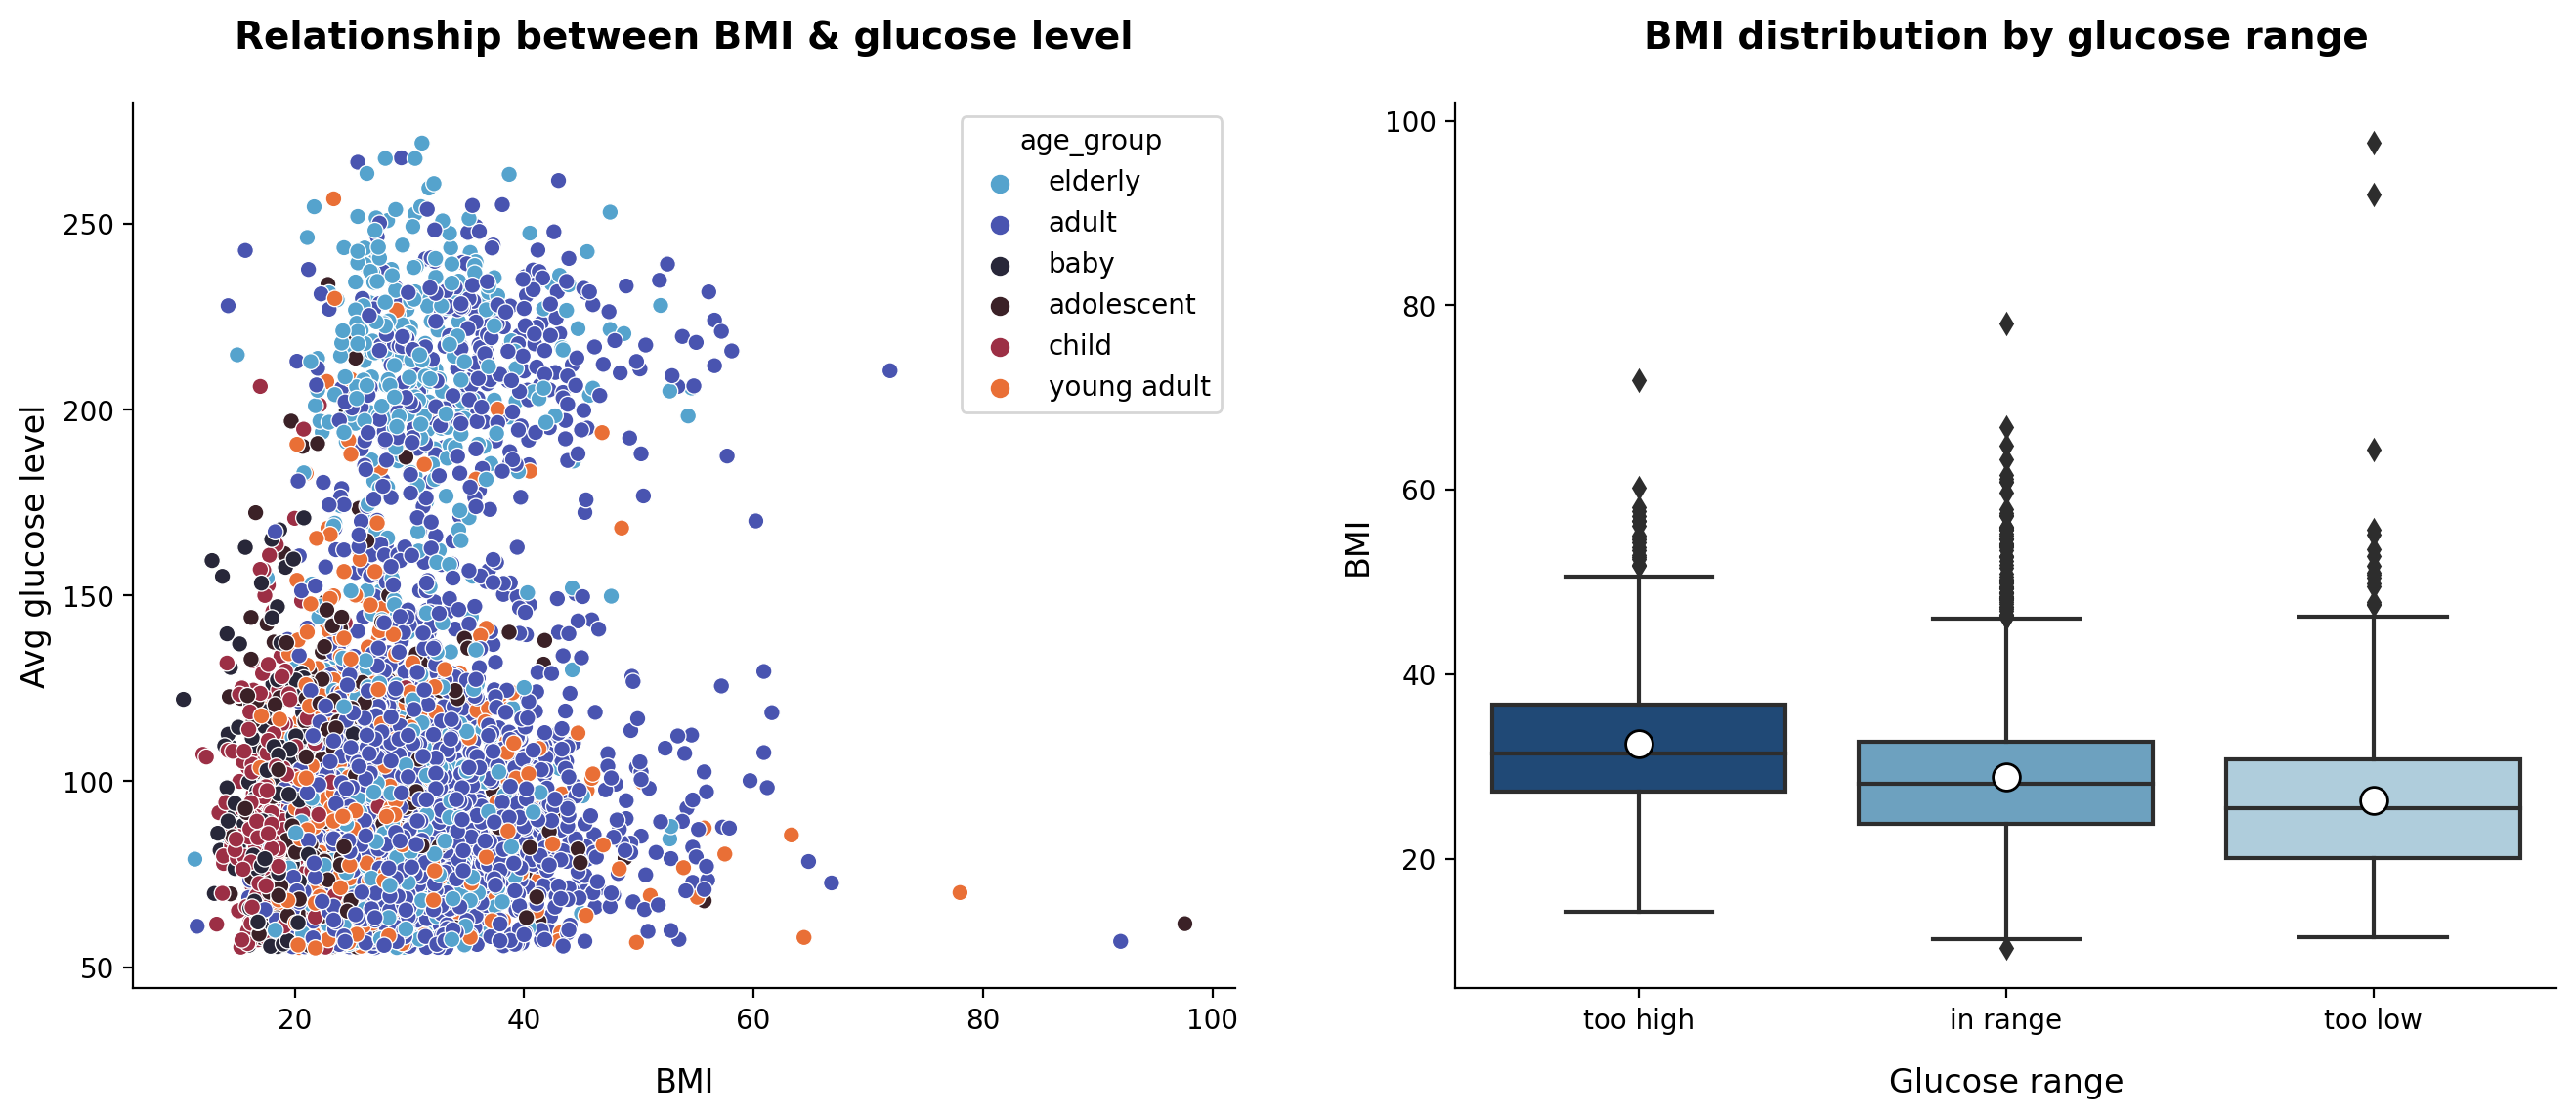

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(
    x="bmi",
    y="avg_glucose_level",
    data=patient_info,
    ax=ax[0],
    hue="age_group",
    palette="icefire",
)
set_labels(
    ax[0],
    "relationship between bmi & glucose level",
    "bmi",
    "avg glucose level",
)

plot_boxplot(ax[1], 'bmi','glucose_range', patient_info, hue=None)

plt.show()

In [68]:
round(patient_info[patient_info["bmi"] >= 25]["avg_glucose_level"].mean(), 2)

110.79

In [69]:
round(patient_info[patient_info["bmi"] < 25]["avg_glucose_level"].mean(), 2)

96.01

**Insights**
 
- BMI distribution by avg glucose level indicates two groups or clusters of patients: 
    - those with BMI range between 18 and 40 and glucose level until 140mg/dl
    - those with BMI range shifted between 25 and 45 and glucose level roughly between 180 and 250mg/dl
- More obvious pattern between BMI and avg glucose level could be noticed plotting bmi distribution by blood sugar level status: patients with too high glucose level has higher BMI than patients with normal and low glucose level.

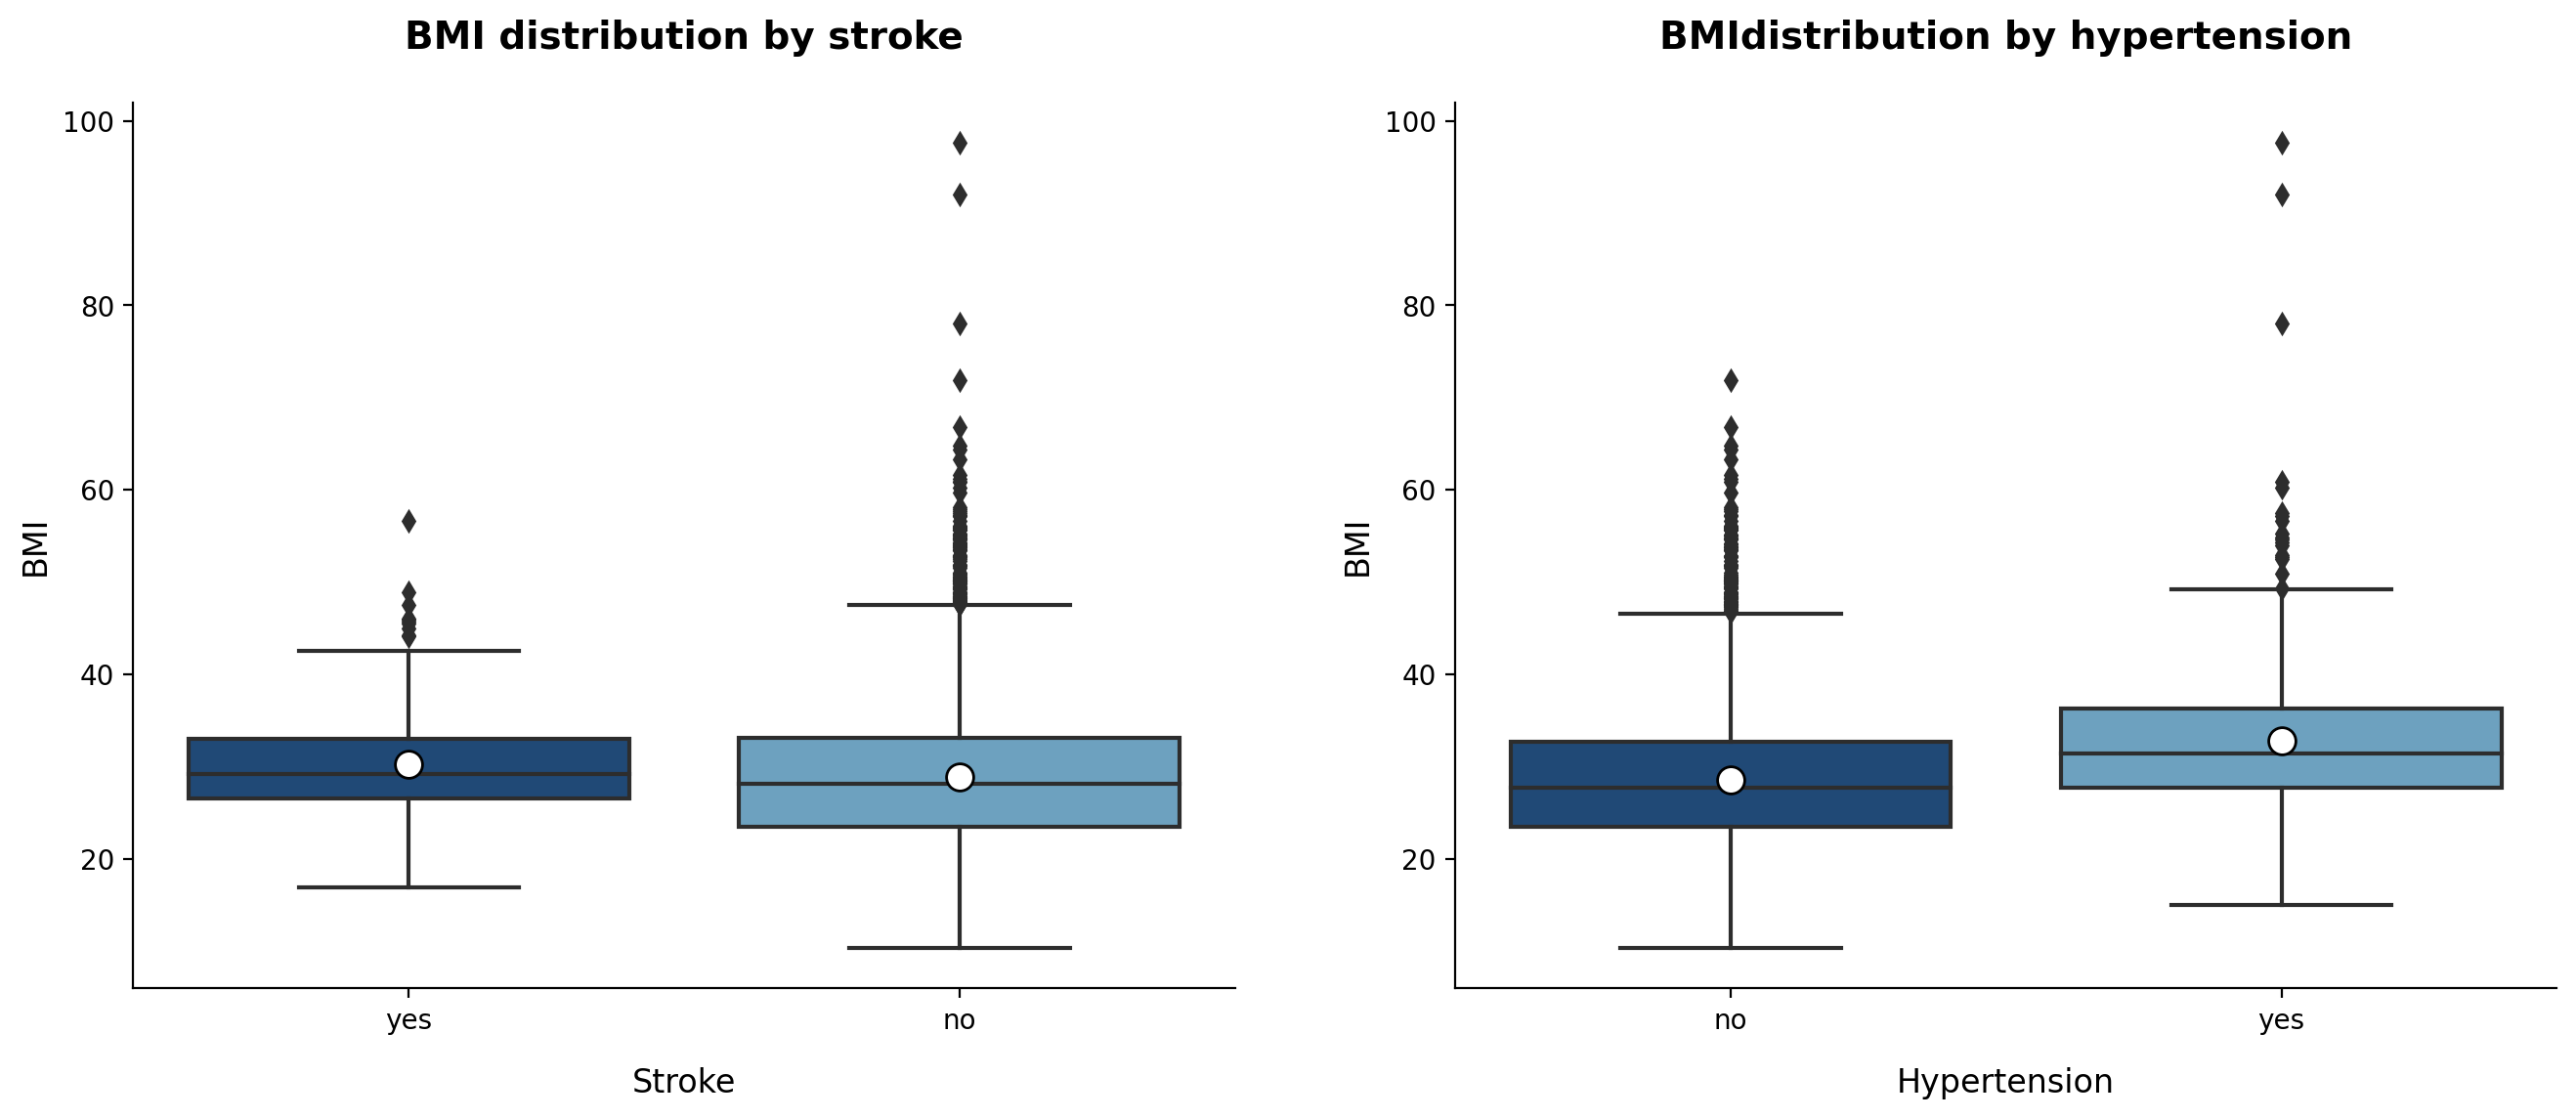

In [70]:
plot_stroke_hyper_mean("bmi", "stroke", "hypertension", patient_info)

#### Hypothesis testing and Confidence intervals

**Research statistic - difference in two population means**


1. Considering patient data, do patients that suffered a stroke have significantly different mean BMI than patients that didn't have a stroke?
2. Considering patient data, do patients that have hypertension have significantly different mean BMI than patients that don't have hypertension?

**Population**: patients who had a stroke/ have hypertension and patients who didn't suffer a stroke/ don't have hypertension   
**Parameter of Interest**: difference in means ($\mu_1 - \mu_2$)   
**Null Hypothesis:** there is no satistically significant difference in mean BMI between patients who suffered a stroke/ have hypertension and stroke-free/ hypertension-free patients ($\mu_1 = \mu_2$)    
**Alternative Hypthosis:** there is a significant difference in BMI between patients who suffered a stroke/ have hypertension and stroke-free/ hypertension-free patients($\mu_1 \neq \mu_2$)

**Significance level (alfa):** 0.05

In [71]:
patient_info.groupby("stroke").agg(avg_bmi=("bmi", "mean"), sample_size=("bmi", "size"))

avg_bmi  sample_size
stroke                      
no        28.88         4860
yes       30.21          249

In [72]:
patient_info.groupby("hypertension").agg(
    avg_bmi=("bmi", "mean"), sample_size=("bmi", "size")
)

avg_bmi  sample_size
hypertension                      
no              28.53         4611
yes             32.77          498

In [73]:
append_diff_in_means("bmi", patient_info)

p-value  z-statistic  CI lower  CI upper  \
stroke           0.00        -3.36     -2.12     -0.55   
hypertension     0.00       -10.80     -5.02     -3.47   

                              significance  
stroke        Stat. significant difference  
hypertension  Stat. significant difference

**Insights**

- Even though it seems that avg BMI for patients who suffered a stroke and patients that didn't have a stroke is very similar, hypothesis testing indicates that there is statistically significant difference in mean BMI for those two groups of patients.
- BMI could be considered as a risk factor for stroke and hypertension.

***

### Smoking status

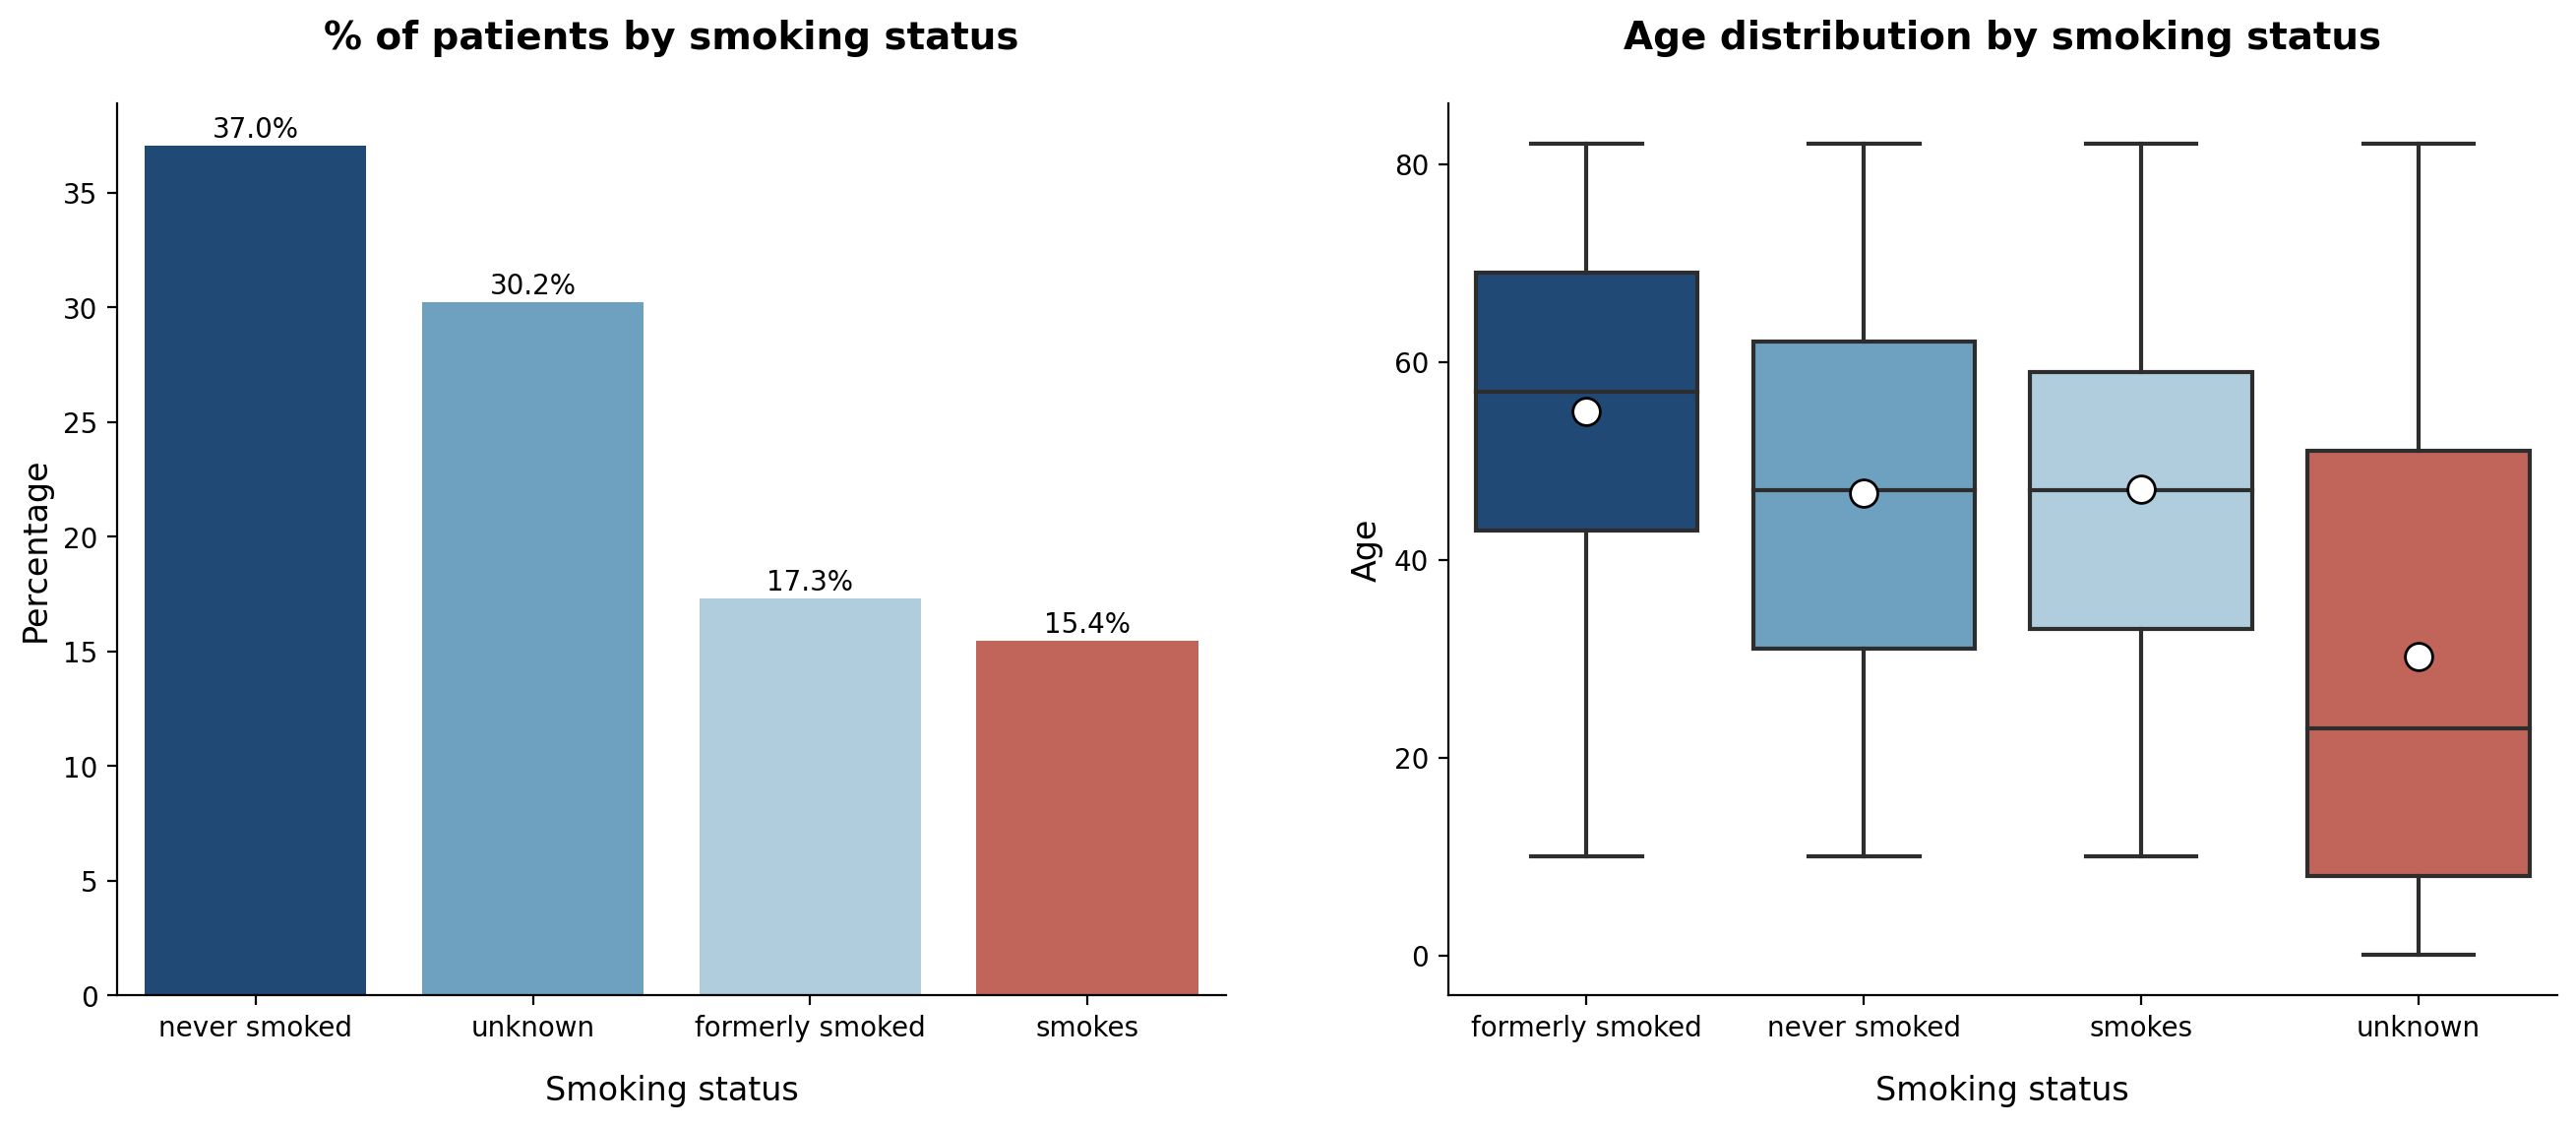

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

plot_norm_value_counts("smoking_status", ax[0], patient_info, y_location=0.1)

plot_boxplot(ax[1], "age", "smoking_status", patient_info, hue=None)

plt.show()

**Insights**

- Around 37% of patients reported never smoking before.
- The proportion of patients that is affected by smoking: former-smokers and current-smokers is more than 32% which is not that far from non-smokers.
- Smoking status distribution by age indicates that:
    - the average age for patients who never smoked and those who smokes is very similar - ~45 y/o. 
    - patients who quited smoking form an older group with the mean age ~55 y/o. 
    - it seems that smoking status was not determined for the younger group: mostly children, adolescents and young adults as median is about 20 y/o. 

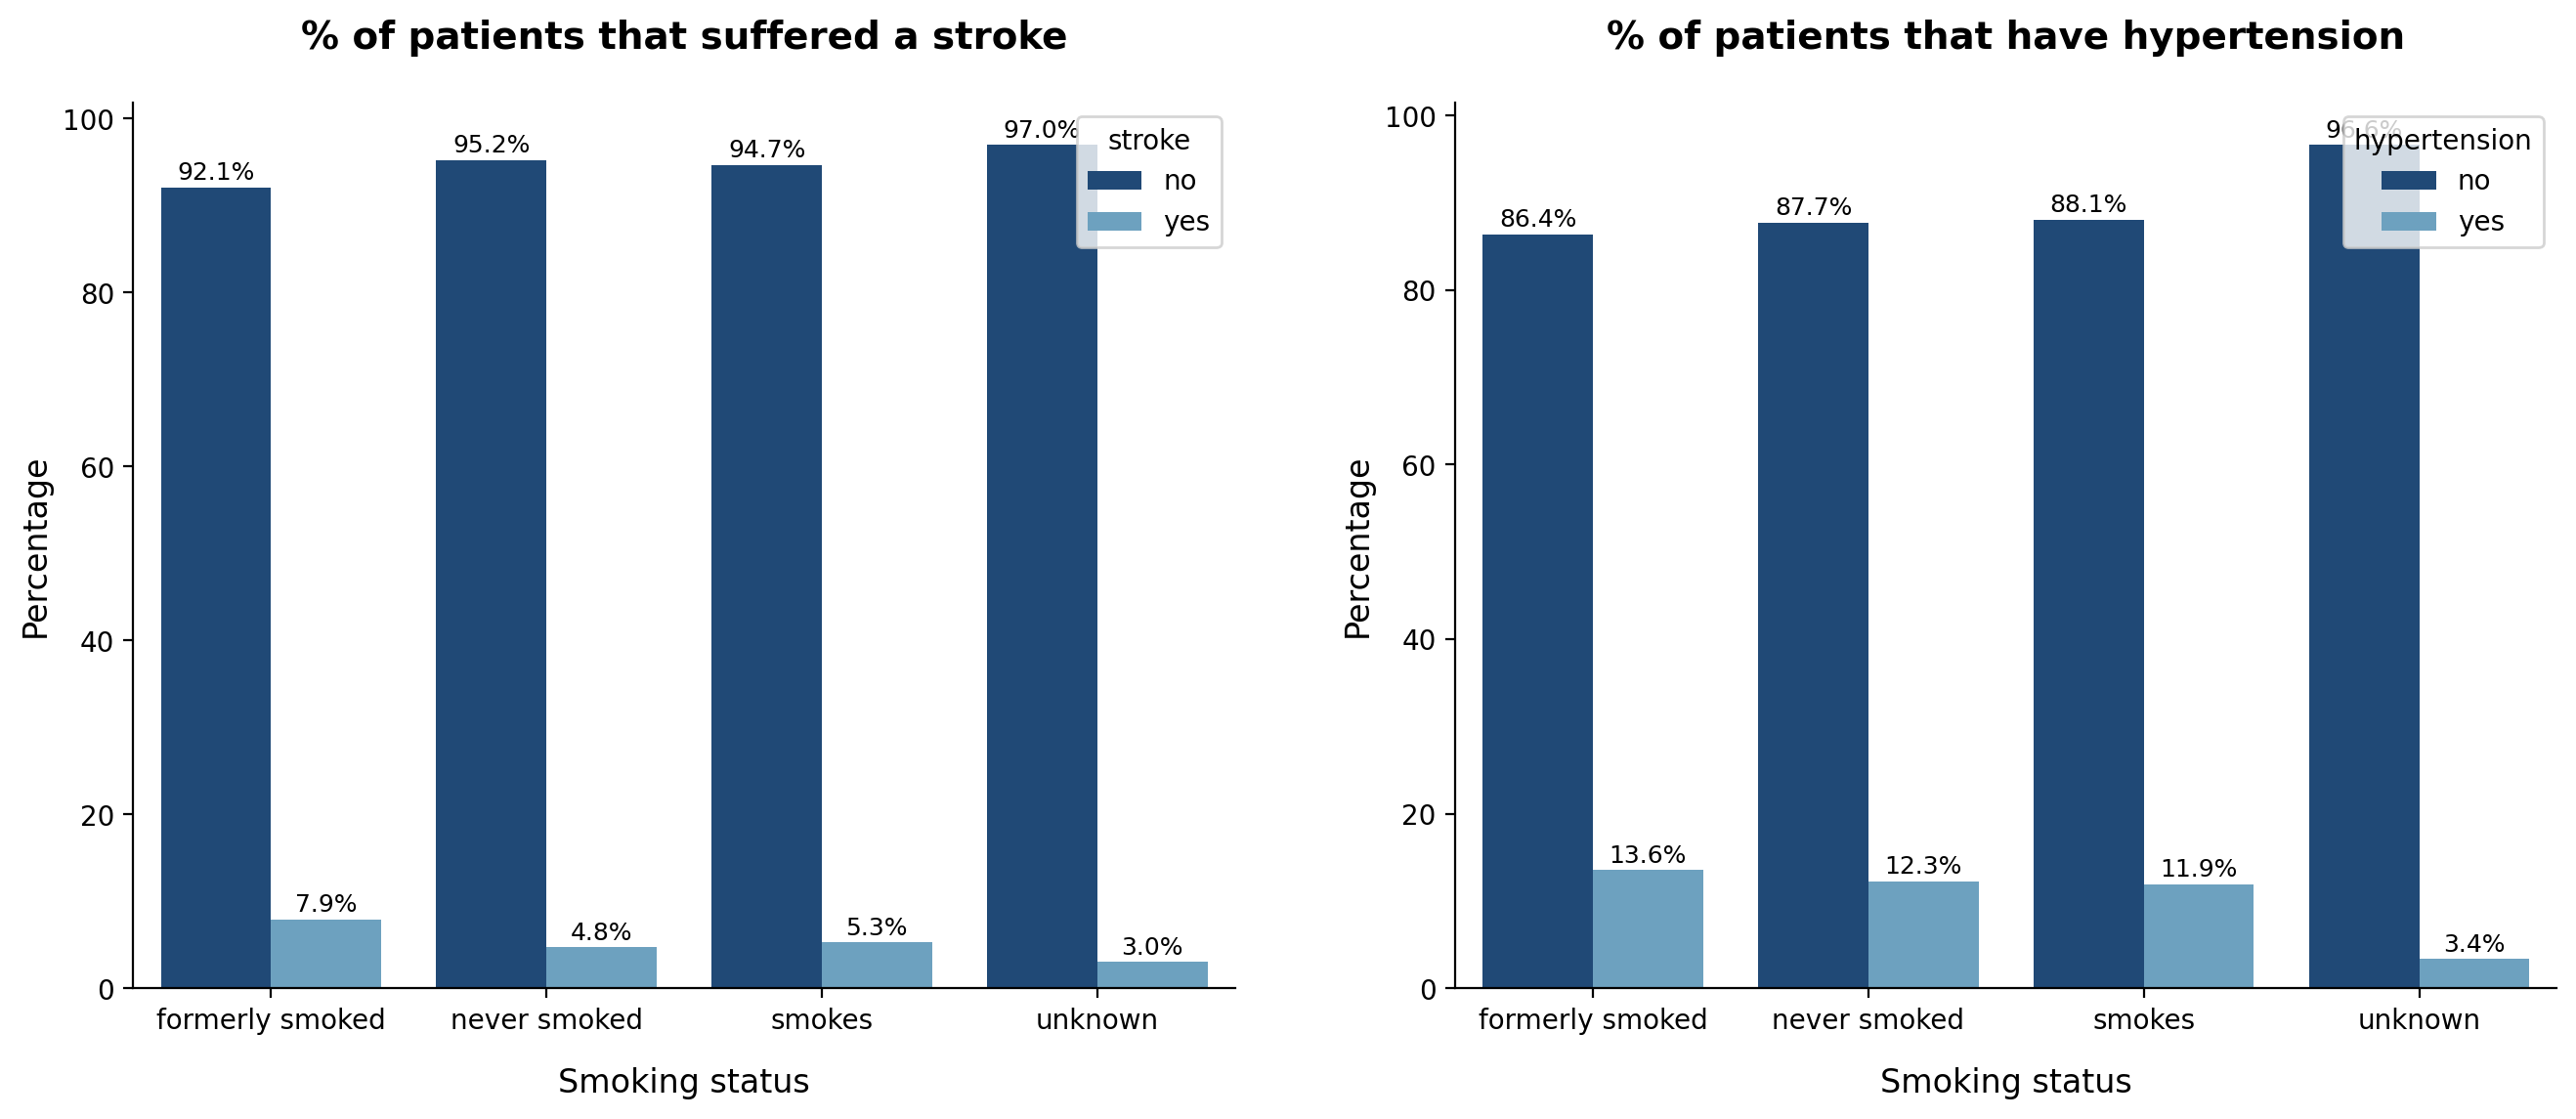

In [75]:
plot_stroke_hyper_percent("smoking_status", "stroke", "hypertension", patient_info)

#### Hypothesis testing and Confidence intervals

**Research statistic - difference in two population proportions**

1. Considering patient data, is there a significant difference between population proportions of patients who formerly smoked and suffered a stroke and those who never smoked and suffered a stroke?
2. Considering patient data, is there a significant difference between population proportions of patients who formerly smoked and have hypertension and those who never smoked and have hypertension?

**Population**: patients who had a stroke/ have hypertension and patients who didn't suffer a stroke/ don't have hypertension   
**Parameter of Interest**: difference in population proportions ($p_1 - p_2$)    
**Null Hypothesis:** there is no difference between population proportions of patients with stroke/ hypertension who formerly smoked and those who never smoked ($p_1 = p_2$)   
**Alternative Hypthosis:** there is a significant difference between population proportions of patients with stroke/ hypertension who formerly smoked and those who never smoked ($p_1 \neq p_2$)


**Significance level (alfa):** 0.05


In [76]:
stroke_by_smoking = create_cont_table("smoking_status", "stroke", patient_info)

stroke_by_smoking.loc[["formerly smoked", "never smoked"]]

stroke           yes  total
smoking_status             
formerly smoked   70    884
never smoked      90   1892

In [77]:
hypertension_by_smoking = create_cont_table(
    "smoking_status", "hypertension", patient_info
)

hypertension_by_smoking.loc[["formerly smoked", "never smoked"]]

hypertension     yes  total
smoking_status             
formerly smoked  120    884
never smoked     232   1892

In [78]:
append_diff_in_props(
    stroke_by_smoking.loc[["formerly smoked", "never smoked"]],
    hypertension_by_smoking.loc[["formerly smoked", "never smoked"]],
)

p-value  z-statistic  CI lower  CI upper  \
stroke           0.00         3.33      0.01      0.05   
hypertension     0.33         0.97     -0.01      0.04   

                              significance  
stroke        Stat. significant difference  
hypertension           Not enough evidence

**Insights**

- Surprisingly enough, hypothesis testing results differs for stroke and hypertension:
    - hypothesis testing proves that there is statistically significant difference between former-smokers and non-smokers who suffered a stroke
    - but there is not enough evidence to reject null hypothesis regarding hypertension meaning that theres is no significant difference between fromer-smokers and non-smokers that have hypertension
- Hypothesis testing was also performed to investigate the difference in stroke/ hypertension proportions between current smokers and non-smokers - not enough evidence to reject null hypothesis for both stroke and hypertension. Hyphothesis testing could be find in Annex.
- Smoking status as a feature seems to have some predictive power for stroke but non for hypertension. It is intersting to investigate how smoking status affects bmi and glucose level.

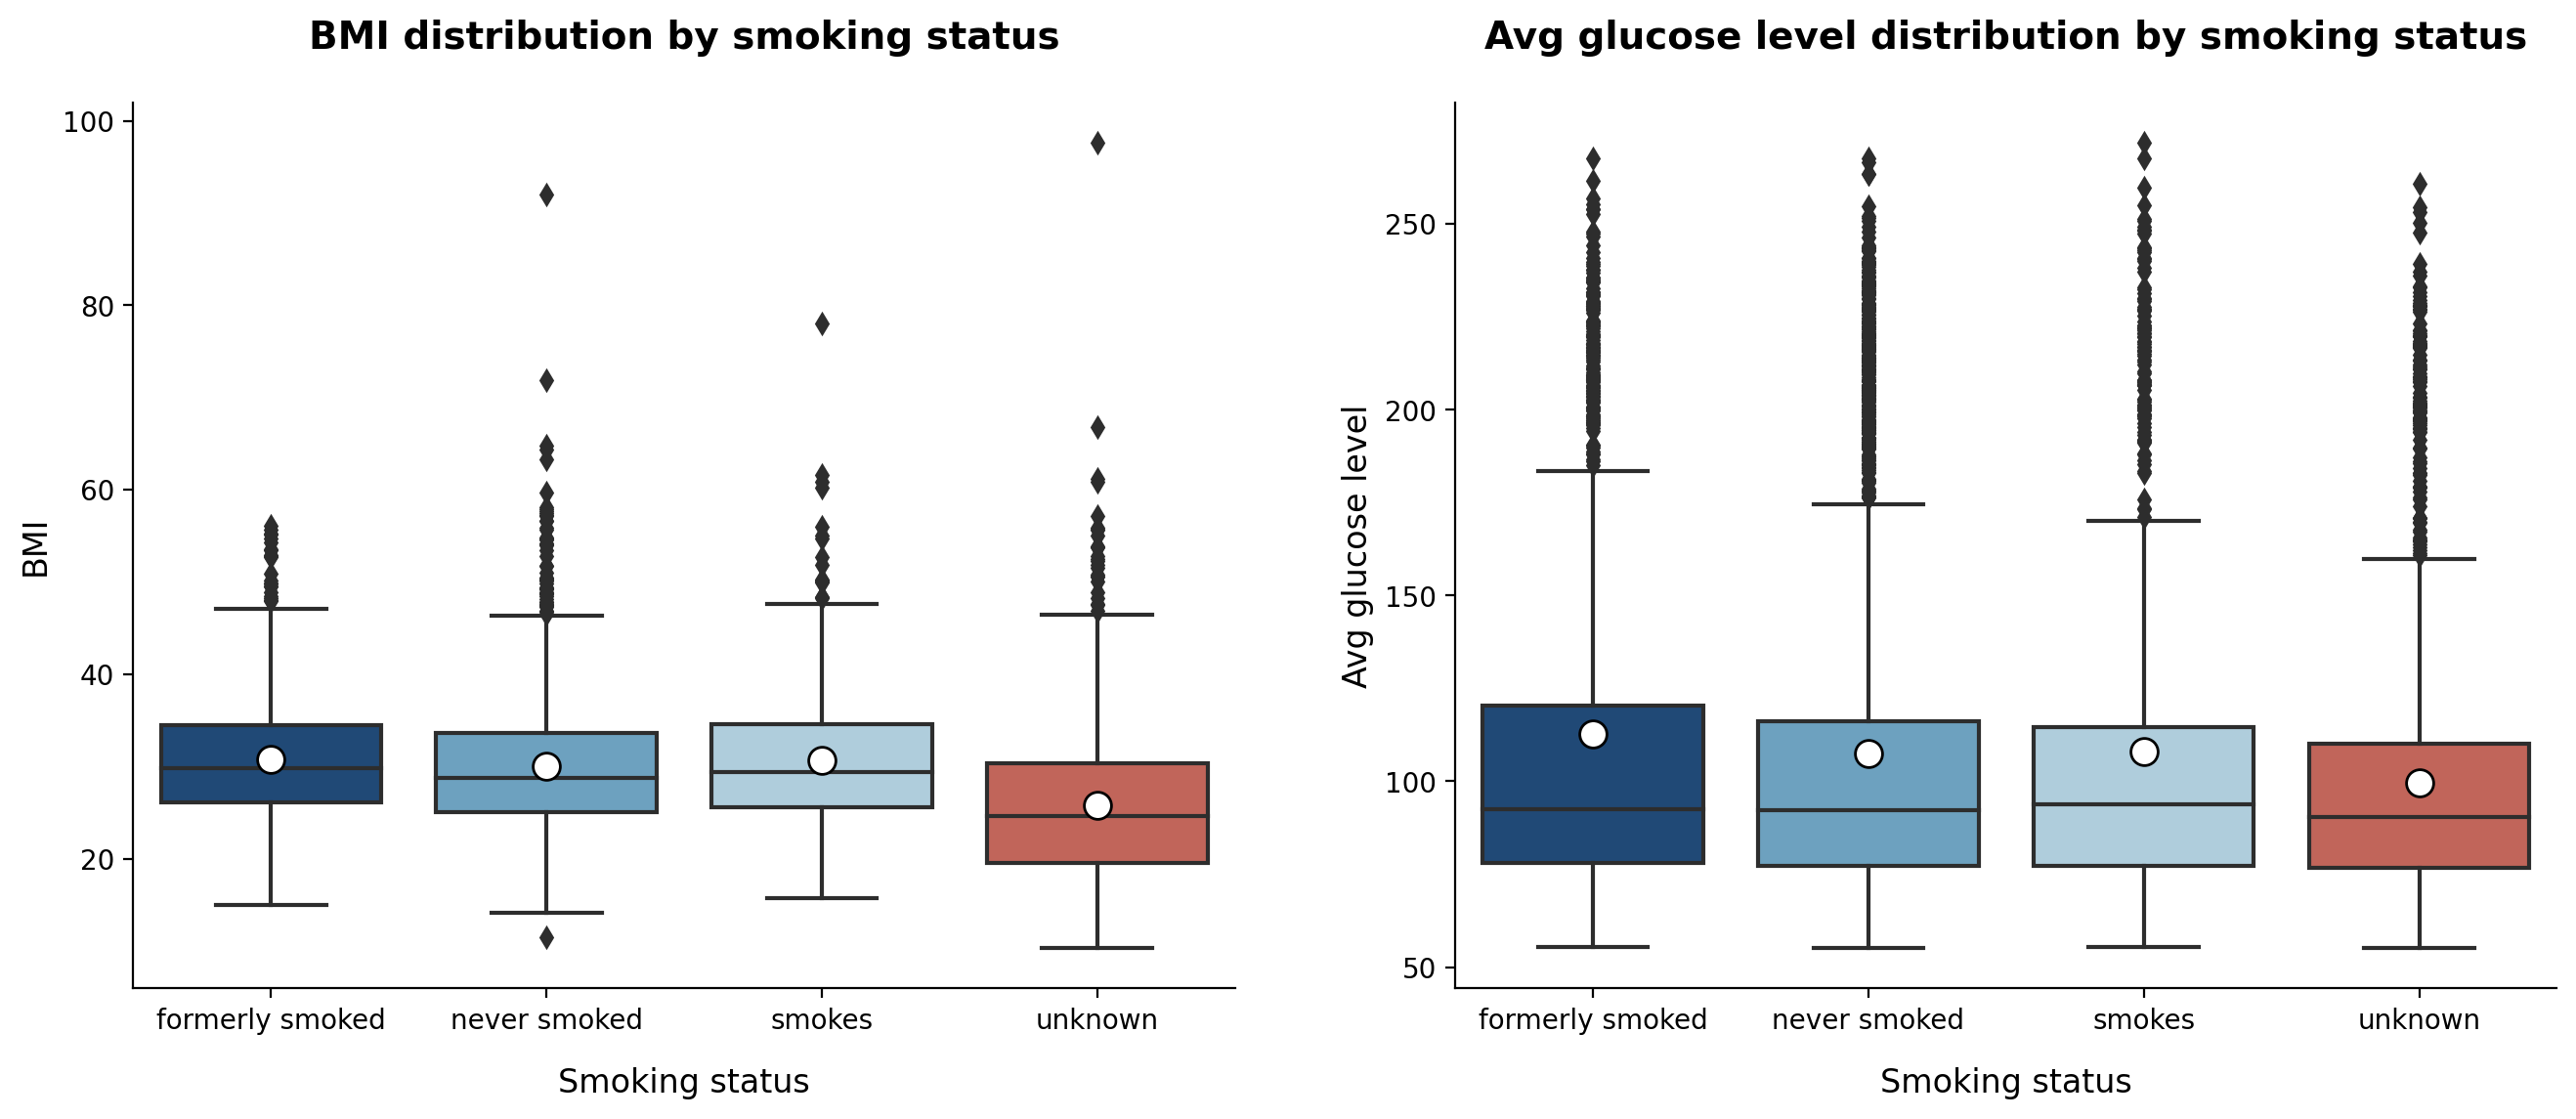

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

plot_boxplot(ax[0], "bmi", "smoking_status", patient_info, hue=None)

plot_boxplot(ax[1], "avg_glucose_level", "smoking_status", patient_info, hue=None)

plt.show()

**Insights**

- BMI distribution by smoking status indicates very similar avg BMI among all groups, except those patients who didn't report the smoking status. Smoking status as a feature might have very low predictive power for BMI.
- Avg glucose level distribution by smoking status shows that: 
    - former-smokers have the highest mean glucose level 
    - non-smokers and current-smokers have very similar mean glucose level
    - patients with 'unknown' smoking status have the lowest mean glucose level which could be explained by relationship with age
- Smoking status as a feature have some predictive power for avg glucose level.

***

### Correlations

In [80]:
import phik
from phik.report import plot_correlation_matrix

Phik (𝜙k) is a new and practical correlation/association coefficient that works consistently between categorical, ordinal and interval variables, captures non-linear dependency and reverts to the Pearson correlation coefficient in case of a bivariate normal input distribution (Released: Jul 2021).

In [81]:
interval_cols = patient_info[["age", "avg_glucose_level", "bmi"]]

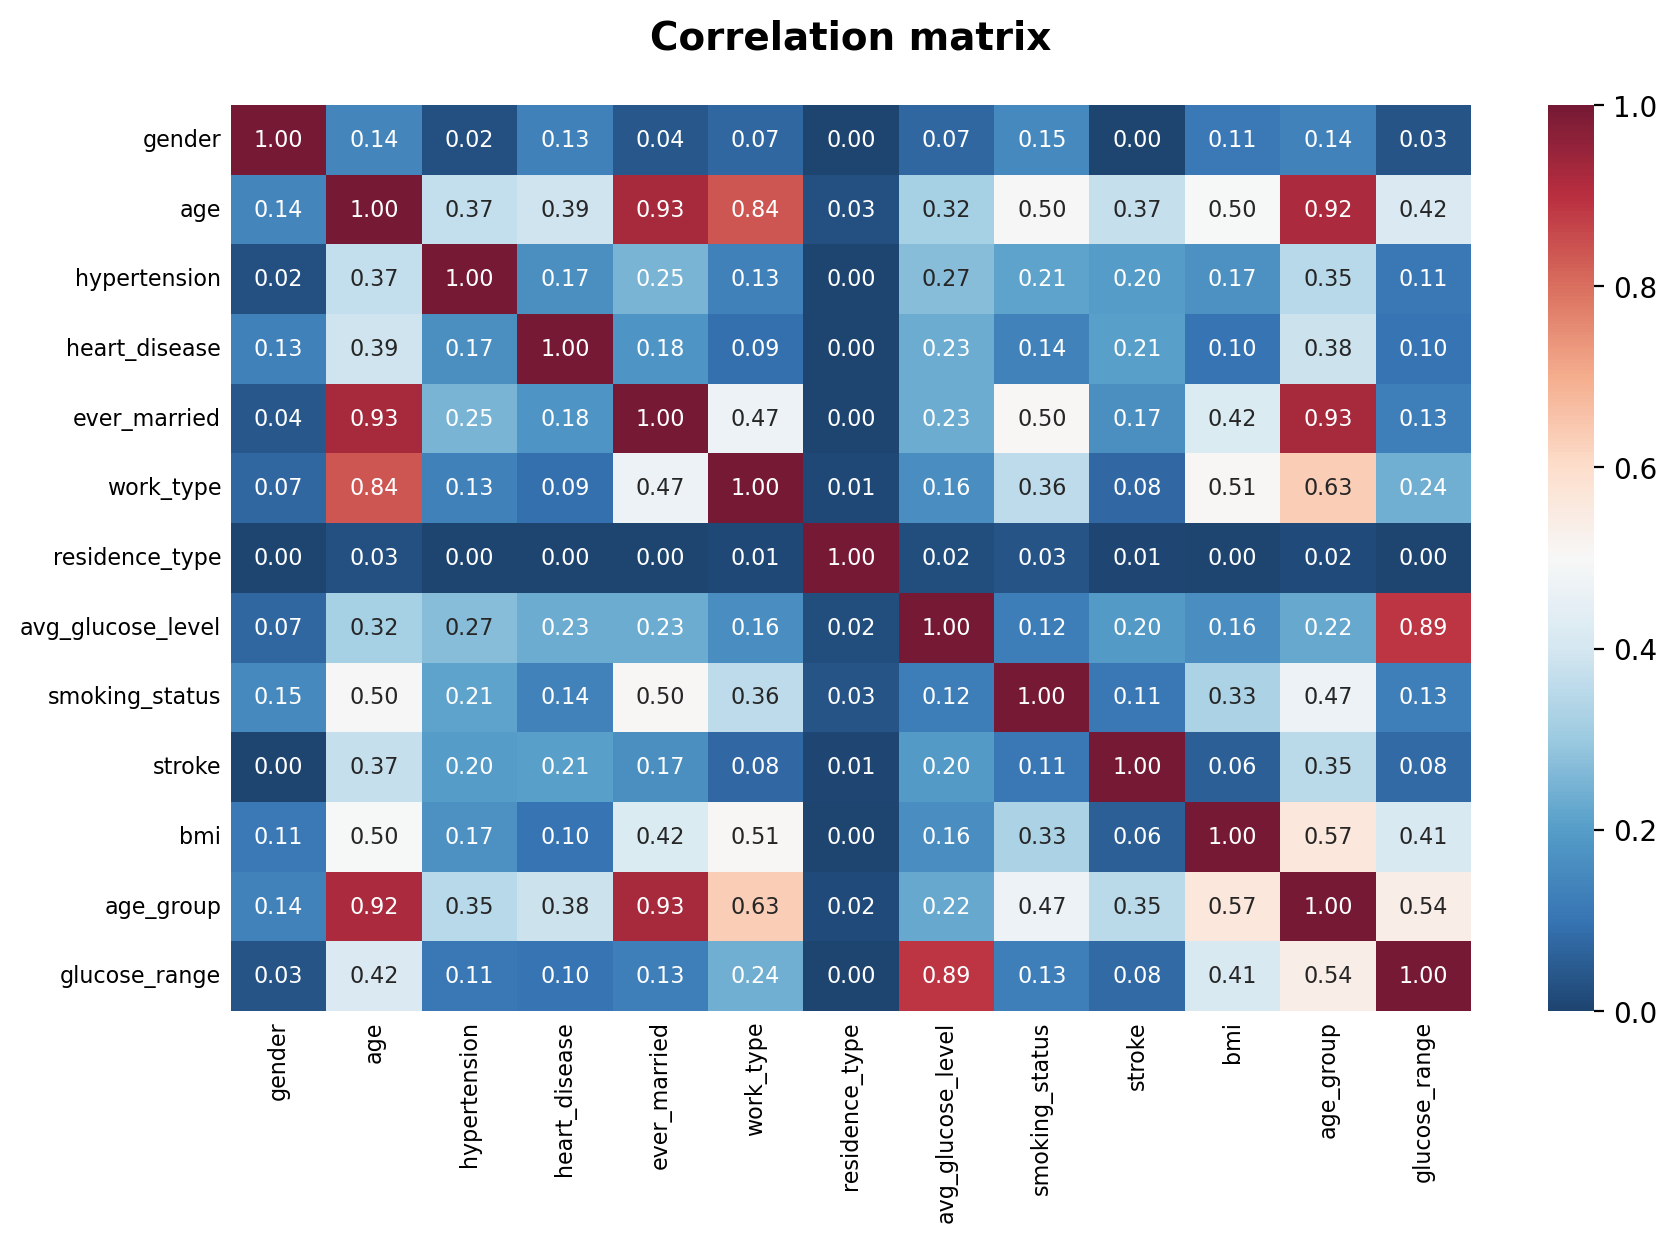

In [82]:
plt.figure(figsize=(10, 6))
corr_matrix = patient_info.phik_matrix(interval_cols=interval_cols)

ax = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    annot_kws={"fontsize": 8},
    alpha=0.9,
)
set_labels(ax, "Correlation matrix", "", "")

ax.tick_params(axis="both", which="both", length=0)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

**Observations**

- "Age" have a very strong positive correlation with 'ever_married' and 'work_type'

#### Correlating features with stroke

In [83]:
corr_matrix[corr_matrix["stroke"] != 1]["stroke"].nlargest(5)

age                 0.37
age_group           0.35
heart_disease       0.21
hypertension        0.20
avg_glucose_level   0.20
Name: stroke, dtype: float64

**Insights**

- As expected, "age" and "age_group" are the most correlated features with the stroke target.
- Stroke target also has a slight positive correlation with the following features:
    - "heart_disease"
    - "hypertension"
    - "avg_glucose_level"

#### Correlating features with hypertension

In [84]:
corr_matrix[corr_matrix["hypertension"] != 1]["hypertension"].nlargest(5)

age                 0.37
age_group           0.35
avg_glucose_level   0.27
ever_married        0.25
smoking_status      0.21
Name: hypertension, dtype: float64

**Insights**

- As expected, "age" and "age_group" are the most correlated features with the hypertension target 
- Hypertension also has a slight positive correlation with the following features:
    - "avg_glucose_level"
    - "ever_married"
    - "smoking_status"

#### Correlating features with average glucose level

In [85]:
corr_matrix[corr_matrix["avg_glucose_level"] != 1]["avg_glucose_level"].nlargest(6)[1:]

age             0.32
hypertension    0.27
ever_married    0.23
heart_disease   0.23
age_group       0.22
Name: avg_glucose_level, dtype: float64

**Insights**

- As expected, "age" is the most correlated feature with the average glucose level.
- Average glucose level also has a slight positive correlation with the following features:
    - "hypertension"
    - "ever_married"
    - "heart_disease"

#### Correlating features with BMI

In [86]:
corr_matrix[corr_matrix["bmi"] != 1]["bmi"].nlargest(5)

age_group       0.57
work_type       0.51
age             0.50
ever_married    0.42
glucose_range   0.41
Name: bmi, dtype: float64

**Insights**

- Surprisingly, "age_group" is the most correlated feature with the BMI target.
- BMI also has a moderate positive correlation with:
    - "work_type"
    - "age"
- BMI also has a slight positive correlation with the following features:
    - "ever_married"
    - "glucose_range" but not "avg_glucose_level"

### EDA findings

- EDA and statistical inference allows to form a clear image what are significant risk factors for stroke:
    - Patient age - arteries naturally become narrower as patient ages and blood clots typically form in areas where the arteries have been narrowed blocking the flow of blood and oxygen to the brain.
    - As stroke has a high dependency on age, it is also associated with other conditions or diseases that develops aging: hypertension and heart diseases
    - Average glucose level
    - BMI (even though it didn't appear as a highly correlating feature based on correlation matrix, hypothesis testing proved the stat. significant difference in mean BMI between patients with and without stroke)
    - Based on analysis, marital status and work type seem to be risk factors for stroke as well. However these features are highly correlated with age and it is difficult to decide the real importance for stroke prediction.
    - Smoking status has a very slight affect on having a stroke.
    - Gender and residence type don't have statistically significant difference between patients who suffered a stroke and those who didn't.

- During initial resource analysis it was discovered that hypertension has some overlapping risk factors with stroke and this was proved by EDA - based on this dataset factors that may cause high blood pressure are very similar to stroke with minor exceptions:
    - Patient age
    - Average glucose level
    - BMI and heart diseases (even though these factors don't appear as a highly correlating features based on correlation matrix, hypothesis testing proved otherwise)
    - Marital status and work type seem to impact hypertension but these features are highly correlated with age and it is difficult to decide the real importance for hypertention prediction
    - Smoking status has a slight positive correlation with hypertension but hypothesis testing indicates no stat. significant difference between different kind of smokers and non-smokers that have hypertension

- Regarding average glucose level and BMI as target variables, exploratory analysis and statistical inference helps to indentify data relationships and correlations in this particular dataset but based on additional resources usually there are many other more important risk factors that affect average glucose level and BMI than those mentioned in this dataset. 

- Features (excluding stroke) that have the strongest association with average glucose level based on this dataset:
    - Patient age
    - Hypertension
    - BMI

- Factors (excluding stroke) that have the highest impact on BMI based on this dataset:
    - Age
    - Glucose range 
    - Hypertension

***

## Annex

### Work type: government sector vs self-employed

#### Hypothesis testing and Confidence intervals

**Research statistic - difference in two population proportions**

1. Considering patient data, is there a significant difference between population proportions of patients who suffered a stroke and are working in government sector and those who suffered a stroke and are self-employed?
2. Considering patient data, is there a significant difference between population proportions of patients who have a hypertension and are working in government sector and those who suffered a stroke and are self-employed?

**Population**: patients who had a stroke/ have hypertension and patients who didn't suffer a stroke/ don't have hypertension   
**Parameter of Interest**: difference in population proportions ($p_1 - p_2$)    
**Null Hypothesis:** there is no difference between population proportions of patients with stroke/ hypertension who are working in goverment sector and those who are self-employed ($p_1 = p_2$)   
**Alternative Hypthosis:** there is a significant difference between population proportions of patients with stroke/ hypertension who are working in goverment sector and those who are self-employed ($p_1 \neq p_2$)


**Significance level (alfa):** 0.05


In [87]:
stroke_by_work_type = create_cont_table("work_type", "stroke", patient_info)

stroke_by_work_type.loc[
    [
        "govt_job",
        "self-employed",
    ]
]

stroke         yes  total
work_type                
govt_job        33    657
self-employed   65    819

In [88]:
hypertension_by_work_type = create_cont_table("work_type", "hypertension", patient_info)

hypertension_by_work_type.loc[["govt_job", "self-employed"]]

hypertension   yes  total
work_type                
govt_job        73    657
self-employed  144    819

In [89]:
append_diff_in_props(
    stroke_by_work_type.loc[["govt_job", "self-employed"]],
    hypertension_by_work_type.loc[["govt_job", "self-employed"]],
)

p-value  z-statistic  CI lower  CI upper  \
stroke           0.03        -2.23     -0.05     -0.00   
hypertension     0.00        -3.49     -0.10     -0.03   

                              significance  
stroke        Stat. significant difference  
hypertension  Stat. significant difference

**Insights**



### Smoking status: current smokers vs non-smokers

#### Hypothesis testing and Confidence intervals

**Research statistic - difference in two population proportions**

1. Considering patient data, is there a significant difference between population proportions of patients who smokes and suffered a stroke and those who never smoked and suffered a stroke?
2. Considering patient data, is there a significant difference between population proportions of patients who smokes and have hypertension and those who never smoked and have hypertension?

**Population**: patients who had a stroke/ have hypertension and patients who didn't suffer a stroke/ don't have hypertension   
**Parameter of Interest**: difference in population proportions ($p_1 - p_2$)    
**Null Hypothesis:** there is no difference between population proportions of patients with stroke/ hypertension who smokes and those who never smoked ($p_1 = p_2$)   
**Alternative Hypthosis:** there is a significant difference between population proportions of patients with stroke/ hypertension who smokes and those who never smoked ($p_1 \neq p_2$)


**Significance level (alfa):** 0.05


In [90]:
stroke_by_smoking = create_cont_table("smoking_status", "stroke", patient_info)

stroke_by_smoking.loc[["smokes", "never smoked"]]

stroke          yes  total
smoking_status            
smokes           42    789
never smoked     90   1892

In [91]:
hypertension_by_smoking = create_cont_table(
    "smoking_status", "hypertension", patient_info
)

hypertension_by_smoking.loc[["smokes", "never smoked"]]

hypertension    yes  total
smoking_status            
smokes           94    789
never smoked    232   1892

In [92]:
append_diff_in_props(
    stroke_by_smoking.loc[["smokes", "never smoked"]],
    hypertension_by_smoking.loc[["smokes", "never smoked"]],
)

p-value  z-statistic  CI lower  CI upper         significance
stroke           0.54         0.62     -0.01      0.03  Not enough evidence
hypertension     0.80        -0.25     -0.03      0.02  Not enough evidence

**Insights**

- Hypothesis testing proves that there is not enough evidence to reject null hypothesis leading to the conclusion that there is no statistically significant difference between the population proportions of patients who smokes and suffered a stroke and those who have never smoked and suffered a stroke. Same outcome is found for hypertension.